# Data Preparation
Independant Variables: 

Target Variables: Attack_cat, label

In [1]:
# !pip install arff
# !pip install -U pandas
# !pip install seaborn
# !pip install imbalanced-learn
# !pip install openpyxl
# !pip install shap
# !pip install ipywidgets
# !pip install python-Levenshtein



In [2]:
# imports show to us during workshops (hashtagged until used)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.preprocessing import LabelEncoder #to convert categories into numerical
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import arff
import openpyxl

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score

import shap
import Levenshtein as lev

#from sklearn import datasets
#from scipy.io import arff

## Import Excel
- Load Data into Dataframe
- Explore Data
   
    

Notes:
Data is an excel format, 145854 x 44 shape, dtypes: float64(11), int64(29), object(4), all non-null


In [3]:
#Load data into Dataframe
df = pd.read_excel('Assignment-2024-training-data-set.xlsx')
dfd = df #This is for a clean copy 

In [4]:
df.head(5)
df.tail(5)

dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
145849  1.518915   tcp    http   FIN     10      8    1296     354  11.192199   
145850  0.694885   tcp    http   FIN     10      6    1294     268  21.586305   
145851  8.734500   tcp    http   FIN    114    686    5154  914758  91.476330   
145852  0.605943   tcp    http   FIN     10      6    1302     268  24.754803   
145853  0.258671   tcp    http   FIN     10      6    1022     268  57.988722   

        sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
145849   254  ...                 1               1             0           0   
145850   254  ...                 1               1             0           0   
145851   254  ...                 1               1             0           0   
145852   254  ...                 1               8             0           0   
145853   254  ...                 1               1             0           0   

        ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
145849                 1           1           1                0       Worms   
145850                 1           1           1                0       Worms   
145851                 1           2           1                0       Worms   
145852                 1           4           1                0       Worms   
145853                 1           1           1                0       Worms   

        label  
145849      1  
145850      1  
145851      1  
145852      1  
145853      1  

[5 rows x 44 columns]

## Explore dataframe

In [5]:
#Explore Data
df.keys()

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145854 entries, 0 to 145853
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                145854 non-null  float64
 1   proto              145854 non-null  object 
 2   service            145854 non-null  object 
 3   state              145854 non-null  object 
 4   spkts              145854 non-null  int64  
 5   dpkts              145854 non-null  int64  
 6   sbytes             145854 non-null  int64  
 7   dbytes             145854 non-null  int64  
 8   rate               145854 non-null  float64
 9   sttl               145854 non-null  int64  
 10  dttl               145854 non-null  int64  
 11  sload              145854 non-null  float64
 12  dload              145854 non-null  float64
 13  sloss              145854 non-null  int64  
 14  dloss              145854 non-null  int64  
 15  sinpkt             145854 non-null  float64
 16  di

In [7]:
df.shape


(145854, 44)

In [8]:
df.describe(include = "all") #numerical and categorical

dur   proto service   state          spkts          dpkts  \
count   145854.000000  145854  145854  145854  145854.000000  145854.000000   
unique            NaN     133      13       9            NaN            NaN   
top               NaN     tcp       -     INT            NaN            NaN   
freq              NaN   65342   69774   68921            NaN            NaN   
mean         1.255719     NaN     NaN     NaN      20.583748      19.394532   
std          6.105215     NaN     NaN     NaN     133.749501      87.641524   
min          0.000000     NaN     NaN     NaN       1.000000       0.000000   
25%          0.000008     NaN     NaN     NaN       2.000000       0.000000   
50%          0.001106     NaN     NaN     NaN       2.000000       2.000000   
75%          0.632173     NaN     NaN     NaN      14.000000      12.000000   
max         59.999046     NaN     NaN     NaN    9616.000000    6494.000000   

              sbytes        dbytes          rate           sttl  ...  \
count   1.458540e+05  1.458540e+05  1.458540e+05  145854.000000  ...   
unique           NaN           NaN           NaN            NaN  ...   
top              NaN           NaN           NaN            NaN  ...   
freq             NaN           NaN           NaN            NaN  ...   
mean    8.693283e+03  1.511218e+04  9.763206e+04     176.800170  ...   
std     1.711424e+05  1.123437e+05  1.663467e+05     103.732058  ...   
min     2.800000e+01  0.000000e+00  0.000000e+00       0.000000  ...   
25%     1.140000e+02  0.000000e+00  3.960448e+01      31.000000  ...   
50%     3.640000e+02  1.780000e+02  4.122180e+03     254.000000  ...   
75%     1.514000e+03  1.634000e+03  1.250000e+05     254.000000  ...   
max     1.296523e+07  8.645430e+06  1.000000e+06     255.000000  ...   

        ct_dst_sport_ltm  ct_dst_src_ltm   is_ftp_login     ct_ftp_cmd  \
count      145854.000000   145854.000000  145854.000000  145854.000000   
unique               NaN             NaN            NaN            NaN   
top                  NaN             NaN            NaN            NaN   
freq                 NaN             NaN            NaN            NaN   
mean            4.734467        9.438294       0.016592       0.016592   
std             6.153501       11.578268       0.133099       0.133099   
min             1.000000        1.000000       0.000000       0.000000   
25%             1.000000        1.000000       0.000000       0.000000   
50%             1.000000        3.000000       0.000000       0.000000   
75%             7.000000       16.000000       0.000000       0.000000   
max            46.000000       65.000000       4.000000       4.000000   

        ct_flw_http_mthd    ct_src_ltm     ct_srv_dst  is_sm_ips_ports  \
count      145854.000000  145854.00000  145854.000000    145854.000000   
unique               NaN           NaN            NaN              NaN   
top                  NaN           NaN            NaN              NaN   
freq                 NaN           NaN            NaN              NaN   
mean            0.134059       7.60346       9.874642         0.009434   
std             0.721159       8.72623      11.349124         0.096670   
min             0.000000       1.00000       1.000000         0.000000   
25%             0.000000       2.00000       1.000000         0.000000   
50%             0.000000       3.00000       4.000000         0.000000   
75%             0.000000      12.00000      16.000000         0.000000   
max            30.000000      60.00000      62.000000         1.000000   

        attack_cat          label  
count       145854  145854.000000  
unique           9            NaN  
top        Generic            NaN  
freq         40000            NaN  
mean           NaN       0.734138  
std            NaN       0.441793  
min            NaN       0.000000  
25%            NaN       0.000000  
50%            NaN       1.000000  
75%            NaN       1.000000  
max            NaN       1.000

In [9]:
df.describe(include=[object]) #just categorical

proto service   state attack_cat
count   145854  145854  145854     145854
unique     133      13       9          9
top        tcp       -     INT    Generic
freq     65342   69774   68921      40000

## Plots to explore data
All groups by "attack_cat"


STTL, DTTL, ct_state_ttl - big variability between normal and malicious


### Histograms

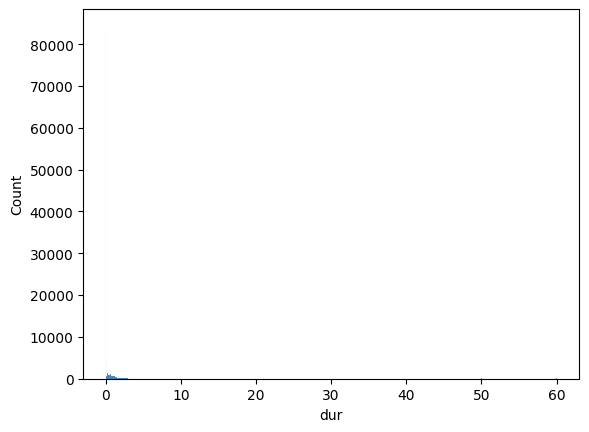

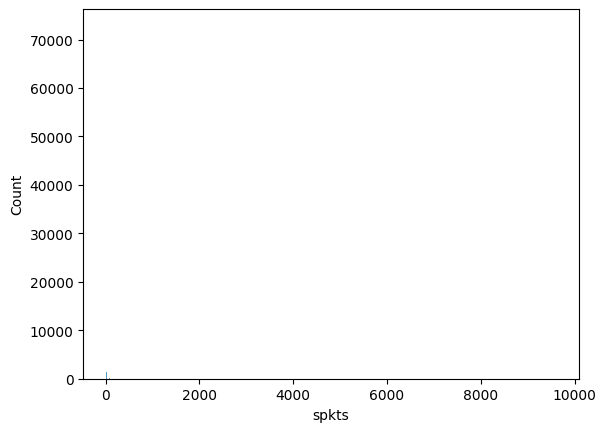

KeyboardInterrupt: 

In [10]:
# #histogram to understand distribution - too much data to load
# for i in df.select_dtypes(include="number").columns:
#     sns.histplot(data=df, x=i)
#     plt.show()

In [ ]:
# #histogram to understand distribution - too much data to load
# for i in df.select_dtypes(include="number").columns:
#     sns.histplot(data=df, x=i)
#     plt.show()

### Boxplots

In [442]:
# for i in df.select_dtypes(include="number").columns:
#     sns.boxplot(data=df,x=i)
#     plt.show()

### Correlation Heatmap
see Irrelavent attributes for results found in this

In [443]:
df.select_dtypes(include="number").columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [444]:
s=df.select_dtypes(include="number").corr()

<Axes: >

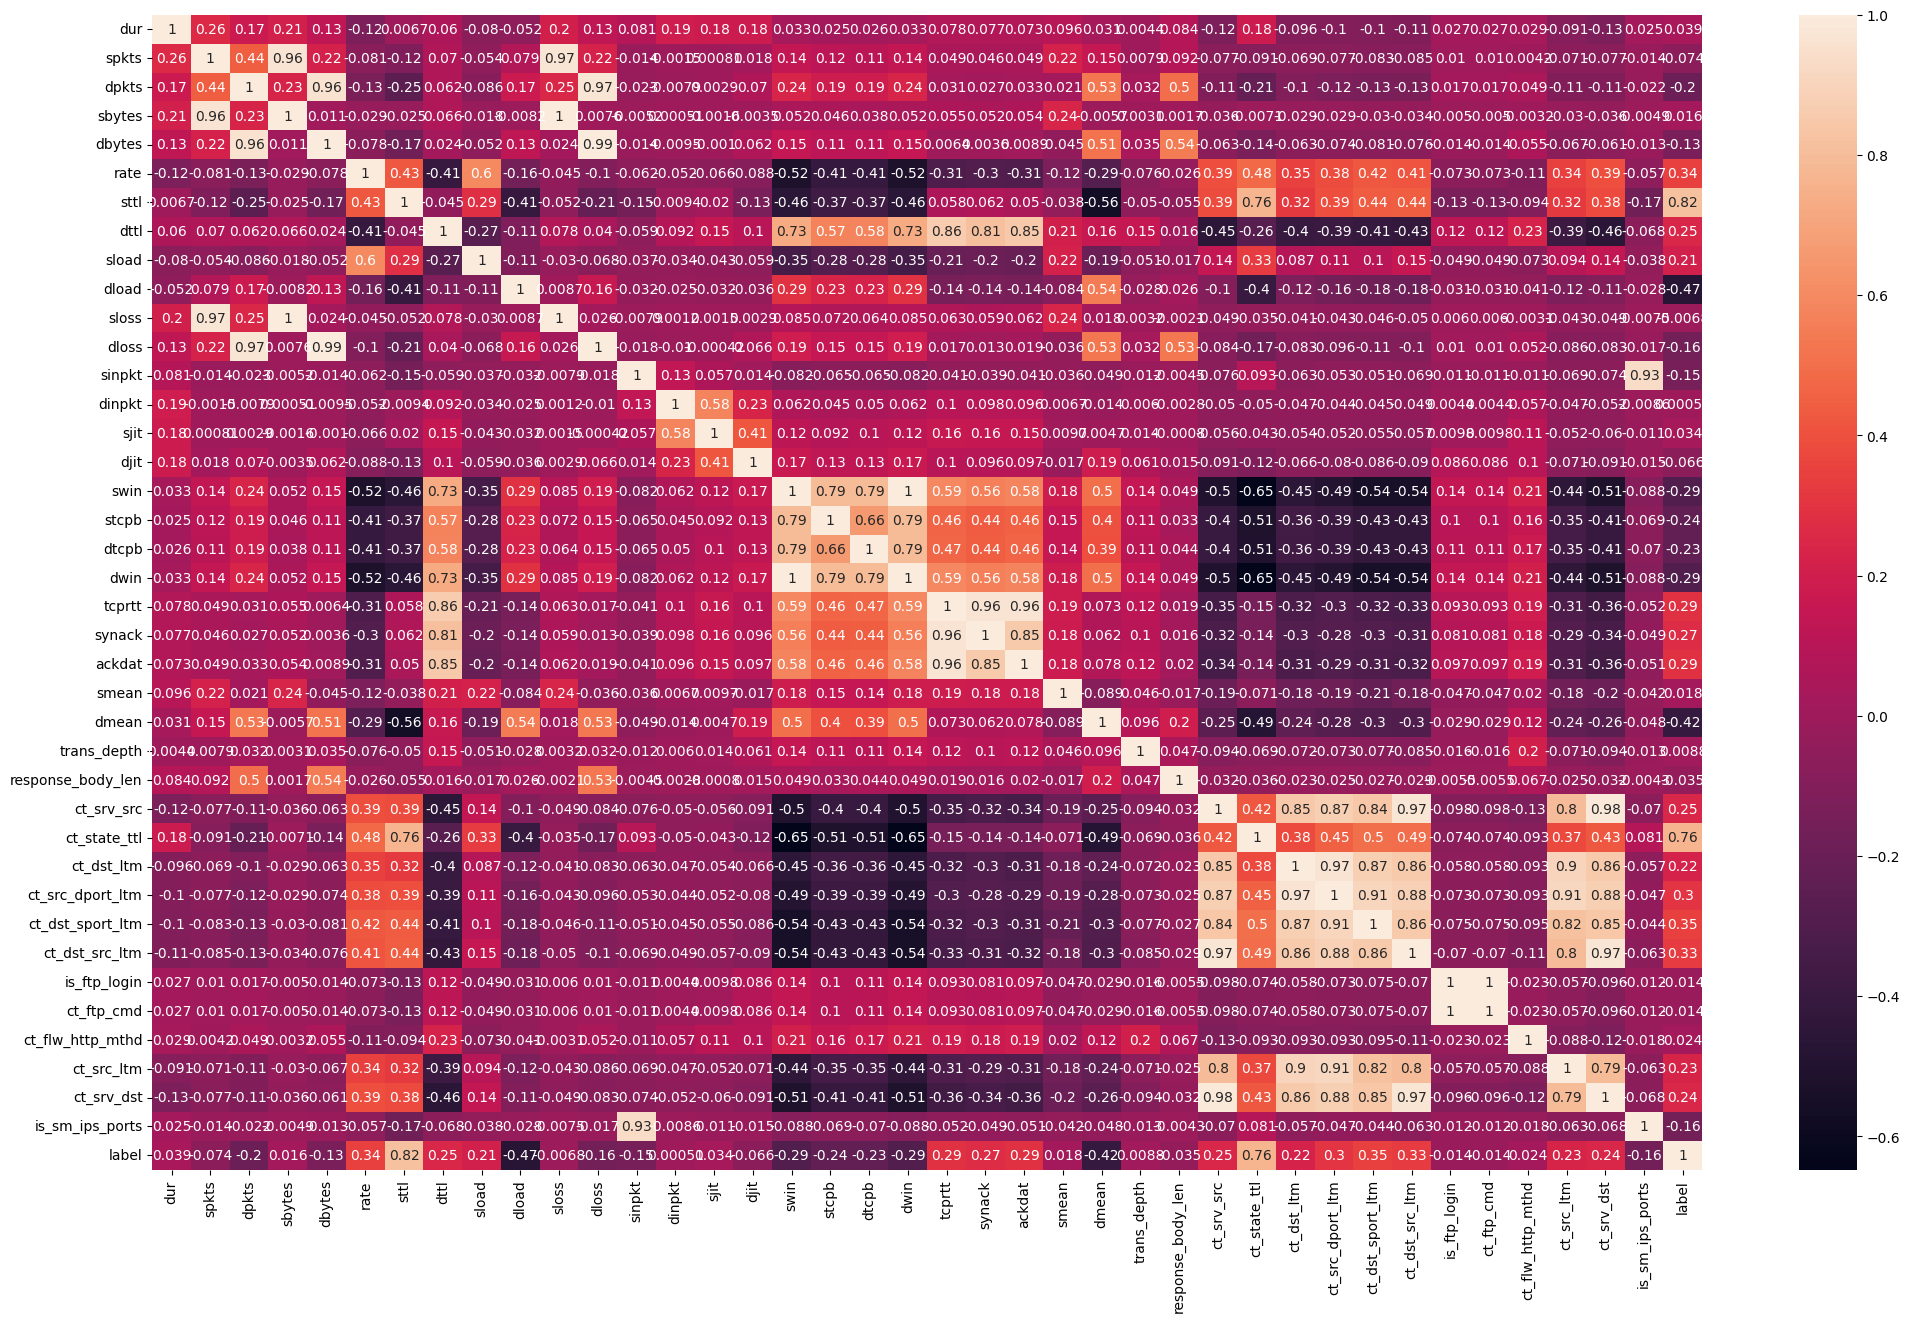

In [445]:
plt.figure(figsize=(25,15))
sns.heatmap(s,annot=True)

## Plots to explore relationship with attack_cat

### Bar Chart 

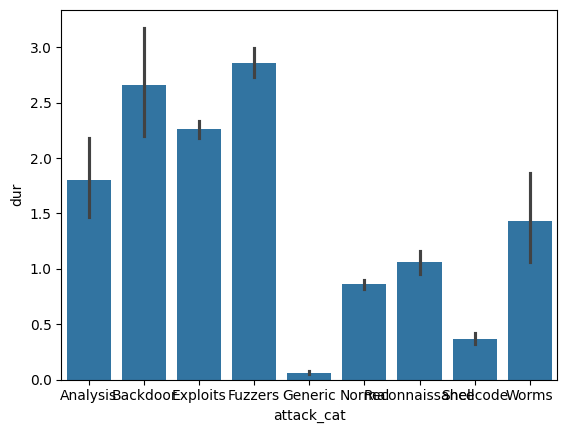

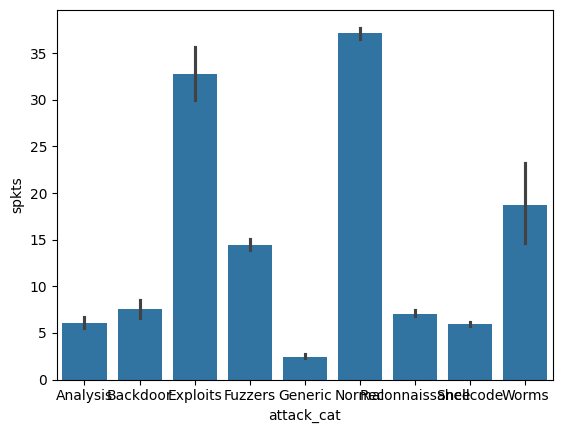

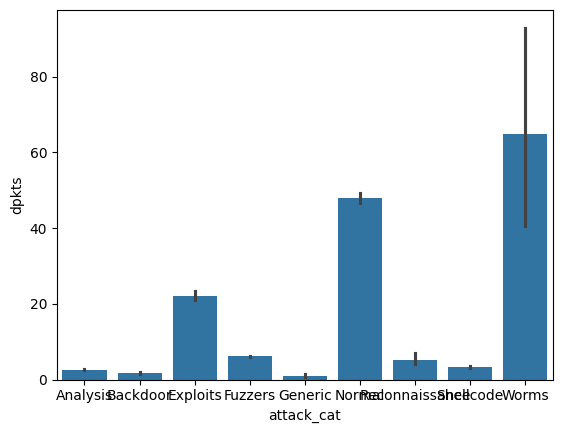

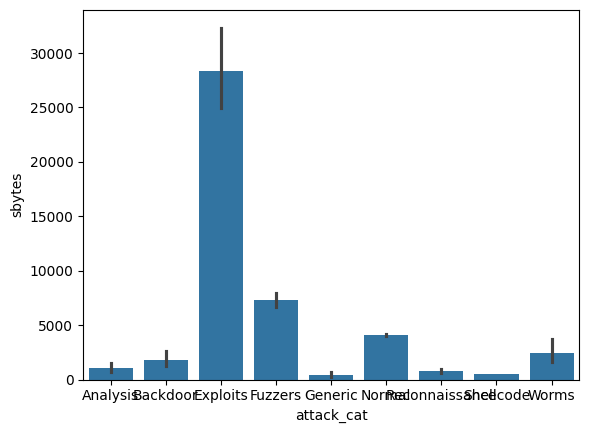

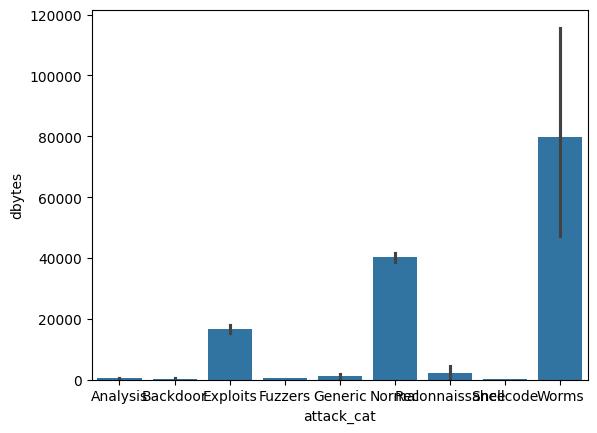

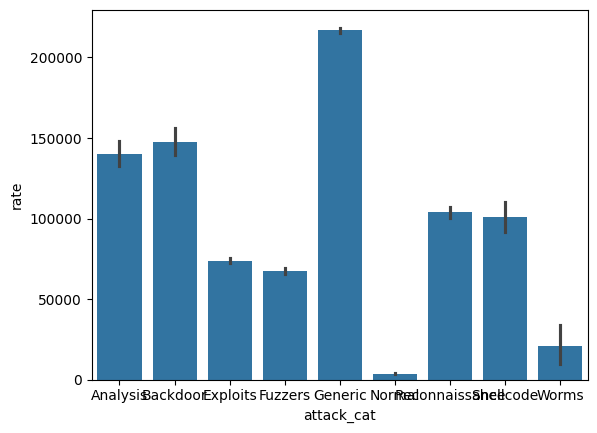

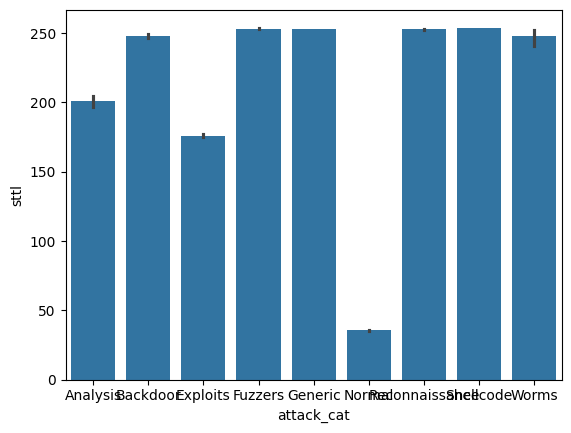

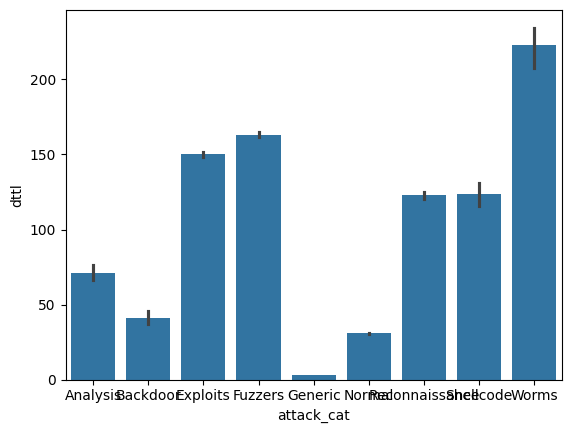

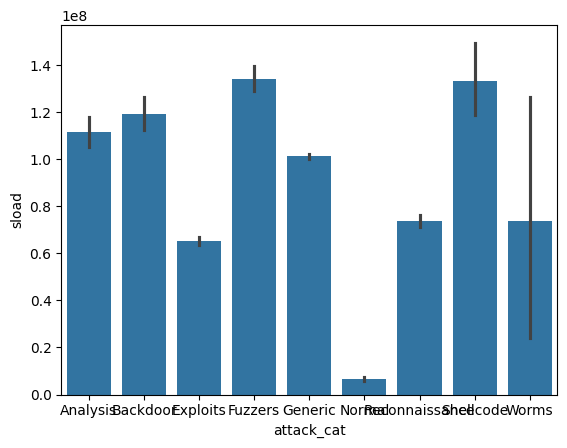

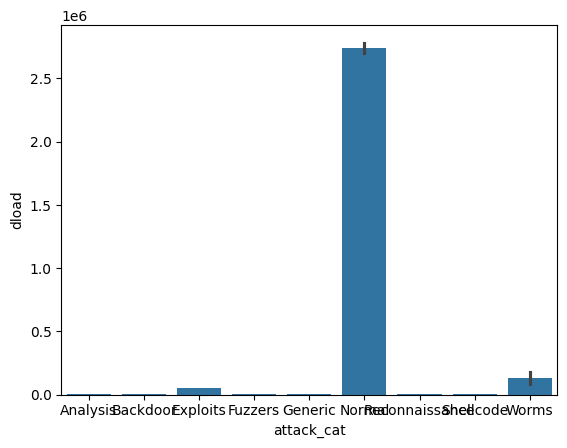

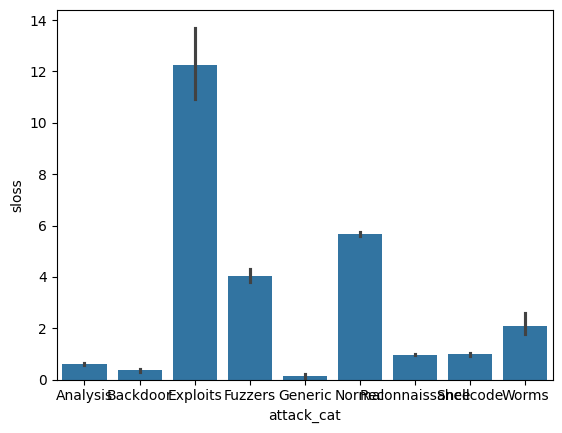

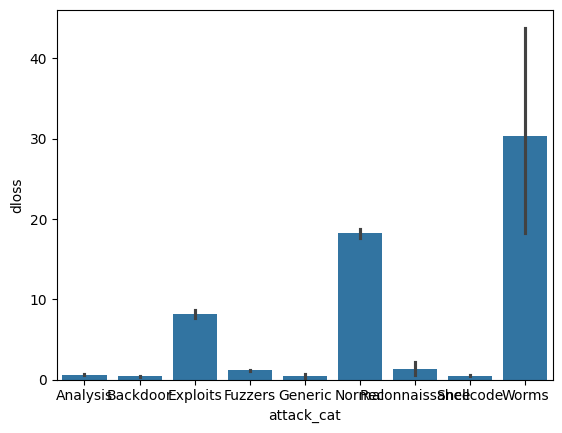

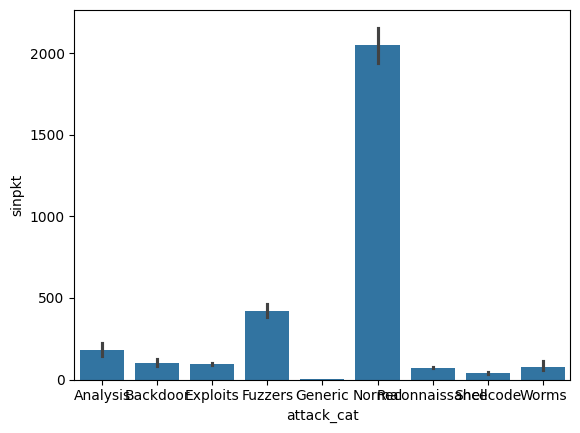

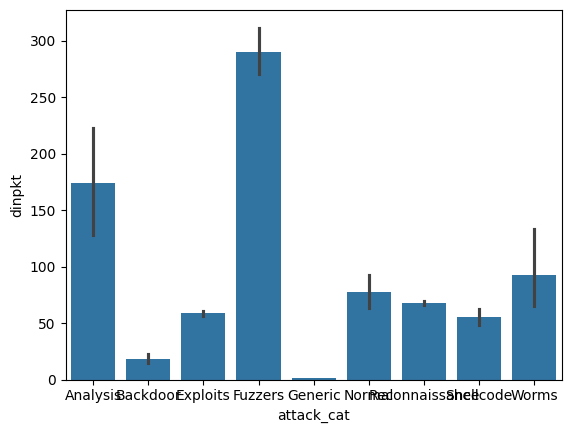

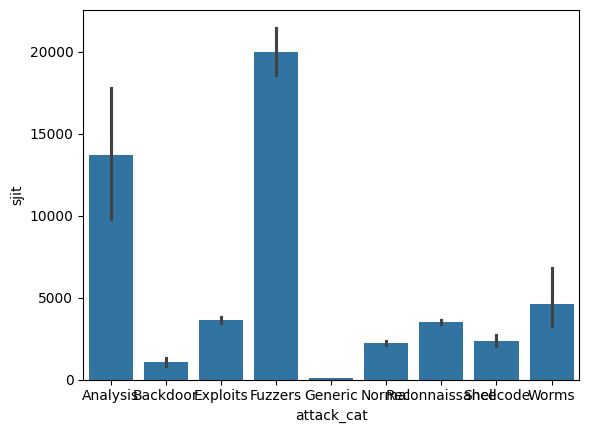

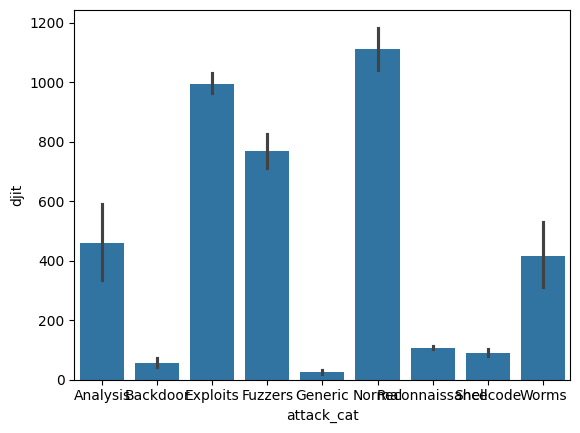

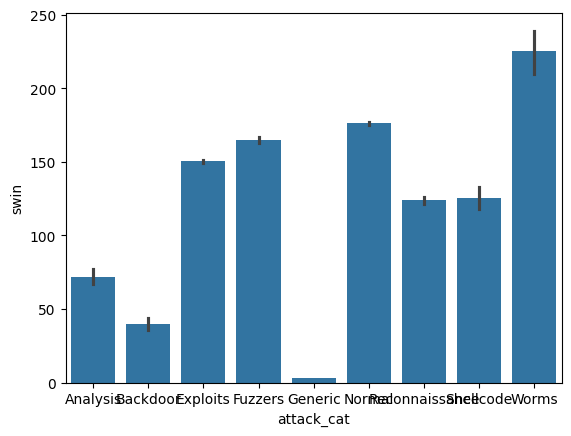

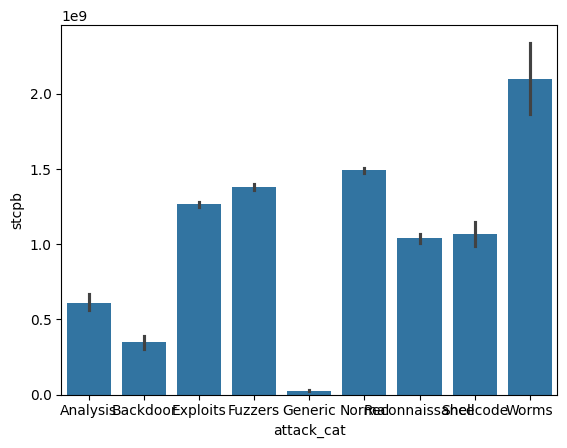

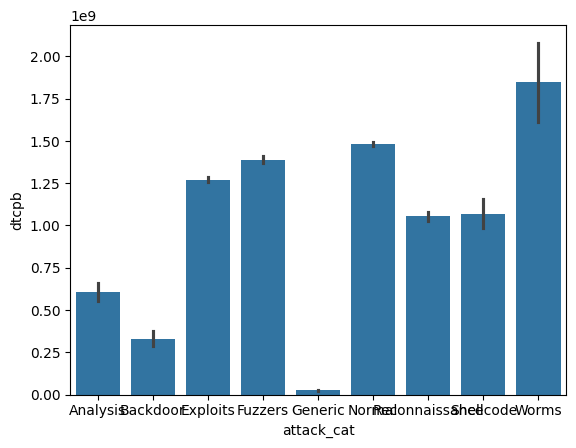

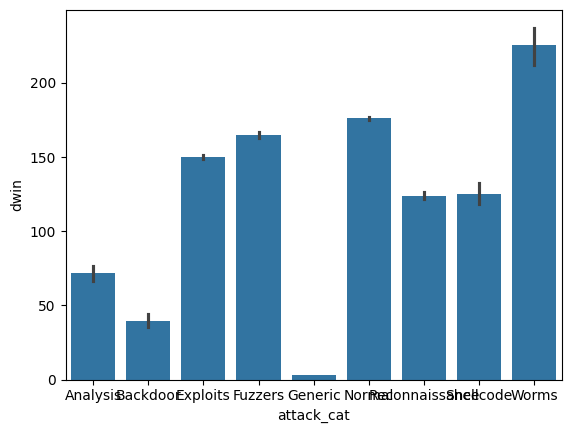

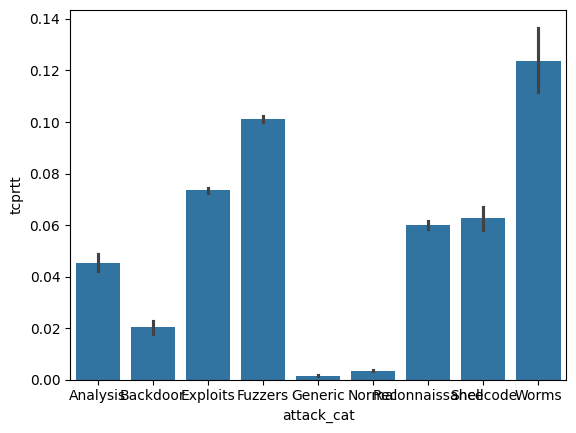

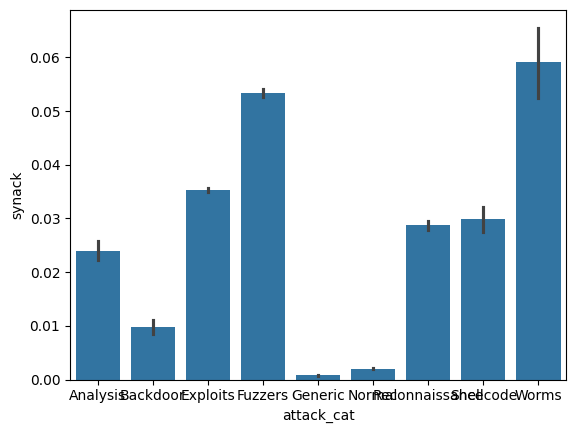

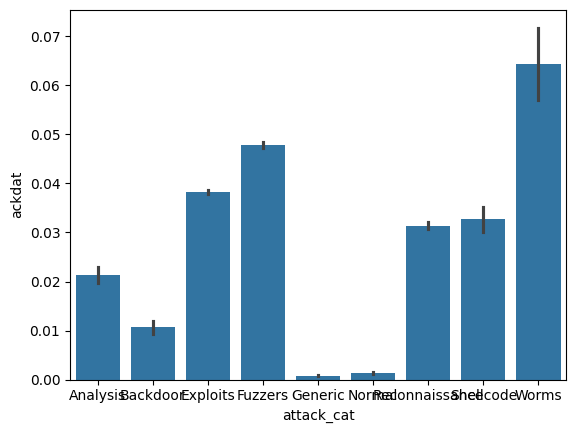

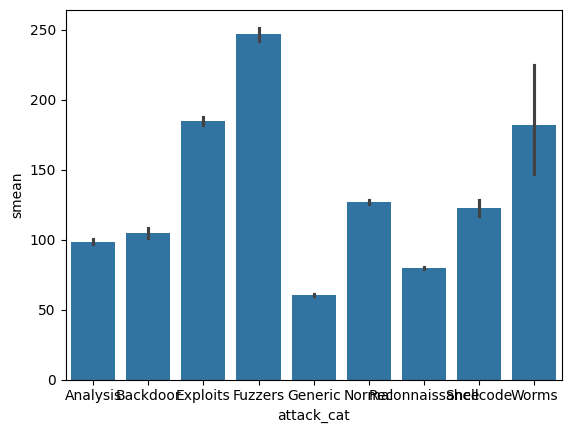

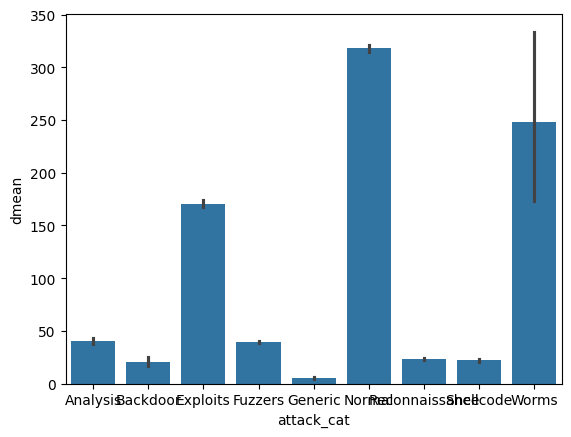

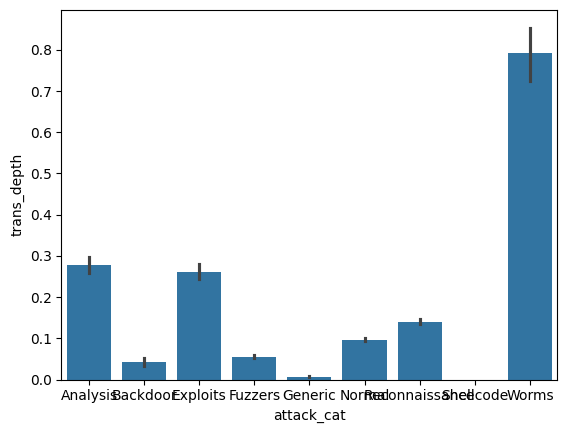

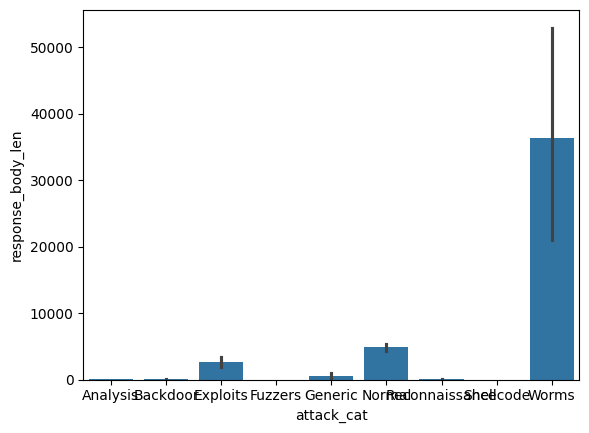

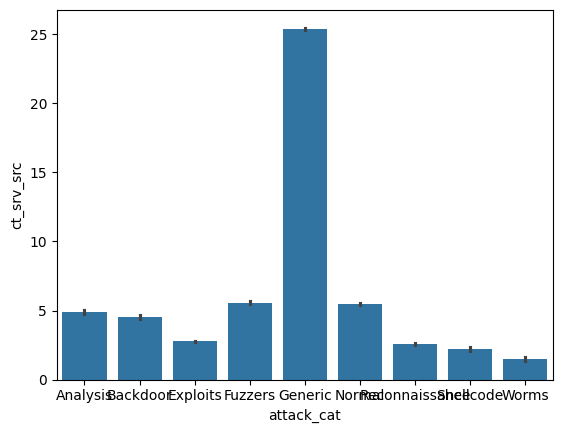

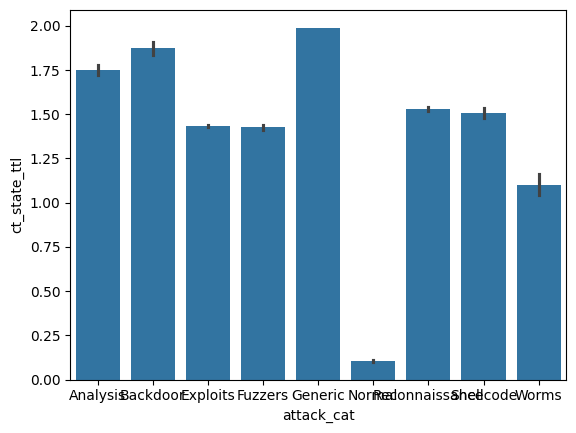

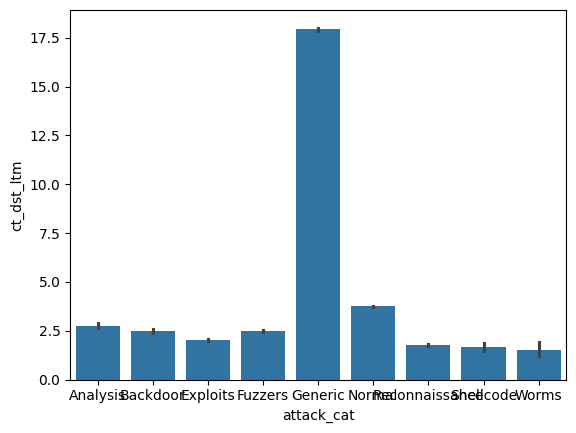

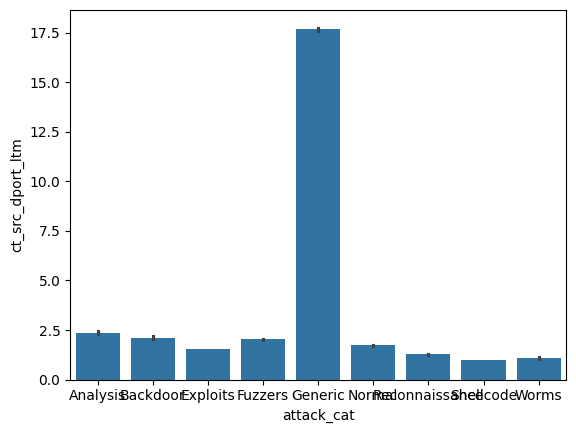

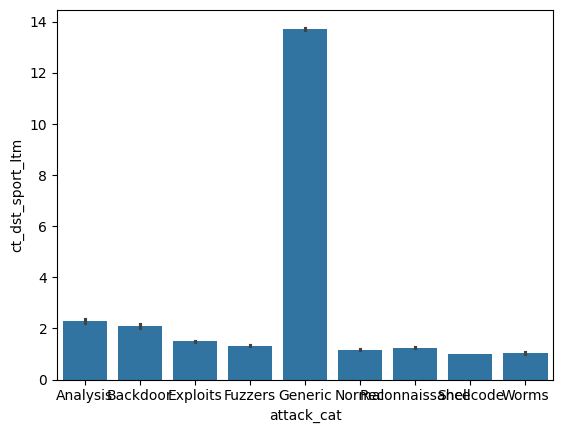

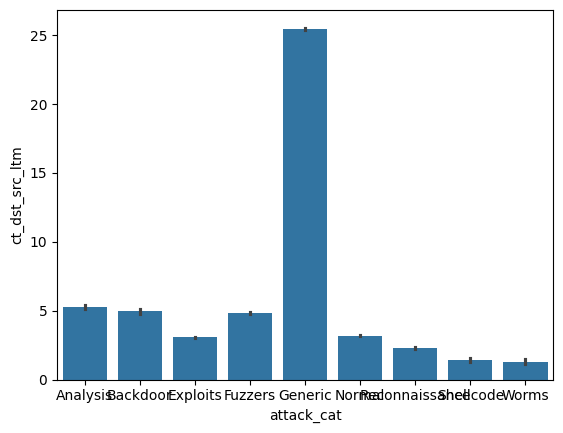

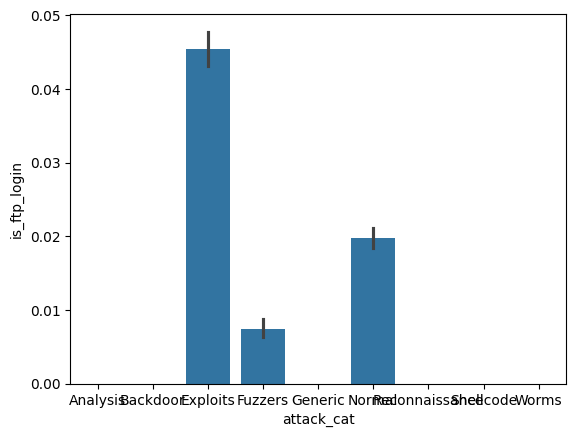

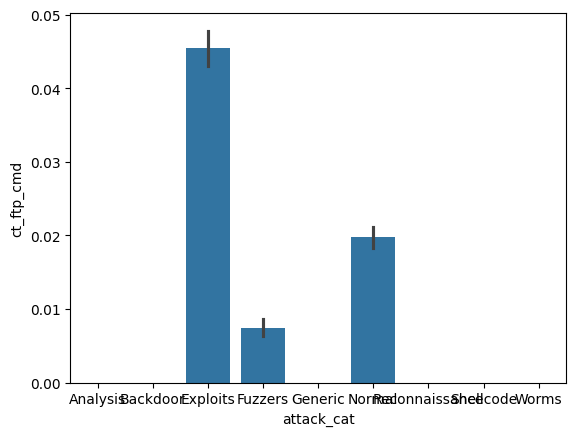

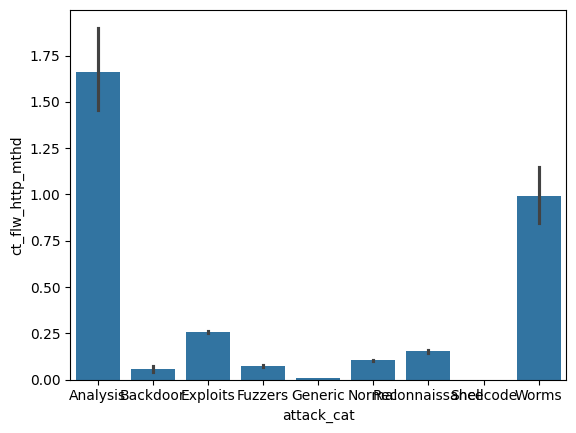

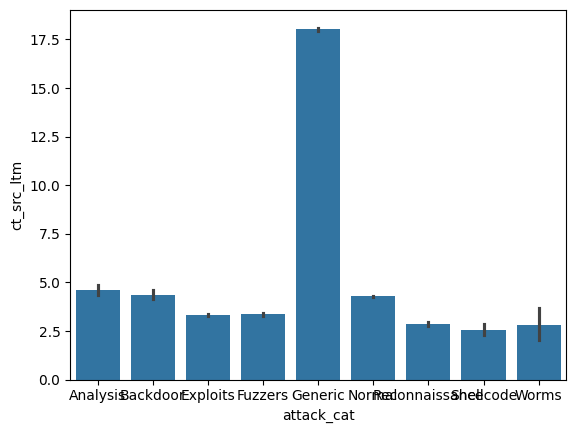

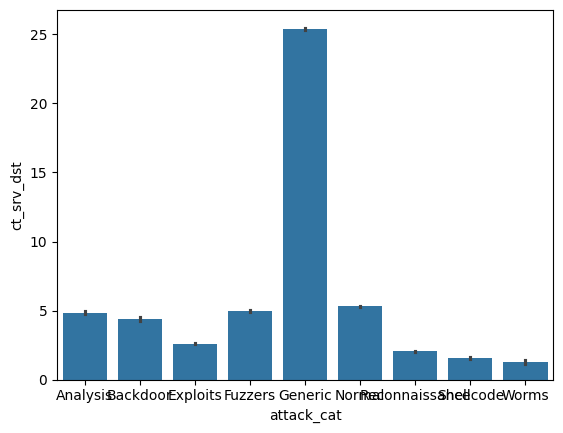

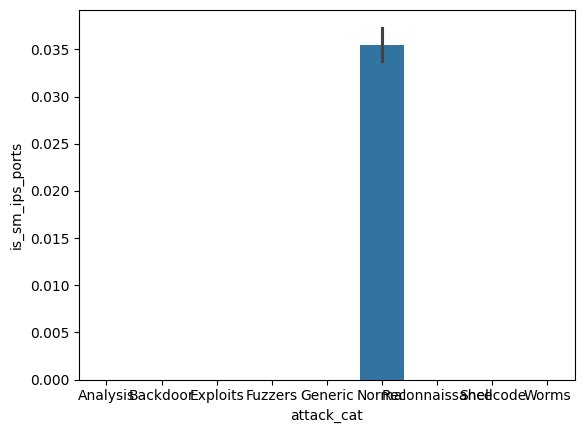

In [11]:
#Bar chart to show relationship between target variable and independant variables

# remove labels as thats one of the target variables
for i in ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']:
    sns.barplot(data=df,y=i,x="attack_cat")
    plt.show()

In [447]:
#compare malicious to normal 
# for i in df.keys():
#     fig, ax = plt.subplots(figsize=(6,2))
#     df.hist(column = i, by = "label", ax=ax, bins=20)
#     plt.suptitle(i)
#     plt.show()

In [448]:
 # for i in ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
#        'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
#        'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
#        'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
#        'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
#        'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
#        'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']:
#     sns.barplot(data=df,y=i,x="attack_cat")
#     plt.show()

### Figures of Attack Categories

In [449]:
# Label 0: Normal, Label 1: Attack
count0 = (df['label'] == 0).sum()
count1 = (df['label'] == 1).sum()

print("Normal records:", count0)
print("Attack records:", count1, "\n")

unique_attack = df['attack_cat'].unique()
print("Attack types:", unique_attack, "\n")

#Types of Attacks
count_analysis = (df['attack_cat'] == "Analysis").sum()
count_backdoors = (df['attack_cat'] == "Backdoor").sum()
count_exploits = (df['attack_cat'] == "Exploits").sum()
count_fuzzers = (df['attack_cat'] == "Fuzzers").sum()
count_generic = (df['attack_cat'] == "Generic").sum()
count_recon = (df['attack_cat'] == "Reconnaissance").sum()
count_shellcode = (df['attack_cat'] == "Shellcode").sum()
count_worms = (df['attack_cat'] == "Worms").sum()

count_normal = (df['attack_cat'] == "Normal").sum()

print("For number of Attack records by Attack type:")
print("Analysis type:", count_analysis, round(count_analysis/len(df)*100,2),"% of all data")
print("Backdoors type:", count_backdoors, round(count_backdoors/len(df)*100,2),"% of all data")
print("Exploits type:", count_exploits, round(count_exploits/len(df),2)*100,"% of all data")
print("Fuzzers type:", count_fuzzers, round(count_fuzzers/len(df),2)*100,"% of all data")
print("Reconnaissance type:", count_recon, round(count_recon/len(df),2)*100,"% of all data")
print("Shellcode type:", count_shellcode, round(count_shellcode/len(df),2)*100,"% of all data")
print("Worms type:", count_worms, round(count_worms/len(df),2)*100,"% of all data", "\n")
print("Normal type:", count_normal, round(count_normal/len(df)*100,2),"% of all data")

#AttackNo = (count_analysis + count_backdoors+ count_exploits+ count_fuzzers+ 
#             count_generic+ count_recon+ count_shellcode+ count_worms)

Normal records: 38777
Attack records: 107077 

Attack types: ['Analysis' 'Backdoor' 'Exploits' 'Fuzzers' 'Generic' 'Normal'
 'Reconnaissance' 'Shellcode' 'Worms'] 

For number of Attack records by Attack type:
Analysis type: 2000 1.37 % of all data
Backdoors type: 1746 1.2 % of all data
Exploits type: 33393 23.0 % of all data
Fuzzers type: 18184 12.0 % of all data
Reconnaissance type: 10491 7.000000000000001 % of all data
Shellcode type: 1133 1.0 % of all data
Worms type: 130 0.0 % of all data 

Normal type: 38777 26.59 % of all data


# Feature Extraction

## Categorical Data Type Conversion

Notes - 
Data Types:
Binary - swin (0, 255), is_sm_ip_ports (0, 1), label (0, 1)
Categorical (string) - proto (133 unique), state (13 unique), service (9 unique), attack_cat (9 unique)



### Label encoded: 'Attack_cat' Category to Numerical 'attack_encoded'

In [450]:
#Category into Numerical
le = LabelEncoder()
df['attack_encoded'] = le.fit_transform(df['attack_cat'])
unique_attack_encoded = df['attack_encoded'].unique()
print("Attack types:", unique_attack_encoded, "\n")

df.head()

Attack types: [0 1 2 3 4 5 6 7 8] 



dur proto service state  spkts  dpkts  sbytes  dbytes         rate  \
0  0.000009  unas       -   INT      2      0     200       0  111111.1072   
1  0.000009  unas       -   INT      2      0     200       0  111111.1072   
2  0.000008  unas       -   INT      2      0     200       0  125000.0003   
3  0.000008  unas       -   INT      2      0     200       0  125000.0003   
4  0.000008  unas       -   INT      2      0     200       0  125000.0003   

   sttl  dttl        sload  dload  sloss  dloss  sinpkt  dinpkt  sjit  djit  \
0   254     0   88888888.0    0.0      0      0   0.009     0.0   0.0   0.0   
1   254     0   88888888.0    0.0      0      0   0.009     0.0   0.0   0.0   
2   254     0  100000000.0    0.0      0      0   0.008     0.0   0.0   0.0   
3   254     0  100000000.0    0.0      0      0   0.008     0.0   0.0   0.0   
4   254     0  100000000.0    0.0      0      0   0.008     0.0   0.0   0.0   

   swin  stcpb  dtcpb  dwin  tcprtt  synack  ackdat  smean  dmean  \
0     0      0      0     0     0.0     0.0     0.0    100      0   
1     0      0      0     0     0.0     0.0     0.0    100      0   
2     0      0      0     0     0.0     0.0     0.0    100      0   
3     0      0      0     0     0.0     0.0     0.0    100      0   
4     0      0      0     0     0.0     0.0     0.0    100      0   

   trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  \
0            0                  0           8             2           5   
1            0                  0           7             2           2   
2            0                  0           7             2           2   
3            0                  0           8             2           2   
4            0                  0           8             2           6   

   ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0                 4                 4               8             0   
1                 2                 2               7             0   
2                 2                 2               7             0   
3                 2                 2               8             0   
4                 6                 6               8             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0          13           8                0   
1           0                 0          11           7                0   
2           0                 0           5           7                0   
3           0                 0           7           8                0   
4           0                 0          23           8                0   

  attack_cat  label  attack_encoded  
0   Analysis      1               0  
1   Analysis      1               0  
2   Analysis      1               0  
3   Analysis      1               0  
4   Analysis      1               0

#### attack_encoded Dictionary

In [451]:
# Create the dictionary
attack_encoded_dict = dict(zip(le.classes_, le.transform(le.classes_)))

print("attack_encoded Dictionary:")
print(attack_encoded_dict)

attack_encoded Dictionary:
{'Analysis': 0, 'Backdoor': 1, 'Exploits': 2, 'Fuzzers': 3, 'Generic': 4, 'Normal': 5, 'Reconnaissance': 6, 'Shellcode': 7, 'Worms': 8}


In [457]:
### OneHot Encoded Attack_cat

In [458]:
#one hot encode attack to get a clearer idea
ohe_attack = pd.get_dummies(df, columns=['attack_cat'])

ohe_attack.keys()

attack_ohe_columns = ['attack_cat_Analysis',
       'attack_cat_Backdoor', 'attack_cat_Exploits', 'attack_cat_Fuzzers',
       'attack_cat_Generic', 'attack_cat_Normal', 'attack_cat_Reconnaissance',
       'attack_cat_Shellcode', 'attack_cat_Worms']
df_attackohe = ohe_attack[attack_ohe_columns]


### OneHot Encoded with Corr Heatmap: 'service' Category to Numerical 
Service is closely linked with some of the minority attack categories and so will use one hot 

In [535]:
ohe_service = pd.get_dummies(df, columns=['service'])

import pandas as pd

service_ohe_columns = ['service_-', 'service_dhcp', 'service_dns',
       'service_ftp', 'service_ftp-data', 'service_http', 'service_irc',
       'service_pop3', 'service_radius', 'service_smtp', 'service_snmp',
       'service_ssh', 'service_ssl', 'label', 'attack_encoded']
df_serviceohe = ohe_service[service_ohe_columns]

KeyError: "None of [Index(['service'], dtype='object')] are in the [columns]"

<Axes: >

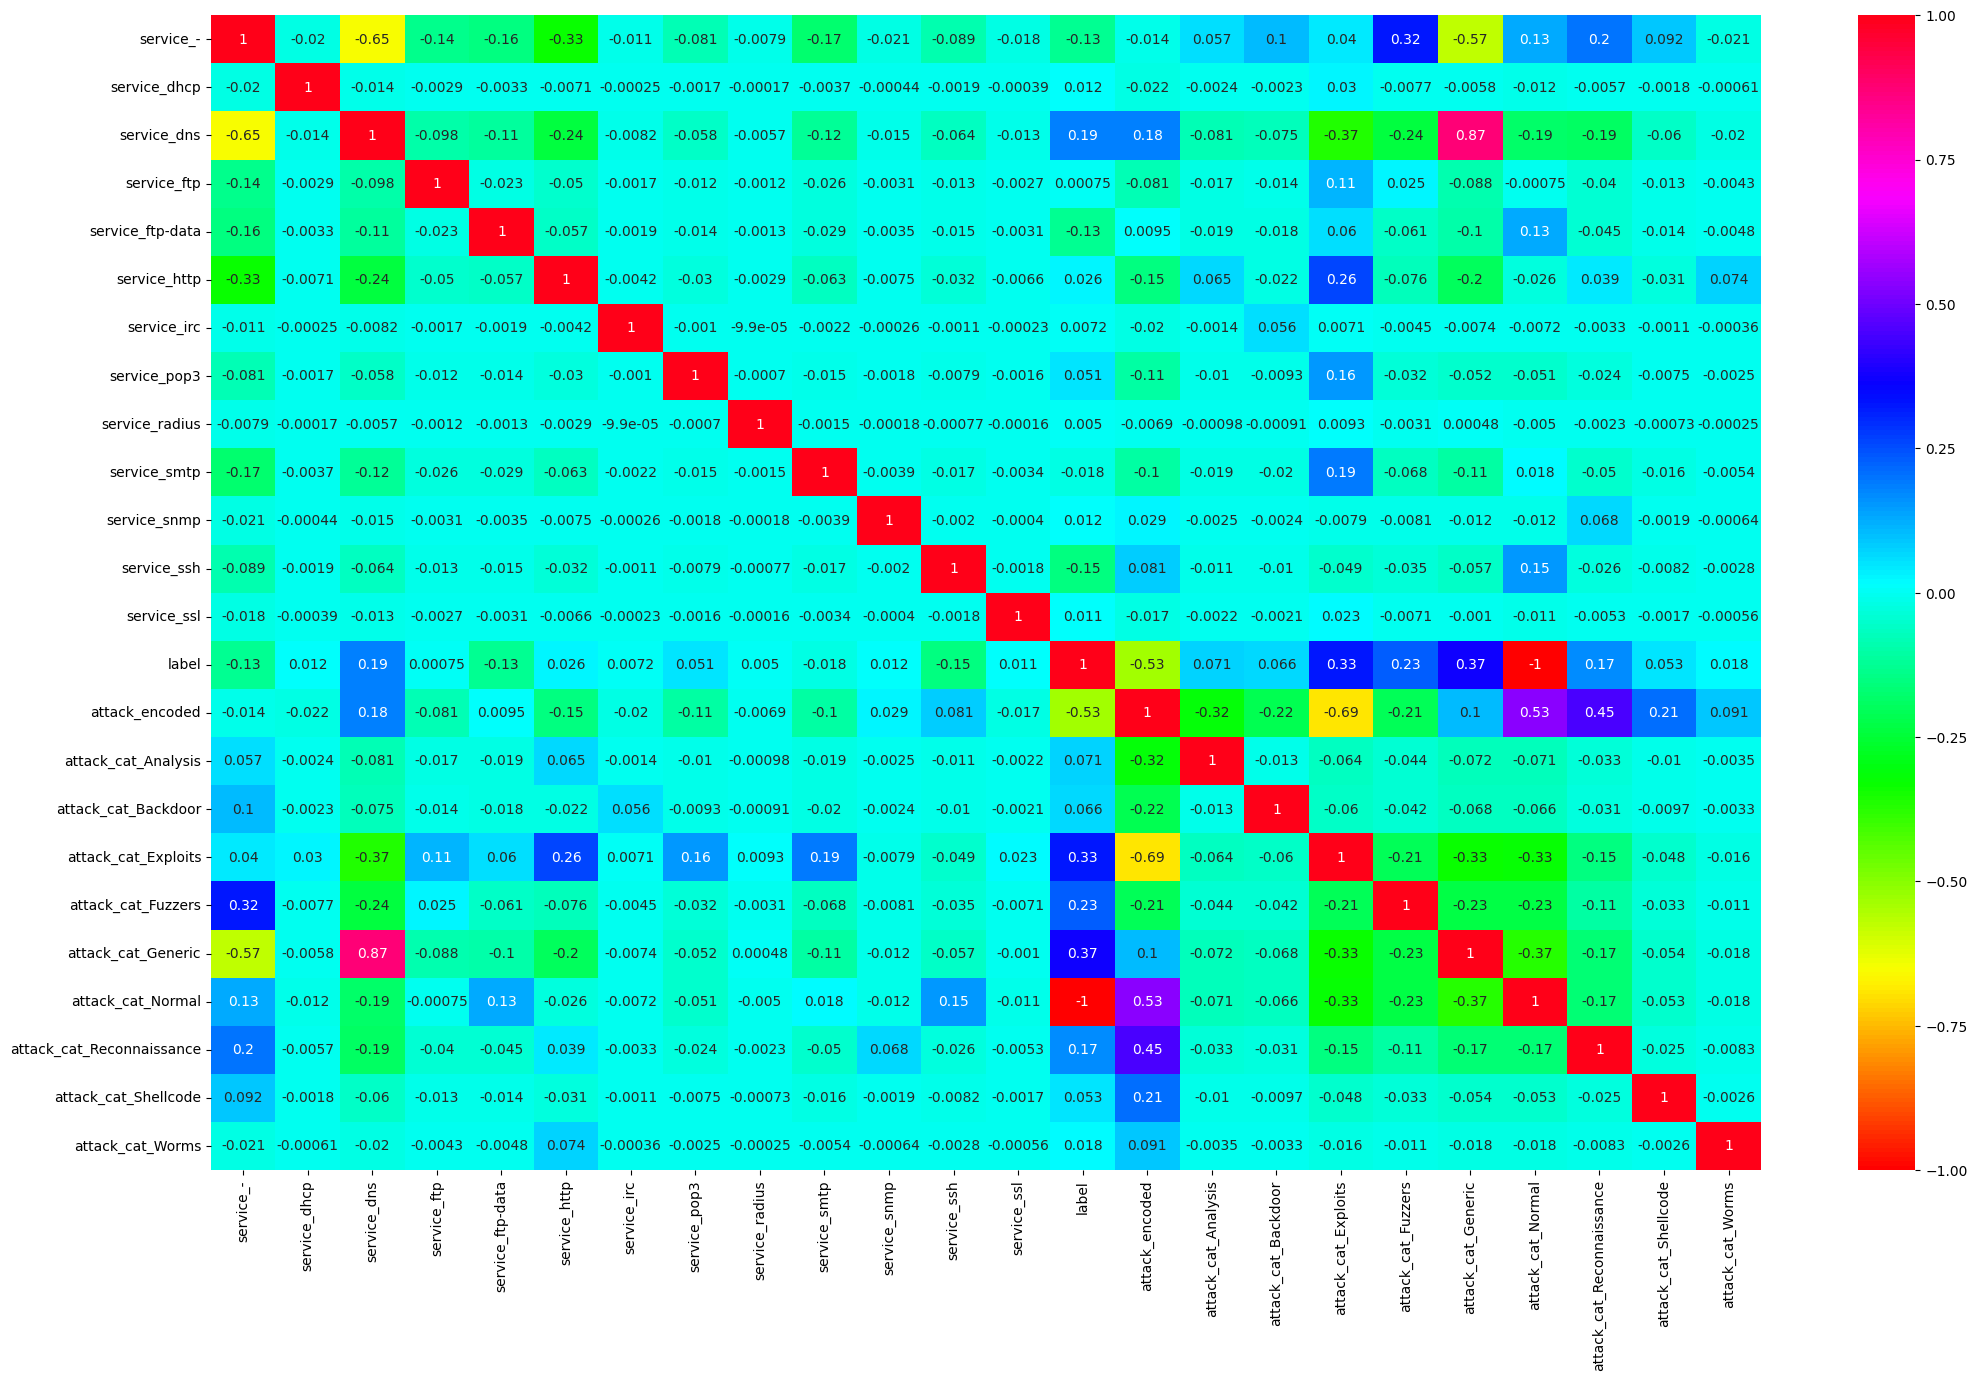

In [460]:
df_service_attack = pd.concat([df_serviceohe, df_attackohe], axis=1)

corr_with_ohe_service_attack=df_service_attack.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr_with_ohe_service_attack, annot=True, cmap='hsv')

### OneHot Encoded with Corr Heatmap: 'state' Category to Numerical 
Too many variables to conduct One-hot-encoding into the DF - so completing this to see how it looks on a correlation heatmap to consider the value of one-hot-encoding (and adding dimensionality - considering the option of only including some one-hots). 

In [ ]:
ohe_state = pd.get_dummies(df, columns=['state'])

ohe_state.keys()

state_ohe_columns = ['state_CON', 'state_ECO', 'state_FIN', 'state_INT',
       'state_PAR', 'state_REQ', 'state_RST', 'state_URN', 'label', 'attack_encoded']
df_stateohe = ohe_state[state_ohe_columns]

corr_with_ohe_state=df_stateohe.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr_with_ohe_state,annot=True, cmap='hsv')

KeyError: "None of [Index(['state'], dtype='object')] are in the [columns]"

### OneHot Encoded with Corr Heatmap: 'proto' Category to Numerical 
Too many variables to conduct One-hot-encoding into the DF - so completing this to see how it looks on a correlation heatmap to consider the value of one-hot-encoding (and adding dimensionality - considering the option of only including some one-hots). 

In [462]:
protocount = df["proto"].value_counts()

protocount300 = protocount[protocount > 100]
print(protocount300)

proto
tcp       65342
udp       59455
unas       8004
ospf       1857
arp        1459
sctp        831
any         198
gre         153
pim         143
sun-nd      143
mobile      143
swipe       143
sep         140
ipv6        138
rsvp        132
Name: count, dtype: int64


<Axes: >

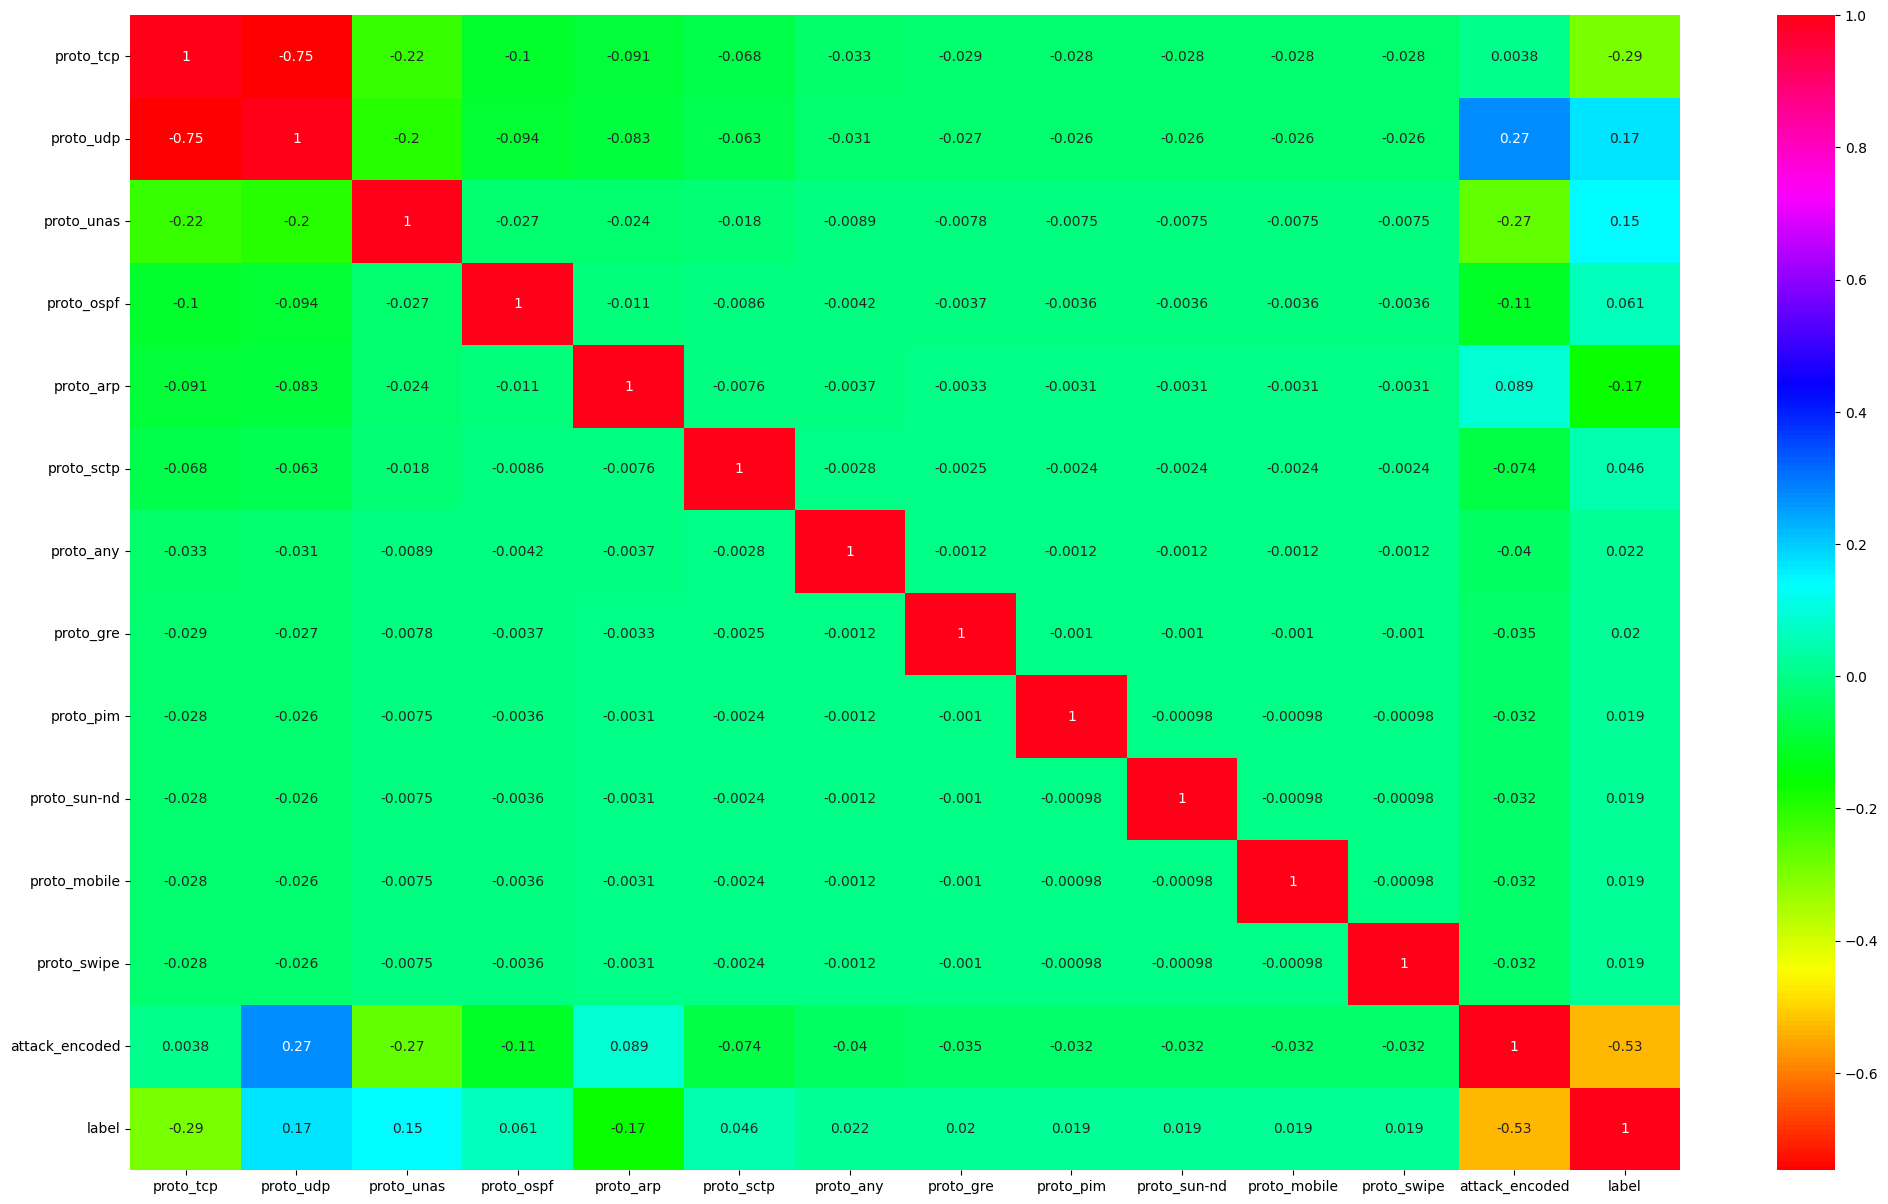

In [463]:
ohe_proto = pd.get_dummies(df, columns=['proto'])


# print(ohe_proto.columns.tolist())

proto_ohe_columns = ['proto_tcp', 'proto_udp', 'proto_unas', 'proto_ospf', 'proto_arp', 'proto_sctp', 'proto_any', 'proto_gre', 'proto_pim', 'proto_sun-nd', 'proto_mobile', 'proto_swipe']
df_protoohe = ohe_proto[proto_ohe_columns + ['attack_encoded', 'label']]

corr_with_ohe_proto=df_protoohe.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr_with_ohe_proto,annot=True, cmap='hsv')


# Data Cleaning
Examine the data attributes and identify issues present in the data. For each
of the issues that you have identified, decide and perform necessary actions to address it.

Missing Entries
Duplicates
Data Types and conversions
Scaling/Standardisation
Feature/Attribute Selection
Data Instances
Data Imbalance
Feature Engineering
Others

Divide Training set???

## Move Target attributes to front

In [464]:
# Current column order
current_columns = df.columns.tolist()

# Specify the columns you want to move to the front
columns_to_move = ['label', 'attack_cat', 'attack_encoded']

# Get the remaining columns
remaining_columns = [col for col in current_columns if col not in columns_to_move]

# New column order
new_column_order = columns_to_move + remaining_columns

# Reorder DataFrame columns
df = df[new_column_order]

# Verify the new column order
print(df.head())

   label attack_cat  attack_encoded       dur proto service state  spkts  \
0      1   Analysis               0  0.000009  unas       -   INT      2   
1      1   Analysis               0  0.000009  unas       -   INT      2   
2      1   Analysis               0  0.000008  unas       -   INT      2   
3      1   Analysis               0  0.000008  unas       -   INT      2   
4      1   Analysis               0  0.000008  unas       -   INT      2   

   dpkts  sbytes  dbytes         rate  sttl  dttl        sload  dload  sloss  \
0      0     200       0  111111.1072   254     0   88888888.0    0.0      0   
1      0     200       0  111111.1072   254     0   88888888.0    0.0      0   
2      0     200       0  125000.0003   254     0  100000000.0    0.0      0   
3      0     200       0  125000.0003   254     0  100000000.0    0.0      0   
4      0     200       0  125000.0003   254     0  100000000.0    0.0      0   

   dloss  sinpkt  dinpkt  sjit  djit  swin  stcpb  dtcpb  dwin

## Duplicate rows
There are 38% duplicates. 
Domain Knowledge could help identify if these duplicates are real or whether it is common to have many items with the same results. 
Duplicates to be dealt with in Data Balancing section.

Look at % of duplicated per attack type

## Simulate dropping Duplicates from dfr 
keeping df as original - non dropped duplicates 
dfr is with no duplicates

In [465]:
dfr = df
duplicates = dfr[dfr.duplicated()]
dfr = dfr.drop_duplicates()

In [466]:
print(df.shape)
print(dfr.shape)

(145854, 47)
(89208, 47)


In [467]:
### Duplicate rows (using df for clean data)

is_duplicate = df.duplicated(subset=None, keep='first')
duplicate_instances = np.where(is_duplicate)[0]
print("Duplicate Rows: ", duplicate_instances)

count = 0
for i in duplicate_instances:
    # Print the duplicate row
    count += 1
print(count)
print("Percentage of Duplicates:", count/(len(df))*100, "% \n")

duplicate_df = df.iloc[duplicate_instances]
duplicate_df.tail(10)

Duplicate Rows:  [     5     10     22 ... 145771 145798 145814]
56646
Percentage of Duplicates: 38.83746760459089 % 



label attack_cat  attack_encoded       dur proto service state  spkts  \
145605      1  Shellcode               7  0.000009   udp       -   INT      2   
145627      1  Shellcode               7  0.000008   udp       -   INT      2   
145633      1  Shellcode               7  0.000009   udp       -   INT      2   
145652      1  Shellcode               7  0.000009   udp       -   INT      2   
145661      1  Shellcode               7  0.000009   udp       -   INT      2   
145666      1  Shellcode               7  0.000006   udp       -   INT      2   
145716      1  Shellcode               7  0.000009   udp       -   INT      2   
145771      1      Worms               8  0.385634   tcp    http   FIN     10   
145798      1      Worms               8  0.387160   tcp    http   FIN     10   
145814      1      Worms               8  5.411692   tcp    http   FIN     66   

        dpkts  sbytes  dbytes           rate  sttl  dttl         sload  \
145605      0     248       0  111111.107200   254     0  1.102222e+08   
145627      0     136       0  125000.000300   254     0  6.800000e+07   
145633      0     464       0  111111.107200   254     0  2.062222e+08   
145652      0     280       0  111111.107200   254     0  1.244444e+08   
145661      0     416       0  111111.107200   254     0  1.848889e+08   
145666      0     232       0  166666.660800   254     0  1.546667e+08   
145716      0     194       0  111111.107200   254     0  8.622222e+07   
145771      6    1314     268      38.896985   254   252  2.454140e+04   
145798      6     816     268      38.743672   254   252  1.518752e+04   
145814    368    3214  482261      80.011942   254   252  4.680237e+03   

                dload  sloss  dloss     sinpkt     dinpkt         sjit  \
145605       0.000000      0      0   0.009000   0.000000     0.000000   
145627       0.000000      0      0   0.008000   0.000000     0.000000   
145633       0.000000      0      0   0.009000   0.000000     0.000000   
145652       0.000000      0      0   0.009000   0.000000     0.000000   
145661       0.000000      0      0   0.009000   0.000000     0.000000   
145666       0.000000      0      0   0.006000   0.000000     0.000000   
145716       0.000000      0      0   0.009000   0.000000     0.000000   
145771    4646.893066      2      1  41.440444  71.709203  2760.997482   
145798    4628.577148      2      1  35.014778  67.246797  1824.850151   
145814  710980.562500      2    181  83.255400  14.533106  4393.514627   

               djit  swin       stcpb       dtcpb  dwin    tcprtt    synack  \
145605     0.000000     0           0           0     0  0.000000  0.000000   
145627     0.000000     0           0           0     0  0.000000  0.000000   
145633     0.000000     0           0           0     0  0.000000  0.000000   
145652     0.000000     0           0           0     0  0.000000  0.000000   
145661     0.000000     0           0           0     0  0.000000  0.000000   
145666     0.000000     0           0           0     0  0.000000  0.000000   
145716     0.000000     0           0           0     0  0.000000  0.000000   
145771   128.337063   255   290966090  1375755137   255  0.079918  0.027074   
145798    91.149219   255  1856666519  4085128820   255  0.089837  0.050917   
145814  1779.647006   255  2117020568  3891423816   255  0.181316  0.092560   

          ackdat  smean  dmean  trans_depth  response_body_len  ct_srv_src  \
145605  0.000000    124      0            0                  0           1   
145627  0.000000     68      0            0                  0           1   
145633  0.000000    232      0            0                  0           1   
145652  0.000000    140      0            0                  0           1   
145661  0.000000    208      0            0                  0           3   
145666  0.000000    116      0            0                  0           1   
145716  0.000000     97      0            0                  0        

### Explore Duplicates

In [468]:
#what is the % of attack_cat in the duplicates?
duplicate_df = df.iloc[duplicate_instances]

#Count of Attacks in ALL  Data
ocount_analysis = (df['attack_cat'] == "Analysis").sum()
ocount_backdoors = (df['attack_cat'] == "Backdoor").sum()
ocount_exploits = (df['attack_cat'] == "Exploits").sum()
ocount_fuzzers = (df['attack_cat'] == "Fuzzers").sum()
ocount_generic = (df['attack_cat'] == "Generic").sum()
ocount_recon = (df['attack_cat'] == "Reconnaissance").sum()
ocount_shellcode = (df['attack_cat'] == "Shellcode").sum()
ocount_worms = (df['attack_cat'] == "Worms").sum()
ocount_normal = (df['attack_cat'] == "Normal").sum()

#Types of Attacks inside ONLY duplicates
dcount_analysis = (duplicate_df['attack_cat'] == "Analysis").sum()
dcount_backdoors = (duplicate_df['attack_cat'] == "Backdoor").sum()
dcount_exploits = (duplicate_df['attack_cat'] == "Exploits").sum()
dcount_fuzzers = (duplicate_df['attack_cat'] == "Fuzzers").sum()
dcount_generic = (duplicate_df['attack_cat'] == "Generic").sum()
dcount_recon = (duplicate_df['attack_cat'] == "Reconnaissance").sum()
dcount_shellcode = (duplicate_df['attack_cat'] == "Shellcode").sum()
dcount_worms = (duplicate_df['attack_cat'] == "Worms").sum()

dcount_normal = (duplicate_df['attack_cat'] == "Normal").sum()

print("For number of Duplicates by Attack type (as a percentage of that Attack Type):")
print("Analysis type:", round(dcount_analysis/ocount_analysis*100, 2), "%")
print("Backdoors type:", round(dcount_backdoors/ocount_backdoors*100,2), "%")
print("Exploits type:", round(dcount_exploits/ocount_exploits*100,2), "%")
print("Fuzzers type:", round(dcount_fuzzers/ocount_fuzzers*100,2), "%")
print("Generic type:", round(dcount_generic/ocount_generic*100,2), "%")
print("Reconnaissance type:", round(dcount_recon/ocount_recon*100,2), "%")
print("Shellcode type:", round(dcount_shellcode/ocount_shellcode*100,2), "%")
print("Worms type:", round(dcount_worms/ocount_worms*100,2), "% \n")
print("Normal type:", round(dcount_normal/ocount_normal*100,2), "% \n")




For number of Duplicates by Attack type (as a percentage of that Attack Type):
Analysis type: 20.3 %
Backdoors type: 12.08 %
Exploits type: 40.57 %
Fuzzers type: 11.19 %
Generic type: 89.55 %
Reconnaissance type: 28.3 %
Shellcode type: 3.71 %
Worms type: 2.31 % 

Normal type: 4.16 % 



### Explore option to remove all duplicates

In [469]:
print("If Duplicates stayed:")
print("Analysis type:", ocount_analysis, round(ocount_analysis/len(df)*100,2),"% of all data")
print("Backdoors type:", ocount_backdoors, round(ocount_backdoors/len(df)*100,2),"% of all data")
print("Exploits type:", ocount_exploits, round(ocount_exploits/len(df),2)*100,"% of all data")
print("Fuzzers type:", ocount_fuzzers, round(ocount_fuzzers/len(df),2)*100,"% of all data")
print("Generic type:", ocount_generic, round(ocount_generic/len(df), 2)*100, "% of all data")
print("Reconnaissance type:", ocount_recon, round(ocount_recon/len(df)*100,2),"% of all data")
print("Shellcode type:", ocount_shellcode, round(ocount_shellcode/len(df)*100,2),"% of all data")
print("Worms type:", ocount_worms, round(ocount_worms/len(df),2)*100,"% of all data")
print("Normal type:", ocount_normal, round(ocount_normal/len(df)*100,2),"% of all data","\n")

print("If Duplicates were removed:")
print("Analysis type:", ocount_analysis-dcount_analysis, round(count_analysis/len(dfr)*100,2),"% of all data")
print("Backdoors type:", ocount_backdoors-dcount_backdoors, round(count_backdoors/len(dfr)*100,2),"% of all data")
print("Exploits type:", ocount_exploits-dcount_exploits, round(count_exploits/len(dfr),2)*100,"% of all data")
print("Fuzzers type:", ocount_fuzzers-dcount_fuzzers, round(count_fuzzers/len(dfr),2)*100,"% of all data")
print("Generic type:", ocount_generic-dcount_generic, round(ocount_generic/len(dfr), 2)*100, "%", "of all data")
print("Reconnaissance type:", ocount_recon-dcount_recon, round(count_recon/len(dfr),2)*100,"% of all data")
print("Shellcode type:", ocount_shellcode-dcount_shellcode, round(count_shellcode/len(dfr)*100,2),"% of all data")
print("Worms type:", ocount_worms-dcount_worms, round(count_worms/len(dfr),2)*100,"% of all data")
print("Normal type:", ocount_normal-dcount_normal, round(count_normal/len(dfr)*100,2),"% of all data \n")

If Duplicates stayed:
Analysis type: 2000 1.37 % of all data
Backdoors type: 1746 1.2 % of all data
Exploits type: 33393 23.0 % of all data
Fuzzers type: 18184 12.0 % of all data
Generic type: 40000 27.0 % of all data
Reconnaissance type: 10491 7.19 % of all data
Shellcode type: 1133 0.78 % of all data
Worms type: 130 0.0 % of all data
Normal type: 38777 26.59 % of all data 

If Duplicates were removed:
Analysis type: 1594 2.24 % of all data
Backdoors type: 1535 1.96 % of all data
Exploits type: 19844 37.0 % of all data
Fuzzers type: 16150 20.0 % of all data
Generic type: 4181 45.0 % of all data
Reconnaissance type: 7522 12.0 % of all data
Shellcode type: 1091 1.27 % of all data
Worms type: 127 0.0 % of all data
Normal type: 37164 43.47 % of all data 



In [470]:
# Data with duplicates
with_duplicates = [
    round(ocount_analysis/len(df)*100,2),
    round(ocount_backdoors/len(df)*100,2),
    round(ocount_exploits/len(df),2)*100,
    round(ocount_fuzzers/len(df),2)*100,
    round(ocount_generic/len(df),2)*100,
    round(ocount_recon/len(df),2)*100,
    round(ocount_shellcode/len(df)*100,2),
    round(ocount_worms/len(df),2)*100,
    round(ocount_normal/len(df)*100,2)
]

# Data without duplicates
without_duplicates = [
    round(count_analysis/len(dfr)*100,2),
    round(count_backdoors/len(dfr)*100,2),
    round(count_exploits/len(dfr),2)*100,
    round(count_fuzzers/len(dfr),2)*100,
    round(count_generic/len(dfr),2)*100,
    round(count_recon/len(dfr),2)*100,
    round(count_shellcode/len(dfr)*100,2),
    round(count_worms/len(dfr),2)*100,
    round(count_normal/len(dfr)*100,2)
]

labels = ['Analysis', 'Backdoors', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms', 'Normal']

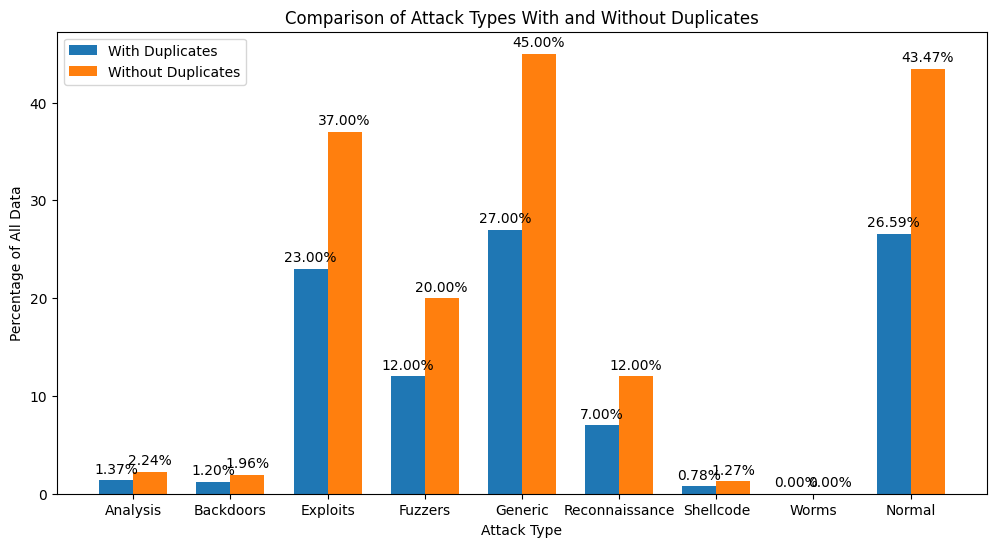

In [471]:
x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, with_duplicates, width, label='With Duplicates')
bars2 = ax.bar(x + width/2, without_duplicates, width, label='Without Duplicates')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Attack Type')
ax.set_ylabel('Percentage of All Data')
ax.set_title('Comparison of Attack Types With and Without Duplicates')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the percentage values on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text by 3 points above the bar
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.show()

In [472]:
print("Analysis count with duplicates:", ocount_analysis)
print("Backdoors count with duplicates:", ocount_backdoors)
print("Exploits count with duplicates:", ocount_exploits)
print("Fuzzers count with duplicates:", ocount_fuzzers)
print("Reconnaissance count with duplicates:", ocount_recon)
print("Shellcode count with duplicates:", ocount_shellcode)
print("Worms count with duplicates:", ocount_worms)
print("Normal count with duplicates:", ocount_normal, "\n")

print("Analysis count after removing duplicates:", ocount_analysis - dcount_analysis)
print("Backdoors count after removing duplicates:", ocount_backdoors - dcount_backdoors)
print("Exploits count after removing duplicates:", ocount_exploits - dcount_exploits)
print("Fuzzers count after removing duplicates:", ocount_fuzzers - dcount_fuzzers)
print("Reconnaissance count after removing duplicates:", ocount_recon - dcount_recon)
print("Shellcode count after removing duplicates:", ocount_shellcode - dcount_shellcode)
print("Worms count after removing duplicates:", ocount_worms - dcount_worms)
print("Normal count after removing duplicates:", ocount_normal - dcount_normal)




Analysis count with duplicates: 2000
Backdoors count with duplicates: 1746
Exploits count with duplicates: 33393
Fuzzers count with duplicates: 18184
Reconnaissance count with duplicates: 10491
Shellcode count with duplicates: 1133
Worms count with duplicates: 130
Normal count with duplicates: 38777 

Analysis count after removing duplicates: 1594
Backdoors count after removing duplicates: 1535
Exploits count after removing duplicates: 19844
Fuzzers count after removing duplicates: 16150
Reconnaissance count after removing duplicates: 7522
Shellcode count after removing duplicates: 1091
Worms count after removing duplicates: 127
Normal count after removing duplicates: 37164


#### Decision: Keep duplicates!
Will keep duplicates for now as removing them will significantly imbalance data between non-attacks and attacks. 

## Missing Entries


In [473]:
#Missing Value check
df.isnull().sum() 

label                0
attack_cat           0
attack_encoded       0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst 

## Incorrect Entries

- State - 1 x "no"
- Check Unusual protocols (domain knowledge) - enough values to consider not incorrect
- 2 items in a binary attribute that is not binary 

### Object data type value counts

In [474]:
#Incorrect: Object Data Types - by amount 

for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

attack_cat
Generic           40000
Normal            38777
Exploits          33393
Fuzzers           18184
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64
******************************
proto
tcp      65342
udp      59455
unas      8004
ospf      1857
arp       1459
         ...  
rdp         64
argus       64
icmp        14
igmp         1
rtp          1
Name: count, Length: 133, dtype: int64
******************************
service
-           69774
dns         46459
http        15847
smtp         4610
ftp-data     3727
ftp          2933
ssh          1253
pop3         1040
snmp           67
dhcp           61
ssl            52
irc            21
radius         10
Name: count, dtype: int64
******************************
state
INT    68921
FIN    65160
CON    10795
REQ      884
RST       80
ECO       11
PAR        1
URN        1
no         1
Name: count, dtype: int64
***************************

### Object data type unique values

In [475]:
#Incorrect Data in Object Data by unique values
for i in df.select_dtypes(include="object").columns:
    print(i,":", df[i].unique())
    print("***"*10)

attack_cat : ['Analysis' 'Backdoor' 'Exploits' 'Fuzzers' 'Generic' 'Normal'
 'Reconnaissance' 'Shellcode' 'Worms']
******************************
proto : ['unas' 'ib' 'ospf' 'sctp' 'gmtp' 'scps' 'tcp' 'smp' 'isis' 'ipnip' 'st2'
 'bbn-rcc' 'igp' 'irtp' '3pc' 'tp++' 'il' 'sdrp' 'skip' 'pup' 'trunk-1'
 'sat-mon' 'cpnx' 'ipv6' 'ipv6-frag' 'swipe' 'secure-vmtp' 'narp'
 'ipv6-no' 'ipv6-opts' 'mtp' 'any' 'gre' 'nvp' 'leaf-1' 'argus' 'prm'
 'xns-idp' 'rdp' 'mfe-nsp' 'ipv6-route' 'sat-expak' 'ggp' 'ip' 'pvp'
 'chaos' 'egp' 'leaf-2' 'netblt' 'idpr' 'ddp' 'rsvp' 'i-nlsp' 'ippc'
 'etherip' 'pri-enc' 'dgp' 'qnx' 'nsfnet-igp' 'tcf' 'pgm' 'zero' 'iso-ip'
 'vmtp' 'ttp' 'ipx-n-ip' 'vrrp' 'crtp' 'crudp' 'emcon' 'ddx' 'xnet' 'uti'
 'trunk-2' 'iso-tp4' 'compaq-peer' 'l2tp' 'ipcv' 'tlsp' 'wb-mon' 'sm'
 'wb-expak' 'mux' 'eigrp' 'larp' 'fc' 'merit-inp' 'pnni' 'idpr-cmtp'
 'idrp' 'a/n' 'mhrp' 'rvd' 'cftp' 'vines' 'iatp' 'visa' 'cphb' 'ptp'
 'ax.25' 'sccopmce' 'kryptolan' 'micp' 'ipip' 'aes-sp3-d' 'ifmp' 'snp'

In [476]:
#Protocols not real (Domain Knowledge)

print("proto \'any\'", (df['proto'] == "any").sum())
print("proto \'zero\'", (df['proto'] == "zero").sum())
print("proto \'mobile\'", (df['proto'] == "mobile").sum())

proto 'any' 198
proto 'zero' 66
proto 'mobile' 143


#### 'service' by label

In [477]:

# Group by 'sttl' and calculate counts for each label
counts = df.groupby(['service', 'label']).size().unstack(fill_value=0)

# Rename columns for clarity
counts.columns = ['label_0', 'label_1']

# Reset index to make 'sttl' a column again
counts.reset_index(inplace=True)

print(counts)


     service  label_0  label_1
0          -    22591    47183
1       dhcp        0       61
2        dns     6765    39694
3        ftp      773     2160
4   ftp-data     2292     1435
5       http     3687    12160
6        irc        0       21
7       pop3        0     1040
8     radius        0       10
9       smtp     1426     3184
10      snmp        1       66
11       ssh     1242       11
12       ssl        0       52


#### 'service' by attack_cat

In [478]:

# Group by 'sttl' and calculate counts for each label
counts = df.groupby(['service', 'attack_cat']).size().unstack(fill_value=0)

# Rename columns for clarity
# counts.columns = ['label_0', 'label_1']

# Reset index to make 'sttl' a column again
counts.reset_index(inplace=True)

print(counts)


attack_cat   service  Analysis  Backdoor  Exploits  Fuzzers  Generic  Normal  \
0                  -      1436      1647     17206    16453      504   22591   
1               dhcp         0         0        52        0        9       0   
2                dns         0         0       185      358    39116    6765   
3                ftp         0         5      1615      537        3     773   
4           ftp-data         0         0      1435        0        0    2292   
5               http       558        83      8677      836      289    3687   
6                irc         0        11        10        0        0       0   
7               pop3         0         0      1039        0        1       0   
8             radius         0         0         7        0        3       0   
9               smtp         6         0      3113        0       60    1426   
10              snmp         0         0         5        0        1       1   
11               ssh         0         0

### Binary data type unique values
swin (0, 255), is_sm_ips_ports (0, 1), label (0, 1),
Inconsistant binary: dwin, is_ftp_login

In [479]:
df["swin"].value_counts()
df['swin'] = df['swin'].astype(int)


In [480]:
df["is_sm_ips_ports"].value_counts()
df["is_sm_ips_ports"] = df["is_sm_ips_ports"].astype(int)

In [481]:
df["label"].value_counts()
df["label"] = df["label"].astype(int)

In [482]:
df["dwin"].value_counts()
df["dwin"] = df["dwin"].astype(int)

In [483]:
print(df['is_ftp_login'].value_counts())
df['is_ftp_login_bin'] = df['is_ftp_login'].astype(int)
# Replace 2 and 4 in 'ct_ftp_cmd' with the mode of the column
df['is_ftp_login_bin'].replace([2, 4], df['is_ftp_login'].mode()[0], inplace=True)

is_ftp_login
0    143488
1      2344
4        16
2         6
Name: count, dtype: int64


C:\Users\safja\AppData\Local\Temp\ipykernel_26296\826272277.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['is_ftp_login'].replace([2, 4], df['is_ftp_login'].mode()[0], inplace=True)


In [484]:
print(df['ct_ftp_cmd'].value_counts())
df['ct_ftp_cmd'] = df['ct_ftp_cmd'].astype(int)


ct_ftp_cmd
0    143488
1      2344
4        16
2         6
Name: count, dtype: int64


In [485]:
# Filter the DataFrame for rows where 'ct_ftp_cmd' is 2 or 4
filtered_rows = df[df['ct_ftp_cmd'].isin([2, 4])]

# Print the 'attack_cat' values for these rows
print(filtered_rows['attack_cat'].value_counts())

# Replace 2 and 4 in 'ct_ftp_cmd' with the mode of the column
df['ct_ftp_cmd'].replace([2, 4], df['ct_ftp_cmd'].mode()[0], inplace=True)

attack_cat
Exploits    16
Fuzzers      4
Normal       2
Name: count, dtype: int64


C:\Users\safja\AppData\Local\Temp\ipykernel_26296\1641924204.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ct_ftp_cmd'].replace([2, 4], df['ct_ftp_cmd'].mode()[0], inplace=True)


### Numerical data type checks

In [486]:
# df.keys()

<Axes: xlabel='sttl', ylabel='Count'>

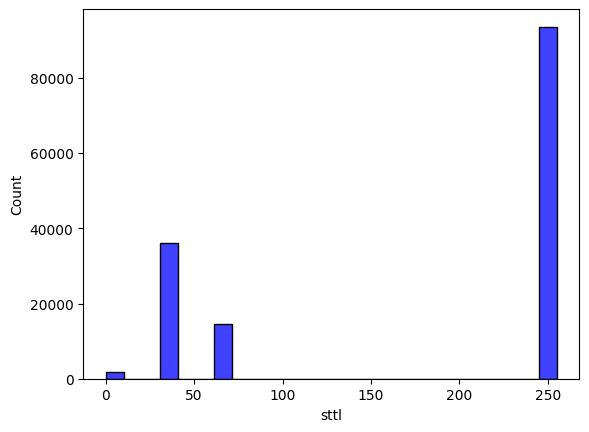

In [487]:
#did these one by one here to check Numerical data
sns.histplot(df['sttl'], bins=25, kde=False, color='blue', edgecolor='black')

#### 'sttl'

Change to string as it does not appear ordinal
sttl has strong correlation with label (attack or normal)

In [488]:
df["sttl"].value_counts()

sttl
254    93590
31     36078
62     14279
0       1690
64       121
1         52
63        31
60         6
255        3
252        2
29         2
Name: count, dtype: int64

In [489]:
df['sttl'] = df["sttl"].astype(str)
df['sttl'] = df['sttl'].str.replace('.0$', '', regex=True)

# Group by 'sttl' and calculate counts for each label
counts = df.groupby(['sttl', 'label']).size().unstack(fill_value=0)

# Rename columns for clarity
counts.columns = ['label_0', 'label_1']

# Reset index to make 'sttl' a column again
counts.reset_index(inplace=True)

print(counts)



   sttl  label_0  label_1
0              6        0
1     0     1459      231
2     1       52        0
3   252        2        0
4   254     1003    92587
5   255        2        1
6    29        2        0
7    31    36078        0
8    62       21    14258
9    63       31        0
10   64      121        0


#### 'dttl'

Change to string as it does not appear ordinal
dttl has strong correlation with label (attack or normal)

In [12]:
df["dttl"].value_counts()

dttl
0      69903
252    39225
29     36078
60       644
254        2
31         2
Name: count, dtype: int64

In [491]:
df['dttl'] = df["dttl"].astype(str)
df['dttl'] = df['dttl'].str.replace('.0$', '', regex=True)

# Group by 'dttl' and calculate counts for each label
counts = df.groupby(['dttl', 'label']).size().unstack(fill_value=0)

# Rename columns for clarity
counts.columns = ['label_0', 'label_1']

# Reset index to make 'sttl' a column again
counts.reset_index(inplace=True)

print(counts)


  dttl  label_0  label_1
0            70      574
1    0     2028    67875
2  252      597    38628
3  254        2        0
4   29    36078        0
5   31        2        0


### Individual flagged row checks

State and dwin flagged rows were "normal" so risk of removing is Low. 
is_ftp_login rows had attacks so see "Dervived Rows" for solution
st_ftp_cmd is a duplicate of is_ftp_login so see "Duplicate Columns" section for solution

In [492]:
# Check row with State as "no":
print(df[df['state'] == "no"])

#check row where dwin (binary) = non-binary values
print(df[df['dwin'] == 244])
print(df[df['dwin'] == 70])

        label attack_cat  attack_encoded  dur proto service state  spkts  \
116131      0     Normal               5  0.0  icmp       -    no      1   

        dpkts  sbytes  dbytes  rate sttl dttl  sload  dload  sloss  dloss  \
116131      0      28       0   0.0  254    0    0.0    0.0      0      0   

        sinpkt  dinpkt  sjit  djit  swin  stcpb  dtcpb  dwin  tcprtt  synack  \
116131     0.0     0.0   0.0   0.0     0      0      0     0     0.0     0.0   

        ackdat  smean  dmean  trans_depth  response_body_len  ct_srv_src  \
116131     0.0     28      0            0                  0           2   

        ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  \
116131             0           2                 2                 1   

        ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  \
116131               2             0           0                 0   

        ct_src_ltm  ct_srv_dst  is_sm_ips_ports  service_encoded  \
116131           2      

### Decision: Dropped rows!

In [493]:
df = df[df['state'] != 'no']
df = df[df['dwin'] != 244]
df = df[df['dwin'] != 70]

## Scaling & Standardisation

### Decision: Binarisation of Binary rows!
swin (0, 255), dwin (0, 255)

### swin, dwin binarization

In [494]:
df['swin'] = df['swin'].replace({255: 1})
df['dwin'] = df['dwin'].replace({255: 1})

### transdepth binarization

In [495]:
# Calculate the count of each unique value in 'trans_depth'
transdepth_counts = df['trans_depth'].value_counts()

# Convert the Series to a DataFrame for better visualization
transdepth_counts_df = transdepth_counts.reset_index()
transdepth_counts_df.columns = ['trans_depth', 'count']

# Print the DataFrame
print(transdepth_counts_df)

# Convert 'trans_depth' to integer
df['trans_depth'] = df['trans_depth'].astype(int)

# Replace values in 'trans_depth' that are not 0, 1, or 2 with 0
df['trans_depth_bin'] = np.where(df['trans_depth'].isin([0, 1]), df['trans_depth'], 0)


# Count occurrences of trans_depth values grouped by attack_cat
transdepth_counts = df.groupby('attack_cat')['trans_depth'].value_counts().unstack(fill_value=0)

# Display the result
print(transdepth_counts)

    trans_depth   count
0             0  130640
1             1   15121
2             2      80
3             4       2
4            39       2
5            80       1
6           155       1
7             3       1
8           163       1
9           172       1
10            5       1
trans_depth         0     1
attack_cat                 
Analysis         1443   557
Backdoor         1670    76
Exploits        25405  7988
Fuzzers         17176  1008
Generic         39706   294
Normal          35148  3626
Reconnaissance   9022  1469
Shellcode        1133     0
Worms              27   103


### Scale of continuious numerical attributes 
Choose to standardise all columns except objects ('proto', 'service', 'state'), binary ('swin', 'is_sm_ips_ports',  'dwin', 'is_ftp_login', 'ct_ftp_cmd', 'is_sm_ips_ports'), encoded( 'attack_encoded',
       'service_encoded', 'state_encoded'), target attributes ('attack_cat', 'label'), non-continious values (like 'sttl', 'dttl', 'trans_depth', 'ct_state_ttl', ,'ct_flw_http_mthd'), sequence numbers ('stcpb', 'dtcpb', 'rate')
       ...and any future derived columns.

In [533]:
scaler = MinMaxScaler()

to_scale = ['dur', 'spkts', 'dpkts', 'sbytes',
       'dbytes',  'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean',
       'response_body_len'
        ]


df[to_scale] = scaler.fit_transform(df[to_scale])

pd.set_option('display.max_columns', None) 
print(df.tail())

KeyError: "['dur', 'spkts', 'sbytes', 'dbytes', 'sload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'djit', 'synack', 'ackdat'] not in index"

# Data Reduction and Transformation

## Derived Attributes

### 'STCPB' & 'DTCPB' - Edit Distance
(Source and Destination TCP base sequence number are randomly generated)

In [497]:

df['edit_distance'] = df.apply(lambda row: lev.distance(str(row['stcpb']), str(row['dtcpb'])), axis=1)

# Show the DataFrame with the new column
print(df[['stcpb', 'dtcpb', 'edit_distance']].tail())

             stcpb       dtcpb  edit_distance
145849  2999602937  1857120492              9
145850  2867172519  1012940810              9
145851  3049056587  1142213436              9
145852  3929846639  1561705413             10
145853   605886437  1018502068              8


In [498]:
df_filtered = df[df['edit_distance'] != 0]

# Calculate the percentage of edit_distance < 7 for each attack_cat
percentage_under_7 = df_filtered.groupby('attack_cat')['edit_distance'].apply(lambda x: ((x < 7)).mean() * 100)

# Convert the result to a DataFrame for better visualization
percentage_df = percentage_under_7.reset_index()
percentage_df.columns = ['attack_cat', 'percentage_under_7']

# Display the percentages
print(percentage_df)

       attack_cat  percentage_under_7
0        Analysis            4.078014
1        Backdoor            3.676471
2        Exploits            4.352684
3         Fuzzers            4.030270
4         Generic            5.555556
5          Normal           26.586058
6  Reconnaissance            4.058824
7       Shellcode            6.104129
8           Worms            5.217391


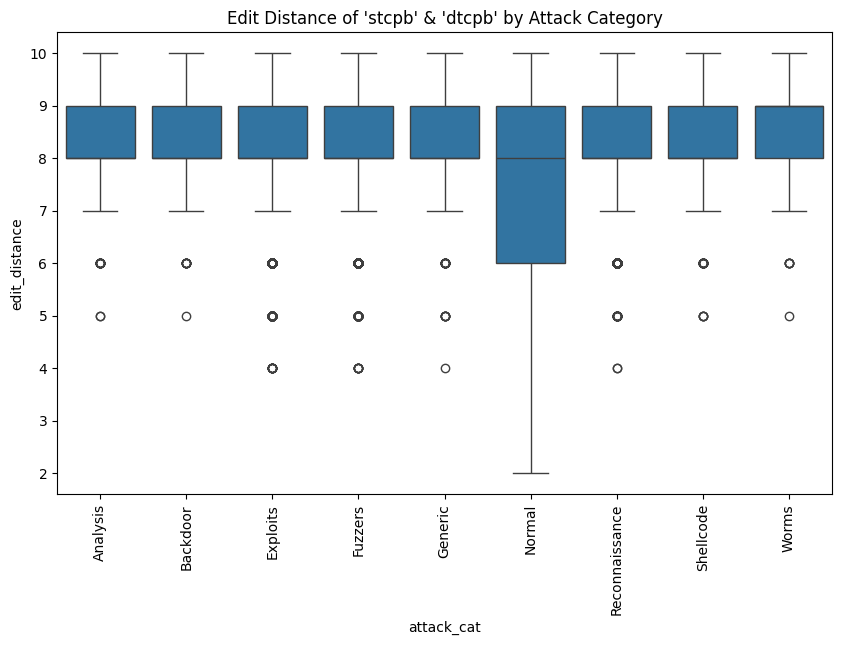

In [499]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='attack_cat', y='edit_distance', data=df_filtered)
plt.xticks(rotation=90)  # Rotate category labels if they are long
plt.title('Edit Distance of \'stcpb\' & \'dtcpb\' by Attack Category')
plt.show()

       attack_cat  percentage_zeros_stcpb
0        Analysis               71.800000
1        Backdoor               84.421535
2        Exploits               41.038541
3         Fuzzers               35.322261
4         Generic               98.785000
5          Normal               30.891835
6  Reconnaissance               51.386903
7       Shellcode               50.838482
8           Worms               11.538462


C:\Users\safja\AppData\Local\Temp\ipykernel_26296\3230061592.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='attack_cat', y='percentage_zeros_stcpb', data=percentage_df, palette='viridis')


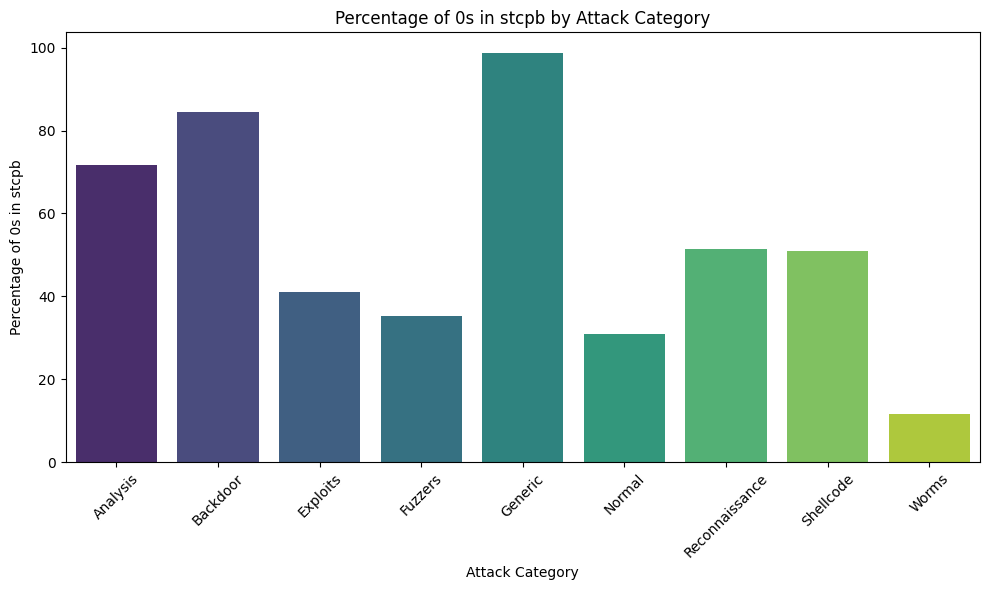

In [500]:
# Calculate the percentage of 0s in 'stcpb' for each attack_cat
percentage_zeros_stcpb = df.groupby('attack_cat')['stcpb'].apply(lambda x: (x == 0).mean() * 100)

# Convert the result to a DataFrame for better visualization
percentage_df = percentage_zeros_stcpb.reset_index()
percentage_df.columns = ['attack_cat', 'percentage_zeros_stcpb']

# Display the percentages
print(percentage_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='attack_cat', y='percentage_zeros_stcpb', data=percentage_df, palette='viridis')
plt.title('Percentage of 0s in stcpb by Attack Category')
plt.xlabel('Attack Category')
plt.ylabel('Percentage of 0s in stcpb')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [501]:
# Calculate the percentage of rows where 'stcpb' and 'dtcpb' are the same sequence but not 0. 
percentage_same = (df_filtered['stcpb'] == df_filtered['dtcpb']).mean() * 100

# Display the result
print(f'Percentage of rows where stcpb and dtcpb are the same: {percentage_same:.2f}%')

Percentage of rows where stcpb and dtcpb are the same: 0.00%


In [502]:
df = df.drop(columns=['stcpb', 'dtcpb'])

#### 'rate' - boolean

In [503]:
# Create a boolean mask for rates over 1000
rate_over_10000_mask = df['rate'] > 10000

# Calculate the percentage of each attack category with rate over 1000
percentage_over_10000 = df.groupby('attack_cat')['rate'].apply(lambda x: (rate_over_10000_mask[x.index].mean() * 100))

# Convert the result to a DataFrame for better visualization
percentage_df = percentage_over_10000.reset_index()
percentage_df.columns = ['attack_cat', 'percentage_rate_over_10000']

# Display the percentages
print(percentage_df)

       attack_cat  percentage_rate_over_10000
0        Analysis                   67.100000
1        Backdoor                   71.363116
2        Exploits                   34.686910
3         Fuzzers                   31.720194
4         Generic                   98.595000
5          Normal                    1.374632
6  Reconnaissance                   48.746545
7       Shellcode                   50.838482
8           Worms                   11.538462


In [504]:
# Create a new column that is 1 if rate is over 10000, else 0
df['rate_over_10000'] = np.where(df['rate'] > 10000, 1, 0)

### Categorical data with high correlation to attack
'state_CON', 'state_FIN', 'state_INT'

#### 'state'

In [505]:
# print(ohe_state.columns)

columns_to_add = ['state_CON', 'state_FIN', 'state_INT']

df = df.drop(columns=columns_to_add, errors='ignore')

df_stateohe = ohe_state[columns_to_add].astype(int)
df = df.drop(columns='state_encoded', errors='ignore')
df = df.drop(columns='state', errors='ignore')

df = pd.concat([df, df_stateohe], axis=1)

# df.tail(20)

#### 'proto'

In [506]:
pcolumns_to_add = ['proto_tcp', 'proto_udp', 'proto_unas', 'proto_arp']

df = df.drop(columns=pcolumns_to_add, errors='ignore')

df_protoohe = ohe_proto[pcolumns_to_add].astype(int)
df = df.drop(columns='proto', errors='ignore')

df = pd.concat([df, df_protoohe], axis=1)

# df.tail(20)

#### 'sttl'

In [507]:
# Create the 'sttl-bin' column based on the values in 'sttl'
df['sttl_bin'] = np.where(df['sttl'].isin(['0', '254', '62']), 1, 0)
df = df.drop(columns='sttl', errors='ignore')




#### 'dttl'

In [508]:
# Create the 'dttl-bin' column based on the values in 'dttl'
df['dttl_bin'] = np.where(df['dttl'].isin(['0', '252']) | df['dttl'].isna(), 1, 0)
df = df.drop(columns='dttl', errors='ignore')

#### 'service'

In [509]:
scolumns_to_add = ['service_-', 'service_dhcp', 'service_dns',
       'service_ftp', 'service_ftp-data', 'service_http', 'service_irc',
       'service_pop3', 'service_radius', 'service_smtp', 'service_snmp',
       'service_ssh', 'service_ssl']

df = df.drop(columns=scolumns_to_add, errors='ignore')
df = df.drop(columns='service_encoded', errors='ignore')
df = df.drop(columns='service', errors='ignore')

scolumns_to_keep = ['service_-', 'service_http', 'service_smtp', 'service_dns']

df_serviceohe = ohe_service[scolumns_to_keep].astype(int)

df = pd.concat([df, df_serviceohe], axis=1)

# df.tail(10)

### Numerical data 

from Correlation Heat Map:


ct_srv_dst and ct_srv_src = 0.98
ct_dst_src_ltm and ct_srv_src = 0.97
ct_src_dport_ltm and ct_dst_ltm = 0.97

synack and tcprtt = 0.96
dynack and tcprtt = 0.96


Low correlation with target attributes:
dinpkt
sjit
djit
trans_depth
response_body_length


possibly rows with > 0 are going to be a specific kind of attack compared to 0. 
if this is the case - we may be able to reduce columns down to 1 binary column of whether they > 0.  

<Axes: >

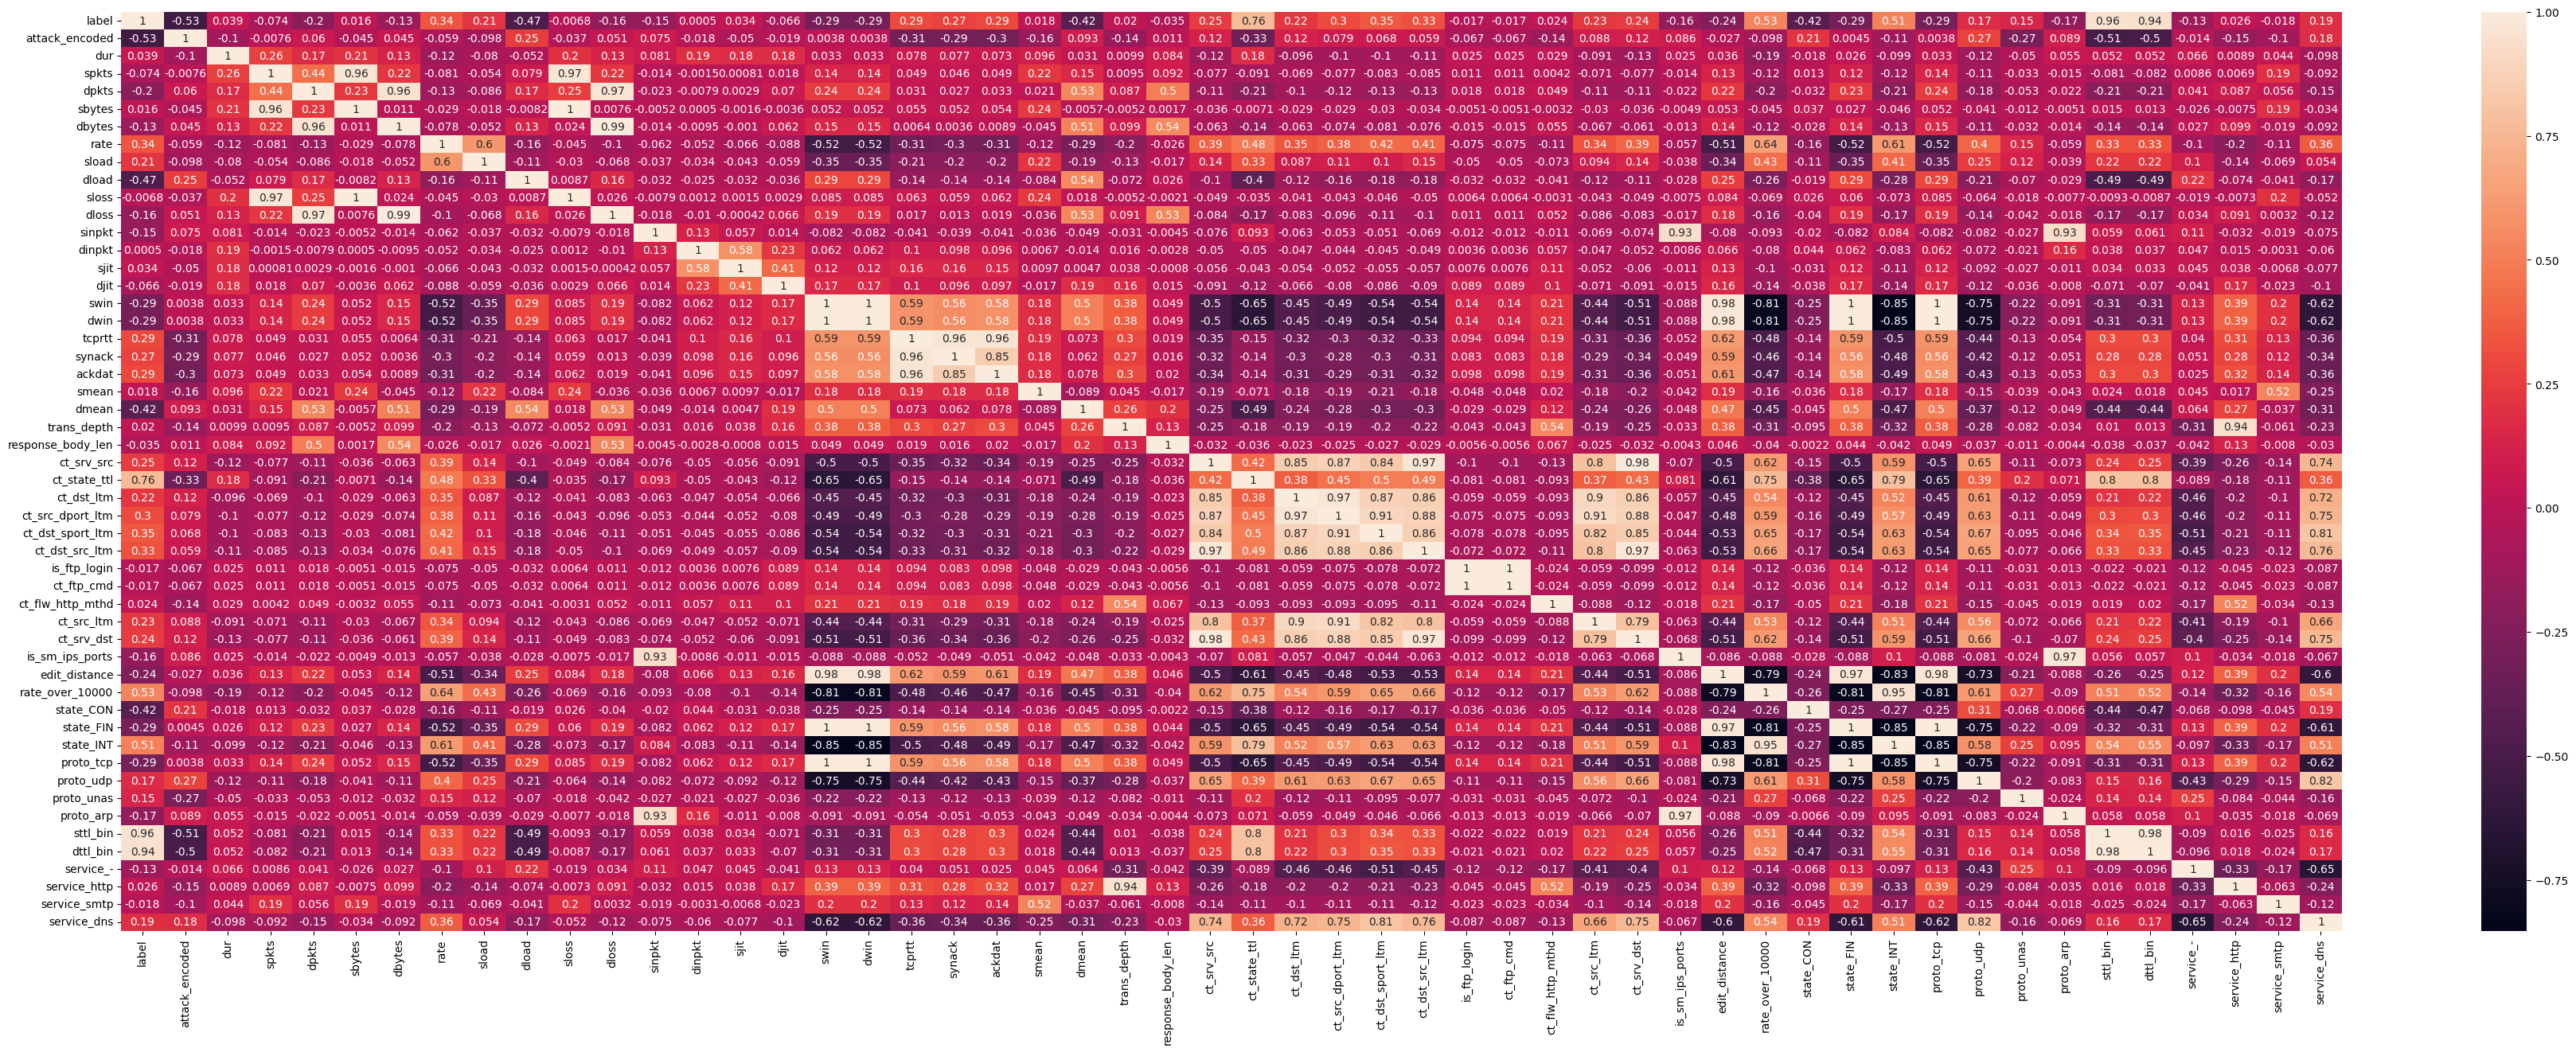

In [510]:
s=df.select_dtypes(include="number").corr()
plt.figure(figsize=(45,15))
sns.heatmap(s,annot=True)

#### 'ct...' vs attack_cat

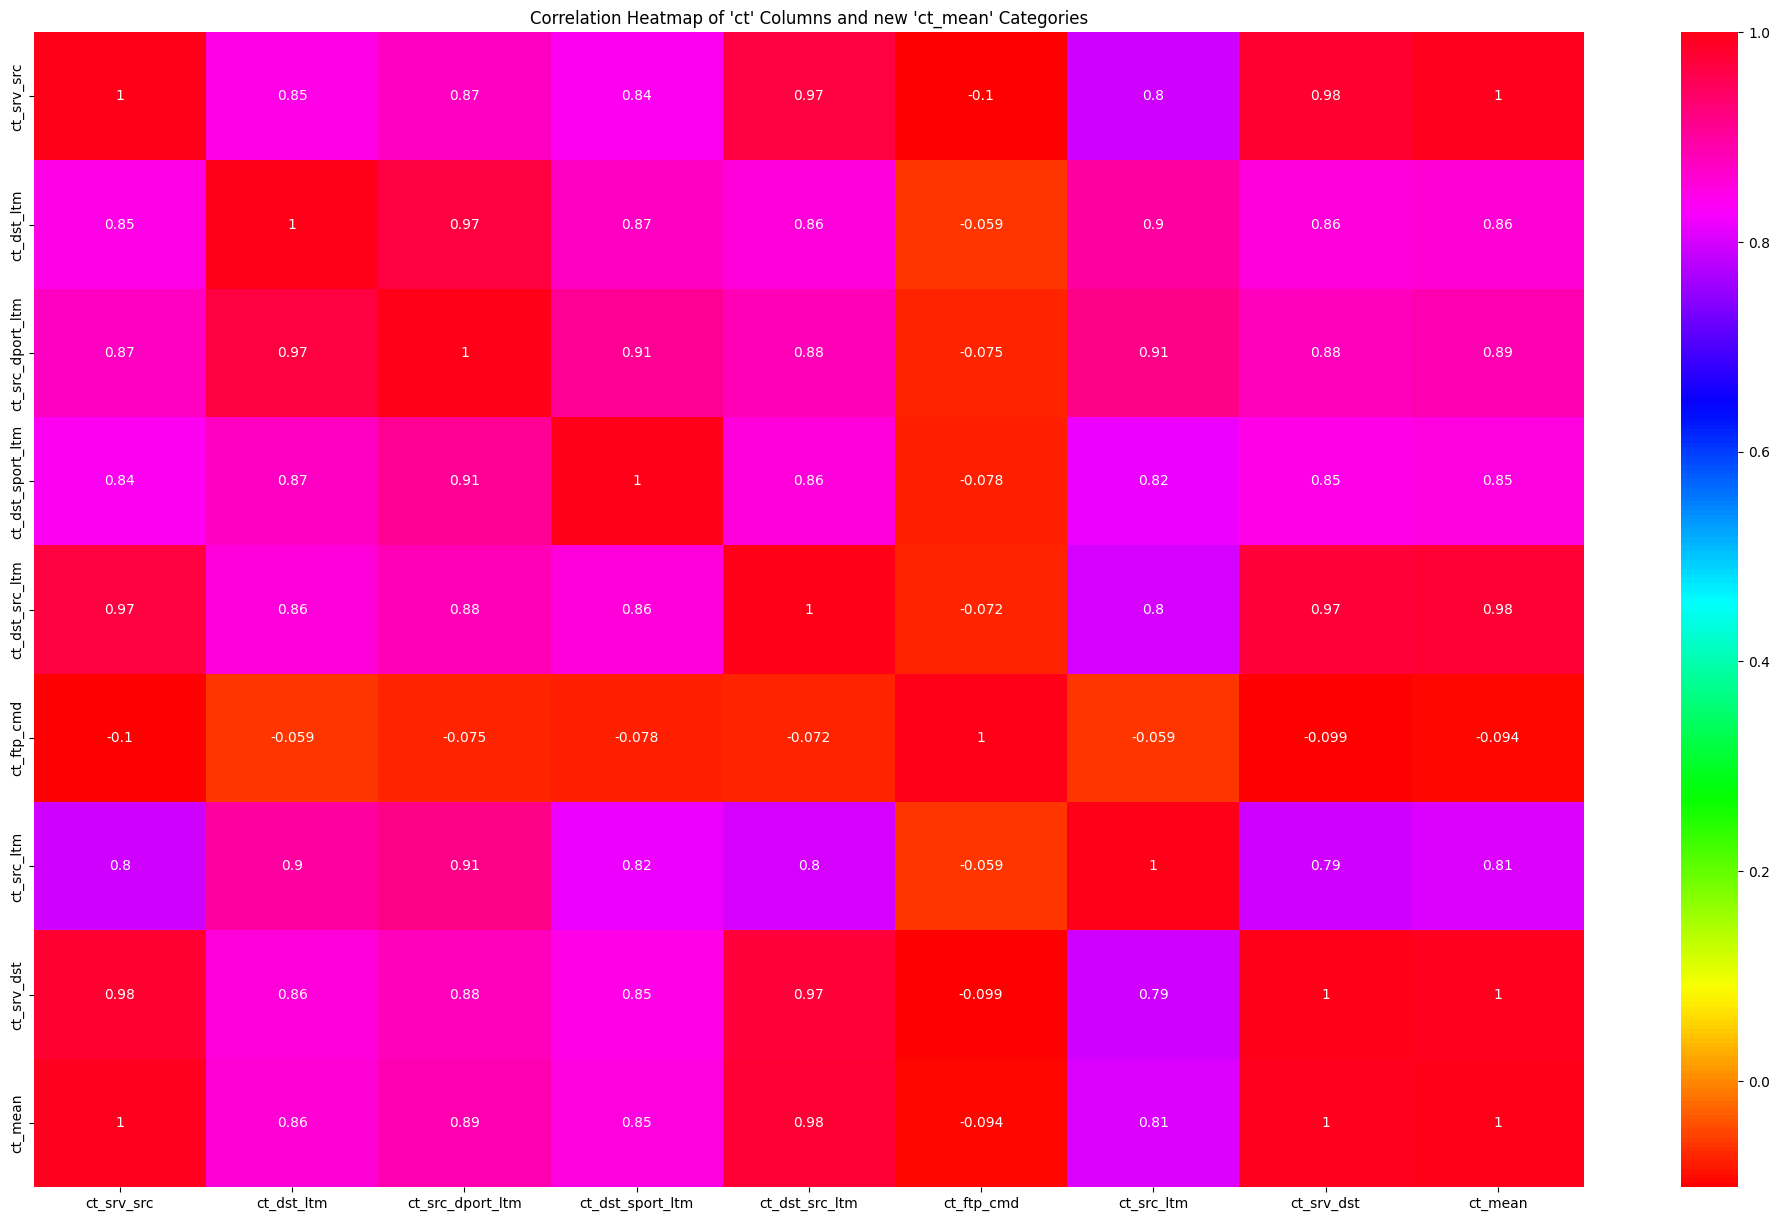

In [511]:
# Filter columns that start with 'ct'
ct_columns_df = df.filter(like='ct')

# Exclude the columns 'ct_state_ttl' and 'ct_flw_http_mthd'
ct_columns_df = ct_columns_df.drop(columns=['ct_state_ttl', 'ct_flw_http_mthd'], errors='ignore')

# Calculate the mean of 'ct' columns for each row
ct_columns_df['ct_mean'] = ct_columns_df.mean(axis=1)

# add the mean column to dataframe
df['ct_mean'] = ct_columns_df.mean(axis=1)


# Concatenate the 'ct' columns with the one-hot encoded attack categories
ct_attack = pd.concat([ct_columns_df], axis=1)

# Compute the correlation matrix
corr_with_ct_attack = ct_attack.corr()

# Plot the heatmap of correlations
plt.figure(figsize=(25, 15))
sns.heatmap(corr_with_ct_attack, annot=True, cmap='hsv')
plt.title("Correlation Heatmap of 'ct' Columns and new \'ct_mean\' Categories")
plt.show()

#### investigate response_body_length

In [512]:
# Calculate the count of each unique value in 'trans_depth'
rbl_counts = df['response_body_len'].value_counts()

# Convert the Series to a DataFrame for better visualization
rbl_counts_df = rbl_counts.reset_index()
rbl_counts_df.columns = ['response_body_len', 'count']

# Print the DataFrame
print(rbl_counts_df)

# Filter for response_body_len = 0
attack_cat_zero = df[df['response_body_len'] == 0]['attack_cat'].value_counts().reset_index()
attack_cat_zero.columns = ['attack_cat', 'count_zero']

# Filter for response_body_len > 0
attack_cat_above_zero = df[df['response_body_len'] > 0]['attack_cat'].value_counts().reset_index()
attack_cat_above_zero.columns = ['attack_cat', 'count_above_zero']

# Merge the two DataFrames on 'attack_cat'
combined_counts = pd.merge(attack_cat_zero, attack_cat_above_zero, on='attack_cat', how='outer').fillna(0)

# Print the combined DataFrame
print(combined_counts)

      response_body_len   count
0              0.000000  136676
1              0.000598    2495
2              0.000013     538
3              0.079946     339
4              0.000017     315
...                 ...     ...
2237           0.000442       1
2238           0.000126       1
2239           0.001049       1
2240           0.032805       1
2241           0.000156       1

[2242 rows x 2 columns]
       attack_cat  count_zero  count_above_zero
0        Analysis        1444             556.0
1        Backdoor        1718              28.0
2        Exploits       28618            4775.0
3         Fuzzers       18124              60.0
4         Generic       39736             264.0
5          Normal       35331            3443.0
6  Reconnaissance       10463              28.0
7       Shellcode        1133               0.0
8           Worms         109              21.0


## Feature Selection - Manual

### Empty Columns or Empty Rows (general clean)

In [513]:
df = df.dropna(how='all')
df = df.dropna(axis=1, how='all')

df.shape

df = df.dropna(subset=['attack_cat'])

df.tail()

label attack_cat  attack_encoded       dur     spkts     dpkts  \
145849    1.0      Worms             8.0  0.025316  0.000936  0.001232   
145850    1.0      Worms             8.0  0.011582  0.000936  0.000924   
145851    1.0      Worms             8.0  0.145577  0.011752  0.105636   
145852    1.0      Worms             8.0  0.010099  0.000936  0.000924   
145853    1.0      Worms             8.0  0.004311  0.000936  0.000924   

          sbytes    dbytes       rate         sload     dload     sloss  \
145849  0.000096  0.000041  11.192199  1.026468e-06  0.000073  0.000416   
145850  0.000096  0.000031  21.586305  2.239861e-06  0.000115  0.000416   
145851  0.000394  0.105808  91.476330  7.814587e-07  0.037311  0.000416   
145852  0.000097  0.000031  24.754803  2.584068e-06  0.000132  0.000416   
145853  0.000075  0.000031  57.988722  4.751692e-06  0.000309  0.000416   

           dloss    sinpkt    dinpkt      sjit      djit  swin  dwin  \
145849  0.000308  0.001905  0.003953  0.008842  0.000949   1.0   1.0   
145850  0.000308  0.000848  0.002523  0.003864  0.000784   1.0   1.0   
145851  0.105052  0.000916  0.000243  0.003085  0.005424   1.0   1.0   
145852  0.000308  0.000778  0.002072  0.002907  0.000555   1.0   1.0   
145853  0.000308  0.000318  0.000829  0.001141  0.000214   1.0   1.0   

          tcprtt    synack    ackdat     smean     dmean  trans_depth  \
145849  0.112257  0.149283  0.063720  0.069106  0.030178          1.0   
145850  0.079686  0.072530  0.057281  0.068428  0.030864          1.0   
145851  0.088983  0.152146  0.038325  0.011518  0.914266          1.0   
145852  0.095042  0.128257  0.053276  0.069106  0.030864          1.0   
145853  0.051346  0.083181  0.023776  0.050136  0.030864          1.0   

        response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  \
145849           0.000000         3.0           1.0        0.00   
145850           0.000000         1.0           1.0        0.02   
145851           0.067606         1.0           1.0        0.02   
145852           0.000000         1.0           1.0        0.04   
145853           0.000000         1.0           1.0        0.04   

        ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
145849               0.0               0.0        0.000000           0.0   
145850               0.0               0.0        0.000000           0.0   
145851               0.0               0.0        0.000000           0.0   
145852               0.0               0.0        0.109375           0.0   
145853               0.0               0.0        0.000000           0.0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
145849         0.0          0.033333    0.000000         1.0              0.0   
145850         0.0          0.033333    0.000000         1.0              0.0   
145851         0.0          0.033333    0.016949         1.0              0.0   
145852         0.0          0.033333    0.050847         1.0              0.0   
145853         0.0          0.033333    0.000000         1.0              0.0   

        edit_distance  rate_over_10000  state_CON  state_FIN  state_INT  \
145849            9.0              0.0          0          1          0   
145850            9.0              0.0          0          1          0   
145851            9.0              0.0          0          1          0   
145852           10.0              0.0          0          1          0   
145853            8.0              0.0          0          1          0   

        proto_tcp  proto_udp  proto_unas  proto_arp  sttl_bin  dttl_bin  \
145849          1          0           0          0         1         1   
145850          1          0           0          0         1         1   
145851          1          0           0          0         1         1   
145852          1          0           0          0         1         1   
145853          1          0           0          0         1      

### Check correlation between columns

without service columns to reduce size

In [514]:
df.select_dtypes(include="number").columns

Index(['label', 'attack_encoded', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes',
       'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean',
       'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'edit_distance', 'rate_over_10000',
       'state_CON', 'state_FIN', 'state_INT', 'proto_tcp', 'proto_udp',
       'proto_unas', 'proto_arp', 'sttl_bin', 'dttl_bin', 'service_-',
       'service_http', 'service_smtp', 'service_dns', 'ct_mean'],
      dtype='object')

In [515]:
s=df.select_dtypes(include="number")

scols = s.columns
nonservicecols = scols[~scols.str.startswith('service')]
s_filt = s[nonservicecols]

corrwithoutservice = s_filt.corr()

<Axes: >

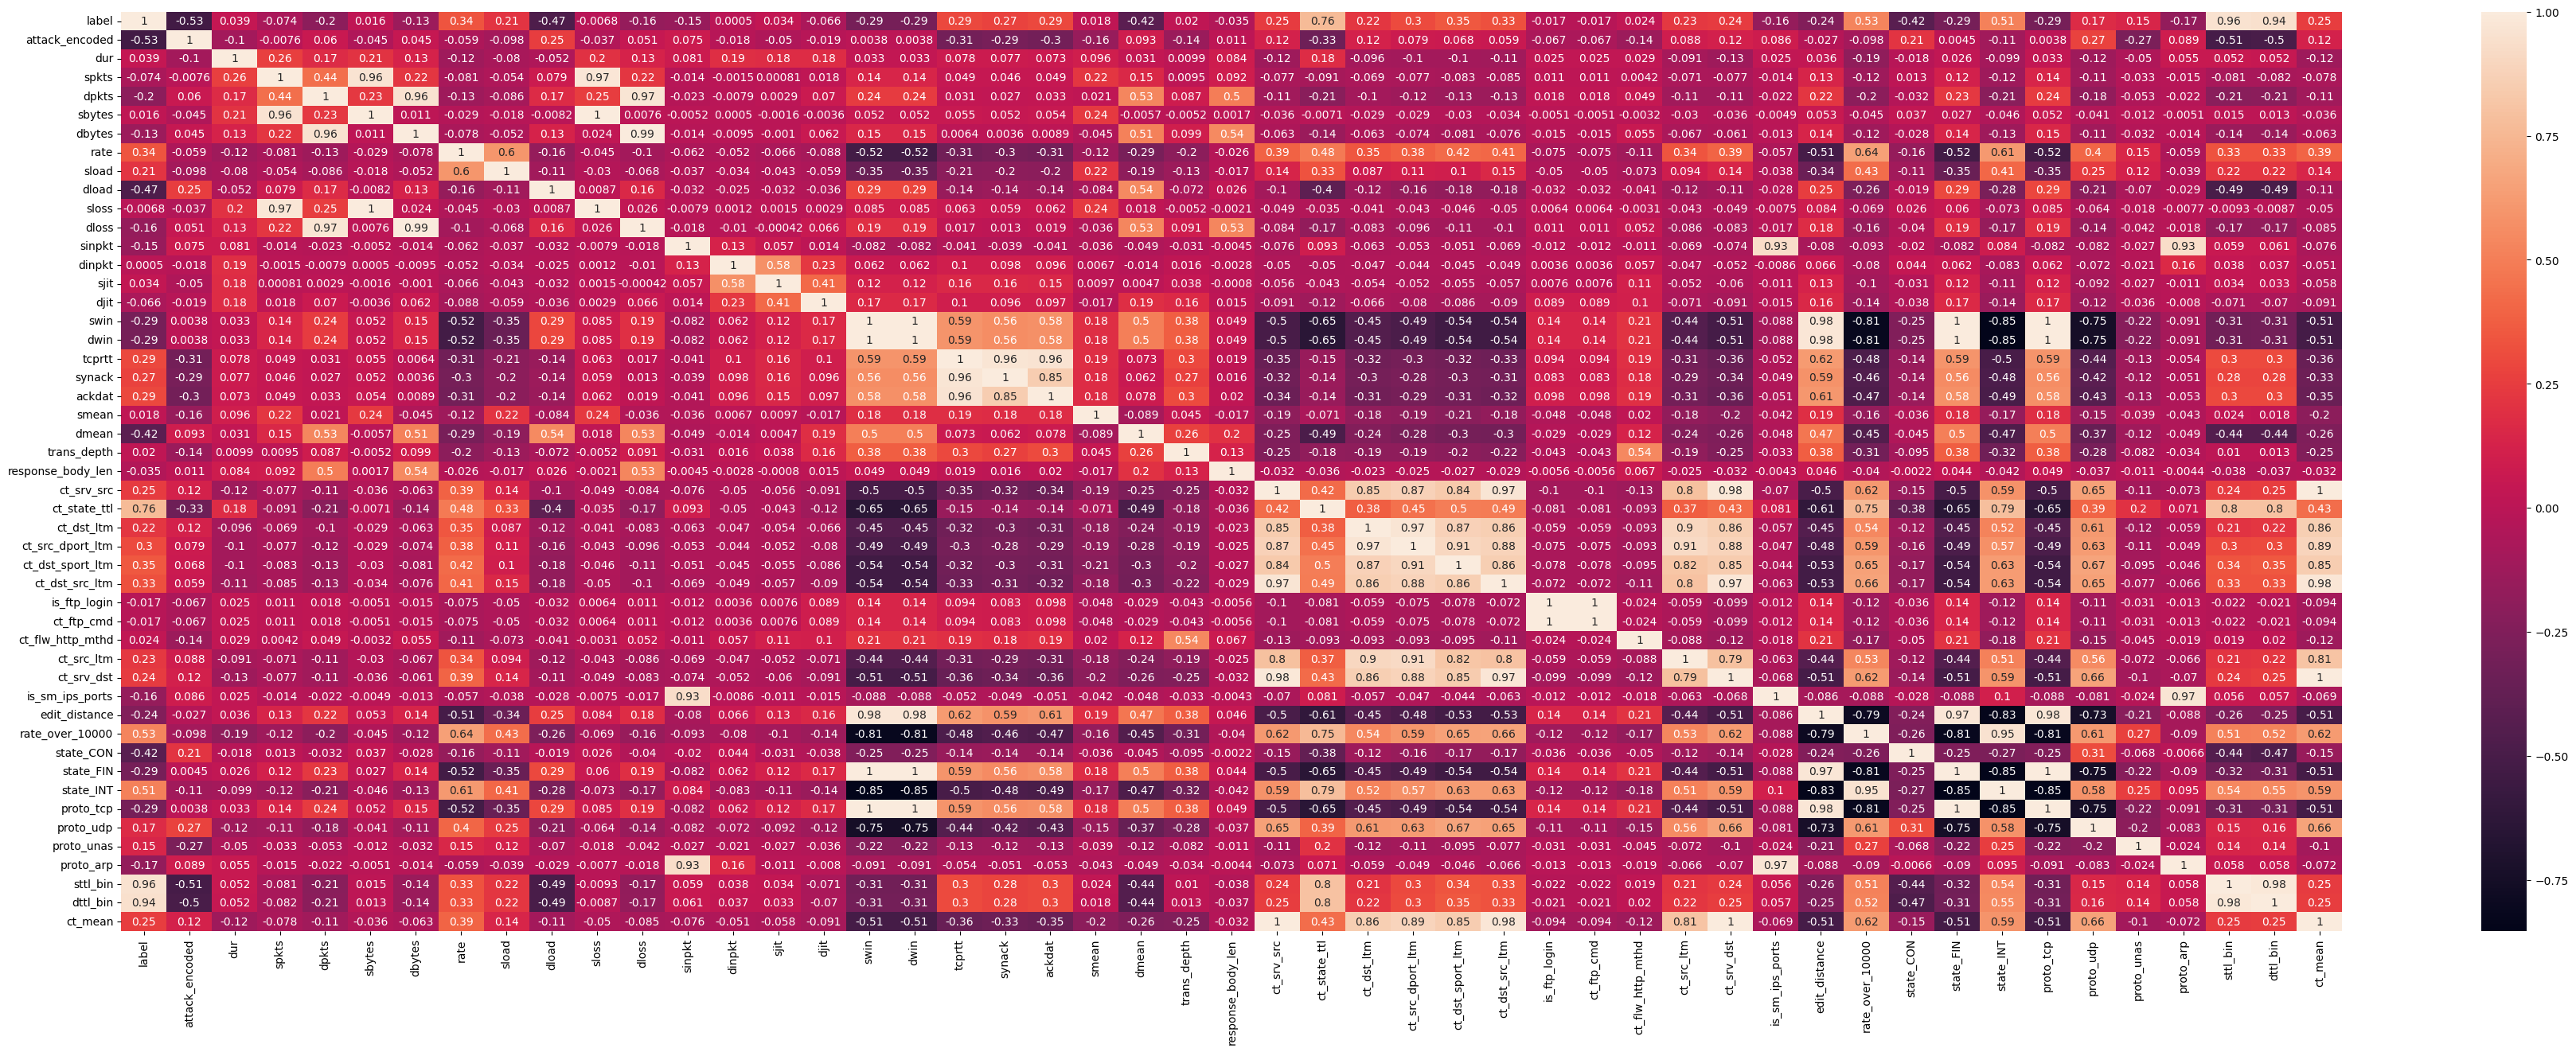

In [516]:
plt.figure(figsize=(45,15))
sns.heatmap(corrwithoutservice,annot=True)

### Duplicate Columns

In [517]:
# Count the number of 1s in the 'sttl_bin' column
count_of_ones = df['sttl_bin'].sum()

# Display the result
print(f"Number of 1s in 'sttl_bin': {count_of_ones}")

Number of 1s in 'sttl_bin': 109556


In [518]:
#Duplicate columns
def find_duplicate_columns(df):
    duplicate_columns = {}
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2 and col1 not in duplicate_columns and df[col1].equals(df[col2]):
                duplicate_columns[col1] = col2
    return duplicate_columns

# Find and print duplicate columns
duplicate_columns = find_duplicate_columns(df)
print("Duplicate columns based on content:")
for col1, col2 in duplicate_columns.items():
    print(f"Column '{col1}' is identical to column '{col2}'")

Duplicate columns based on content:
Column 'is_ftp_login' is identical to column 'ct_ftp_cmd'
Column 'ct_ftp_cmd' is identical to column 'is_ftp_login'


##### 'is_ftp_login' and 'ct_ftp_cmd'

In [519]:
#checking duplicate columns
print(df['ct_ftp_cmd'].describe())
df['is_ftp_login'].describe()

count    145851.000000
mean          0.016071
std           0.125750
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: ct_ftp_cmd, dtype: float64


count    145851.000000
mean          0.016071
std           0.125750
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_ftp_login, dtype: float64

##### 'state_FIN' and 'swin' and 'proto_tcp'

swin and proto_tcp are 100%

In [520]:
different_rows = df[df['state_FIN'] != df['swin']]

# Count the number of rows with different values
num_different_rows = len(different_rows)

print(f"Number of different rows between 'state_FIN' and 'swin': {num_different_rows}")
print(f"{num_different_rows / len(df)}")


different_rows2 = df[df['state_FIN'] != df['proto_tcp']]

# Count the number of rows with different values
num_different_rows2 = len(different_rows2)

print(f"Number of different rows between 'state_FIN' and 'proto_tcp': {num_different_rows2}")
print(f"{num_different_rows2 / len(df)}")

different_rows3 = df[df['swin'] != df['proto_tcp']]

# Count the number of rows with different values
num_different_rows3 = len(different_rows3)

print(f"Number of different rows between 'swin' and 'proto_tcp': {num_different_rows3}")
print(f"{num_different_rows3 / len(df)}")


Number of different rows between 'state_FIN' and 'swin': 180
0.0012341362074994343
Number of different rows between 'state_FIN' and 'proto_tcp': 180
0.0012341362074994343
Number of different rows between 'swin' and 'proto_tcp': 0
0.0


In [521]:
# investigate 180 rows?

In [522]:
#checking 100% correlated columns
print(df['swin'].describe())
print(df['dwin'].describe())

count    145851.000000
mean          0.447991
std           0.497289
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: swin, dtype: float64
count    145851.000000
mean          0.447978
std           0.497288
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: dwin, dtype: float64


### Manually Dropped Columns!

#### Duplicated columns 

##### removed 'ct_ftp_cmd'

In [523]:
df = df.drop(columns=["ct_ftp_cmd"]) #due to duplication with is_ftp_login

#### Remove Closely correlated columns

##### removed: dwin, dbytes, dloss, sbytes, sloss, dttl_29, proto_tcp, swin, synack, ackdat, sinpkt

In [524]:
df = df.drop(columns=["dwin"], errors='ignore') #due to duplication with edit_distance, State_FIN
df = df.drop(columns=["dbytes"], errors='ignore') #due to duplication with dpkts
df = df.drop(columns=["dloss"], errors='ignore') #due to duplication with dpkts
df = df.drop(columns=["sbytes"], errors='ignore') #due to duplication with spkts
df = df.drop(columns=["sloss"], errors='ignore') #due to duplication with spkts
df = df.drop(columns=["dttl_29"], errors='ignore') #due to duplication with sttl_31
df = df.drop(columns=["proto_tcp"], errors='ignore') #due to duplication with state_FIN
df = df.drop(columns=["swin"], errors='ignore') #due to duplication with edit_distance, State_FIN
df = df.drop(columns=["synack"], errors='ignore') #due to duplication with tcprtt
df = df.drop(columns=["ackdat"], errors='ignore') #due to duplication with tcprtt
df = df.drop(columns=["sinpkt"], errors='ignore') #due to duplication with tcprtt
df = df.drop(columns=["is_sm_ips_ports"], errors='ignore') #due to duplication with proto_arp
df = df.drop(columns=["dttl_bin"], errors='ignore') #due to duplication with proto_arp

#### Columns that have been used to derive better columns


##### removed: 'proto', 'state', 'sttl', 'state_encoded', 'service_encoded', 'service', 'stcpb', 'dtcpb', 'dttl'

In [525]:
df = df.drop(columns=["proto"], errors='ignore') #due to deriving proto_tcp, proto_udp, proto_unas, proto_arp
df = df.drop(columns=["state"], errors='ignore') #due to deriving state_...
df = df.drop(columns=["sttl"], errors='ignore') #due to deriving sttl_...
df = df.drop(columns=["state_encoded"], errors='ignore') #due to state_...
df = df.drop(columns=["service_encoded"], errors='ignore') #due to service_...
df = df.drop(columns=["service"], errors='ignore') #due to service_....
df = df.drop(columns=["stcpb"], errors='ignore') #due to deriving edit_distance
df = df.drop(columns=["dtcpb"], errors='ignore') #due to deriving edit_distance
df = df.drop(columns=["dttl"], errors='ignore') #due to dttl_...
df = df.drop(columns=["rate"], errors='ignore') #due to rate_over_10000...

df = df.drop(columns=["ct_srv_src"], errors='ignore') #due to ct_mean
df = df.drop(columns=["ct_dst_ltm"], errors='ignore') #due to ct_mean
df = df.drop(columns=["ct_src_dport_ltm"], errors='ignore') #due to ct_mean
df = df.drop(columns=["ct_dst_sport_ltm"], errors='ignore') #due to ct_mean
df = df.drop(columns=["ct_dst_src_ltm"], errors='ignore') #due to ct_mean
df = df.drop(columns=["ct_src_ltm"], errors='ignore') #due to ct_mean
df = df.drop(columns=["ct_srv_dst"], errors='ignore') #due to ct_mean


#### Useless columns

##### removed: 'proto_arp', 'dur', 'spkts', 'dinpkt', 'djit', 'sload', 'service_smtp'

In [526]:
df = df.drop(columns=["proto_arp"], errors='ignore') #due to not being associated with attack_cat
df = df.drop(columns=["dur"], errors='ignore') #due to not being associated with attack_cat
df = df.drop(columns=["spkts"], errors='ignore') #due to not being associated with attack_cat
df = df.drop(columns=["dinpkt"], errors='ignore') #due to not being associated with attack_cat
df = df.drop(columns=["djit"], errors='ignore') #due to not being associated with attack_cat
df = df.drop(columns=["sload"], errors='ignore') #due to not being associated with attack_cat
df = df.drop(columns=["service_smtp"], errors='ignore') #due to not being associated with attack_cat

df = df.drop(columns=["attack_encoded"], errors='ignore')

## Data Balancing

SMOTE Undersample and Oversample - 1250. 

In [527]:
# Separate features and target variable
X = df.drop(columns=['attack_cat'])  # Features
y = df['attack_cat']  # Target variable

# Count the number of samples in each class
class_counts = y.value_counts()

# Determine the target size for each class (for example, the count of the majority class)
target_size = 1250  # or set a specific number like 1000

# Initialize the SMOTE and RandomUnderSampler
smote = SMOTE(random_state=42, sampling_strategy={k: target_size for k in y.value_counts().index if y.value_counts()[k] < target_size})
undersampler = RandomUnderSampler(sampling_strategy={k: target_size for k in class_counts.index if class_counts[k] > target_size}, random_state=42)

# Apply SMOTE to the minority classes
X_oversampled, y_oversampled = smote.fit_resample(X, y)

# Now apply undersampling to the combined oversampled data
X_balanced, y_balanced = undersampler.fit_resample(X_oversampled, y_oversampled)

# Combine the features and target variable back into a DataFrame
df_balanced = pd.concat([X_balanced, y_balanced], axis=1)

# Show the resulting DataFrame
print(df_balanced['attack_cat'].value_counts())
df_balanced.tail()

attack_cat
Analysis          1250
Backdoor          1250
Exploits          1250
Fuzzers           1250
Generic           1250
Normal            1250
Reconnaissance    1250
Shellcode         1250
Worms             1250
Name: count, dtype: int64


label     dpkts     dload      sjit    tcprtt     smean     dmean  \
147083    1.0  0.000000  0.000000  0.000000  0.000000  0.012195  0.000000   
147084    1.0  0.001103  0.000134  0.003841  0.136001  0.068602  0.030466   
147085    1.0  0.056976  0.033113  0.003185  0.094566  0.014051  0.894376   
147086    1.0  0.000924  0.000344  0.001232  0.020134  0.069601  0.030864   
147087    1.0  0.000930  0.000251  0.001379  0.060885  0.075315  0.030851   

        trans_depth  response_body_len  ct_state_ttl  is_ftp_login  \
147083     0.000000           0.000000           2.0           0.0   
147084     0.418793           0.000000           1.0           0.0   
147085     1.000000           0.035601           1.0           0.0   
147086     1.000000           0.000000           1.0           0.0   
147087     1.000000           0.000000           1.0           0.0   

        ct_flw_http_mthd  edit_distance  rate_over_10000  state_CON  \
147083          0.000000            0.0              1.0          0   
147084          0.013960            8.0              0.0          0   
147085          0.033333            8.0              0.0          0   
147086          0.033333            9.0              0.0          0   
147087          0.033333            8.0              0.0          0   

        state_FIN  state_INT  proto_udp  proto_unas  sttl_bin  service_-  \
147083          0          1          1           0         1          1   
147084          1          0          0           0         1          0   
147085          1          0          0           0         1          0   
147086          1          0          0           0         1          0   
147087          1          0          0           0         1          0   

        service_http  service_dns   ct_mean attack_cat  
147083             0            0  0.256643      Worms  
147084             1            0  0.681669      Worms  
147085             1            0  0.342480      Worms  
147086             1            0  0.250000      Worms  
147087             1            0  0.252079      Worms

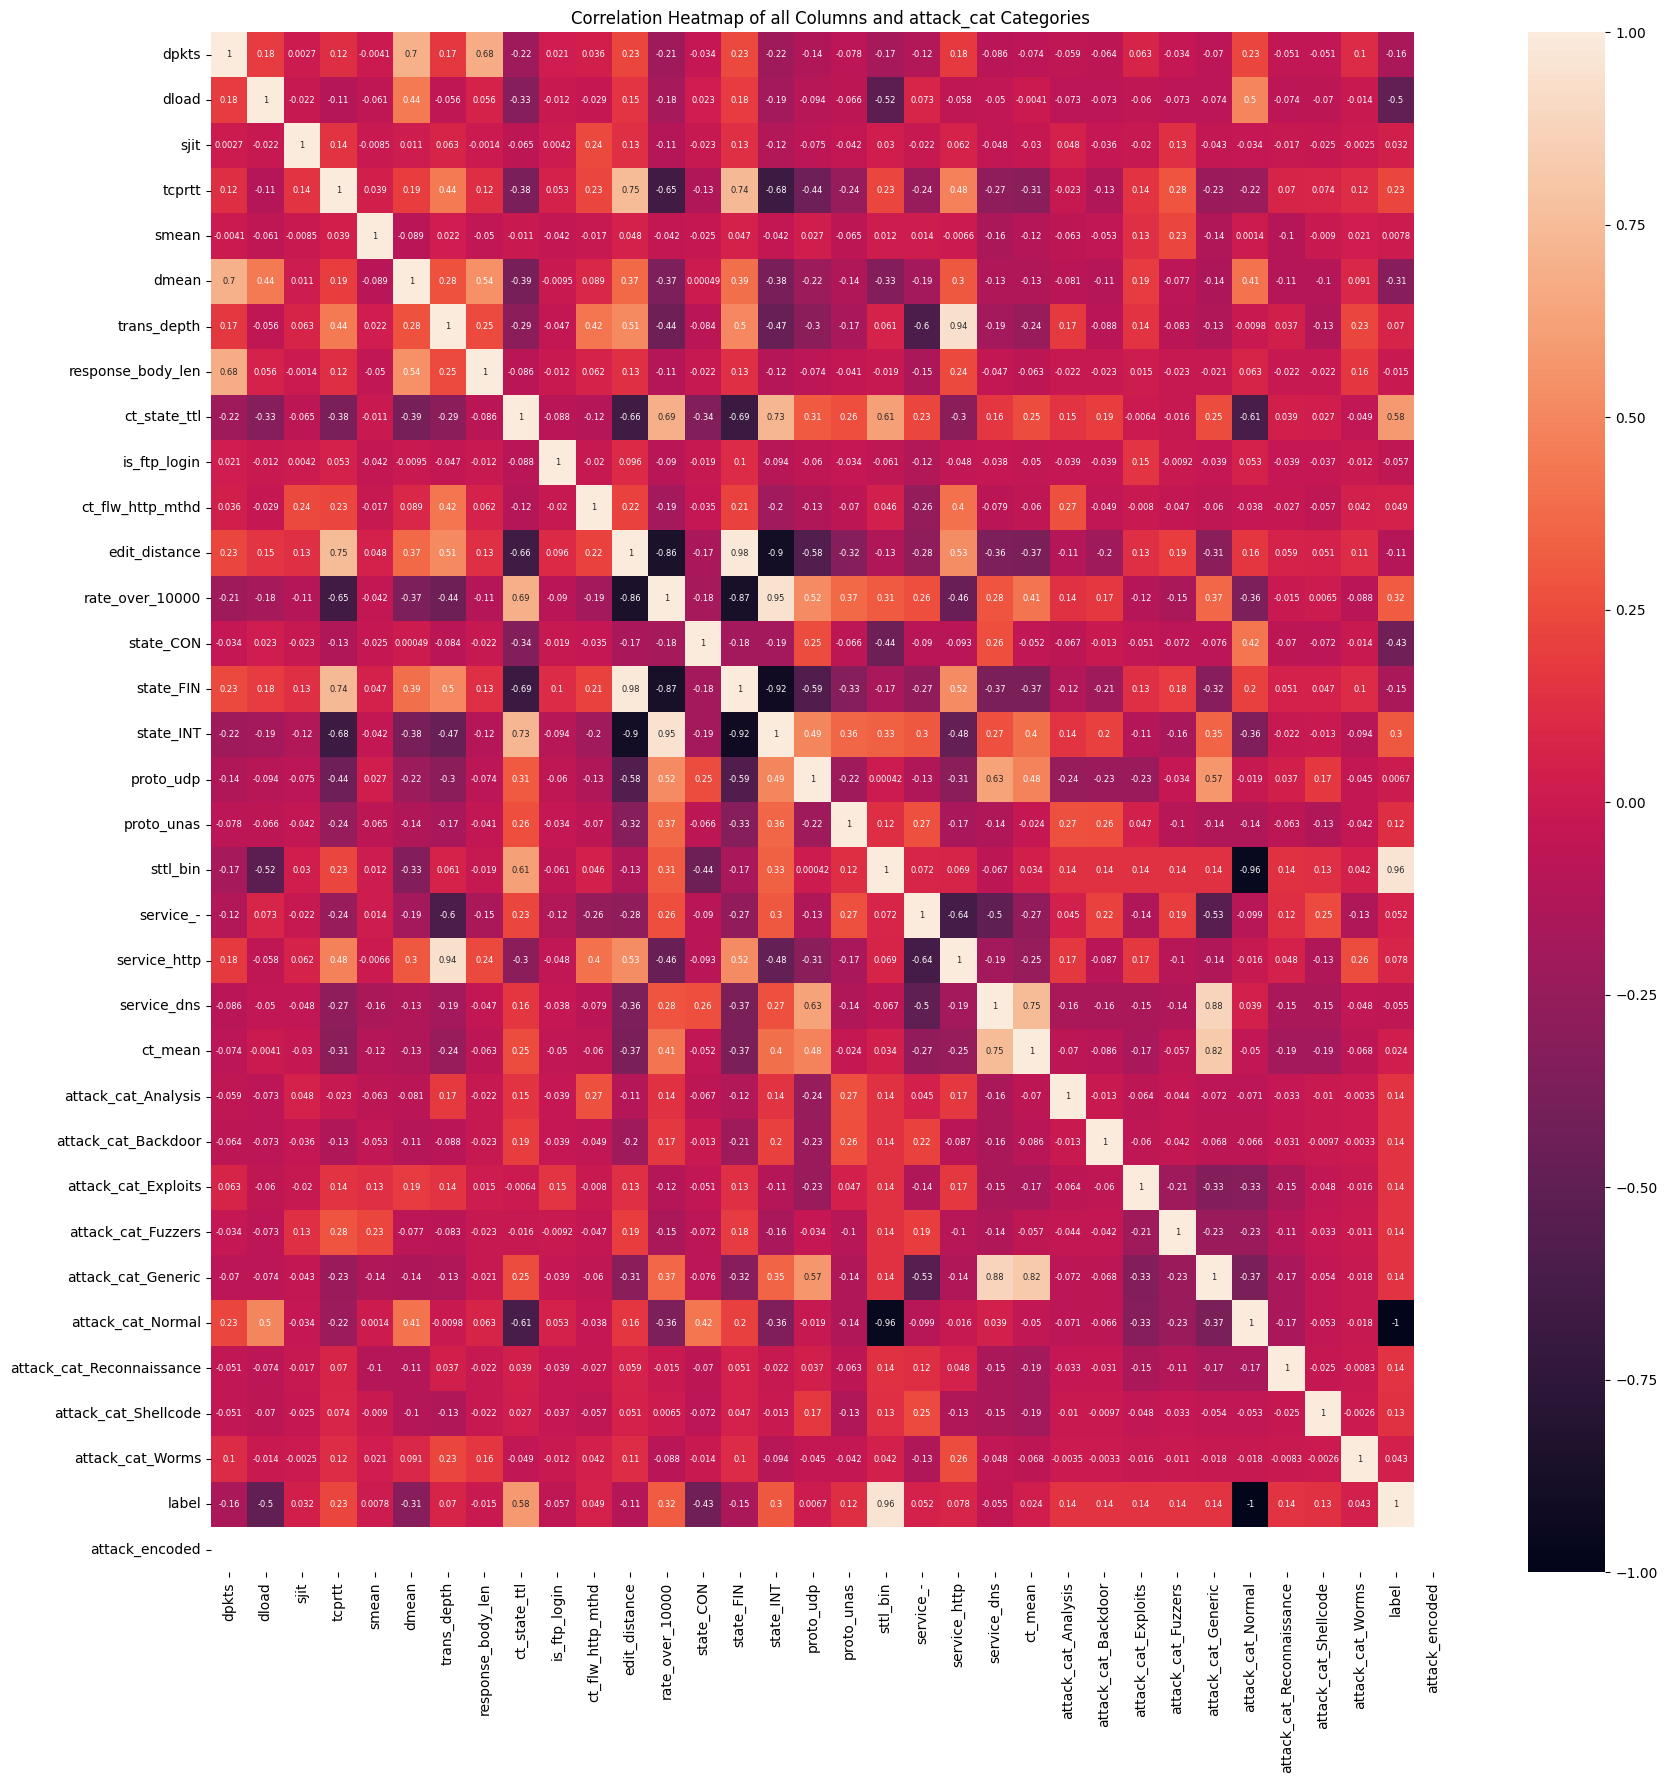

In [528]:
df_encoded=df_balanced.select_dtypes(include="number")


# Concatenate the 'ct' columns with the one-hot encoded attack categories
df_attack = pd.concat([df_encoded, df_attackohe], axis=1)

# Compute the correlation matrix
corr_with_attack = df_attack.corr()

# Convert the correlation matrix to a DataFrame
corr_df = pd.DataFrame(corr_with_attack)

# Move 'label' and 'attack_encoded' to the bottom
cols_to_move = ['label', 'attack_encoded']
new_order = [col for col in corr_df.columns if col not in cols_to_move] + cols_to_move

# Reindex the DataFrame
corr_df = corr_df.reindex(index=new_order, columns=new_order)

# Plot the heatmap of correlations
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df, annot=True, annot_kws={"size": 6})
plt.title("Correlation Heatmap of all Columns and attack_cat Categories")
plt.show()

In [529]:
cols = ['attack_cat'] + [col for col in df_balanced.columns if col != 'attack_cat']
df_balanced = df_balanced[cols]
df.shape
df_balanced.shape


(11250, 25)

## Feature Selection - Algorithms

In [530]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11250 entries, 1860 to 147087
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   attack_cat         11250 non-null  object 
 1   label              11250 non-null  float64
 2   dpkts              11250 non-null  float64
 3   dload              11250 non-null  float64
 4   sjit               11250 non-null  float64
 5   tcprtt             11250 non-null  float64
 6   smean              11250 non-null  float64
 7   dmean              11250 non-null  float64
 8   trans_depth        11250 non-null  float64
 9   response_body_len  11250 non-null  float64
 10  ct_state_ttl       11250 non-null  float64
 11  is_ftp_login       11250 non-null  float64
 12  ct_flw_http_mthd   11250 non-null  float64
 13  edit_distance      11250 non-null  float64
 14  rate_over_10000    11250 non-null  float64
 15  state_CON          11250 non-null  int32  
 16  state_FIN          1125

# Normal vs Fuzzers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for plotting

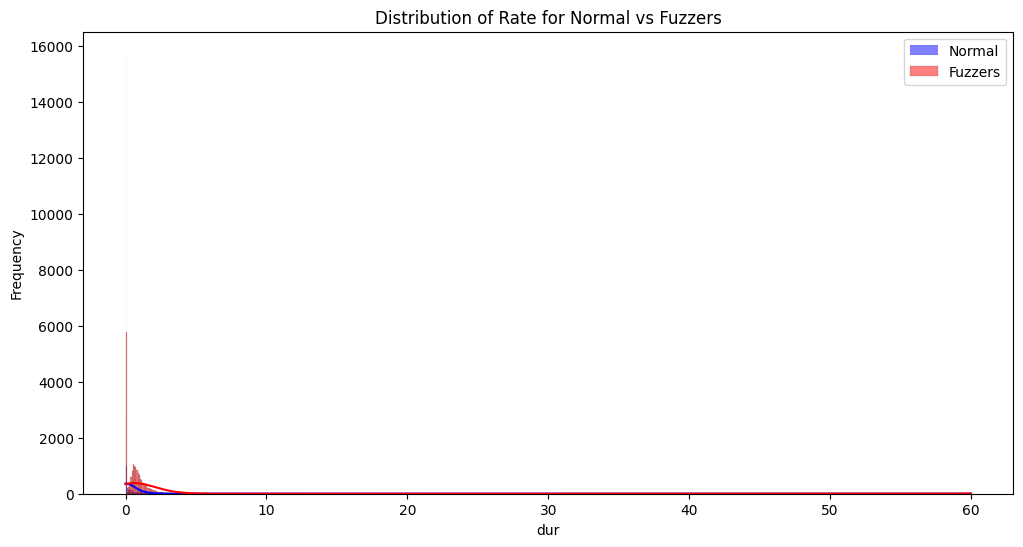

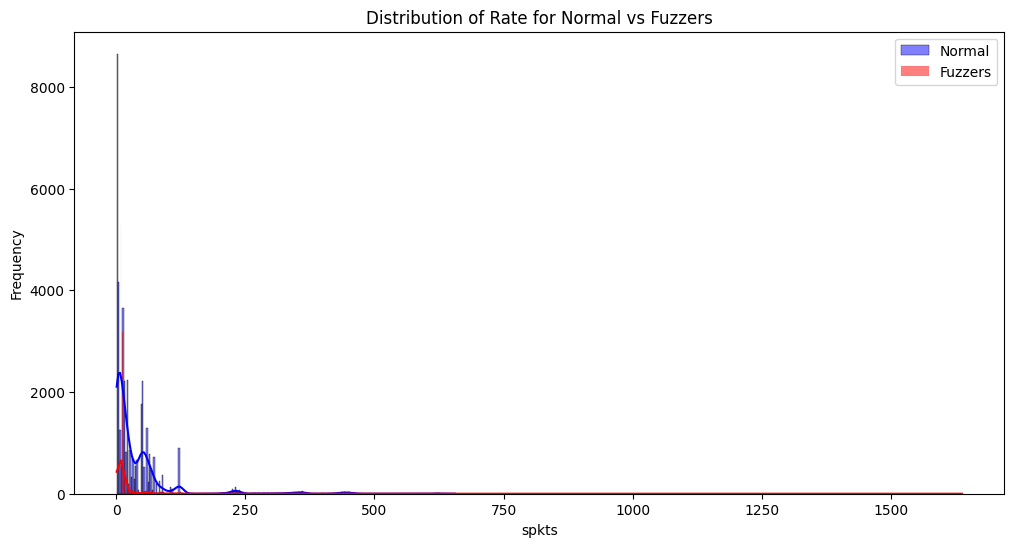

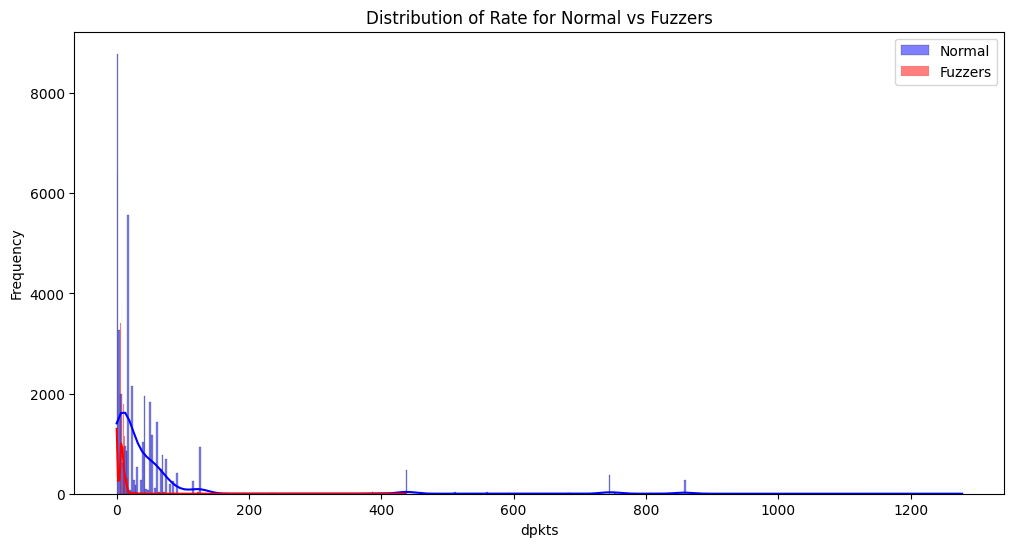

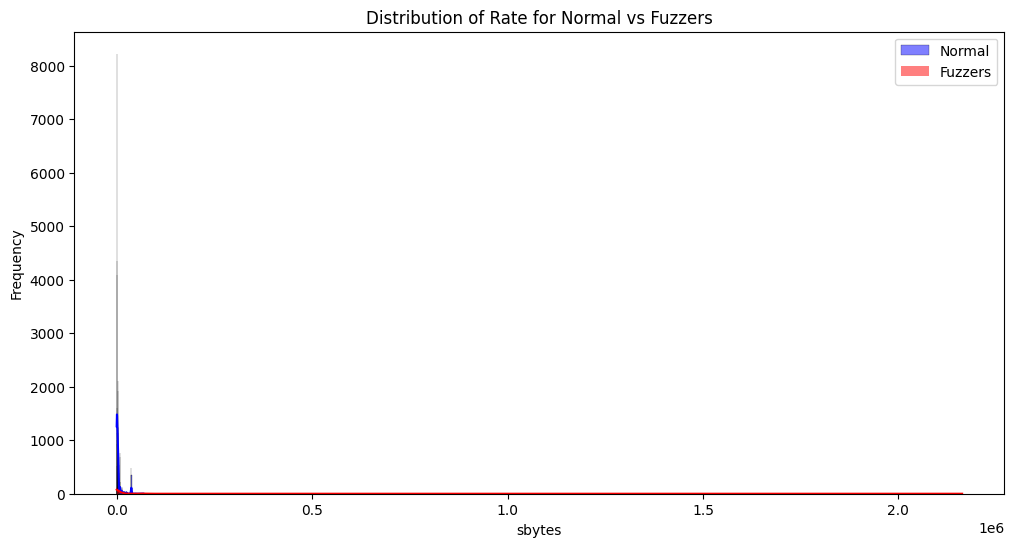

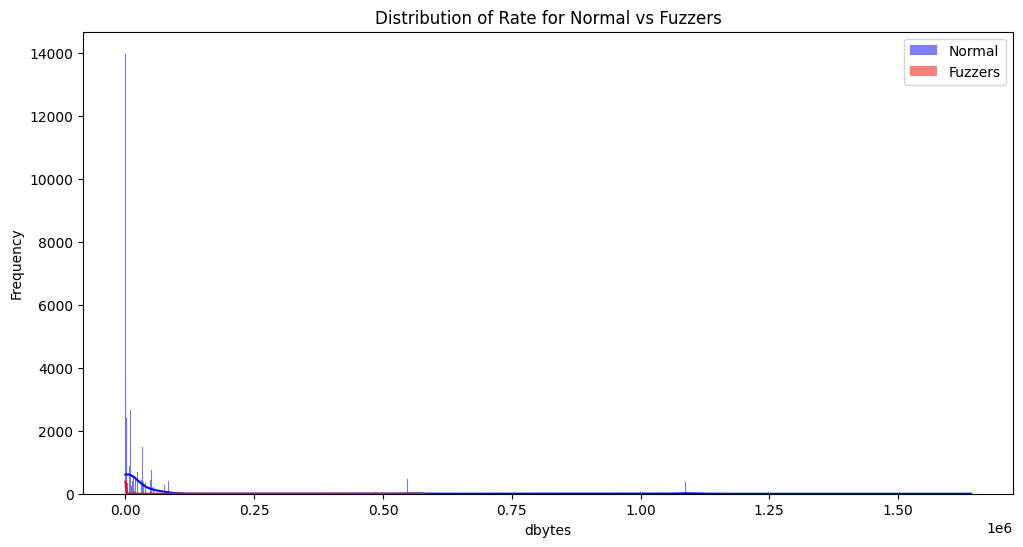

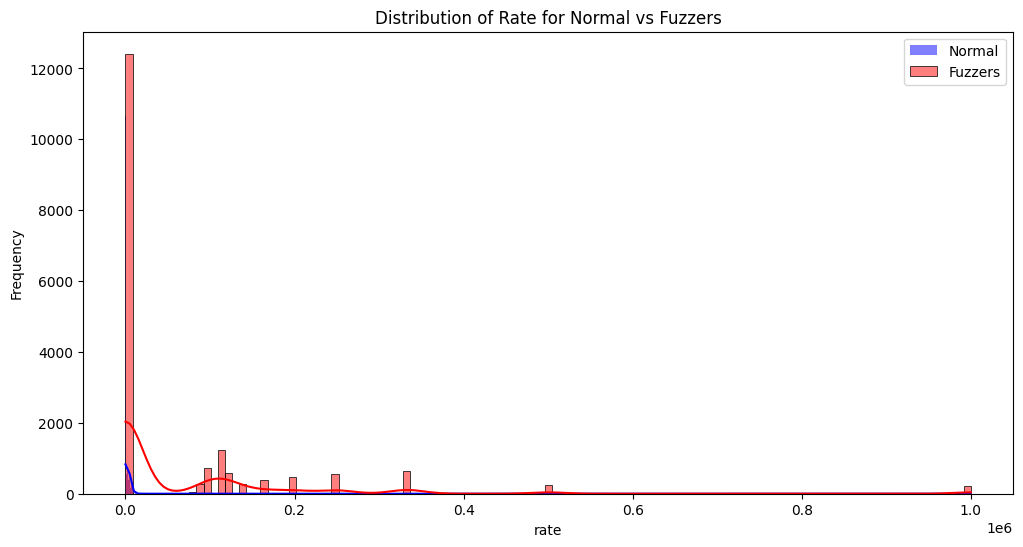

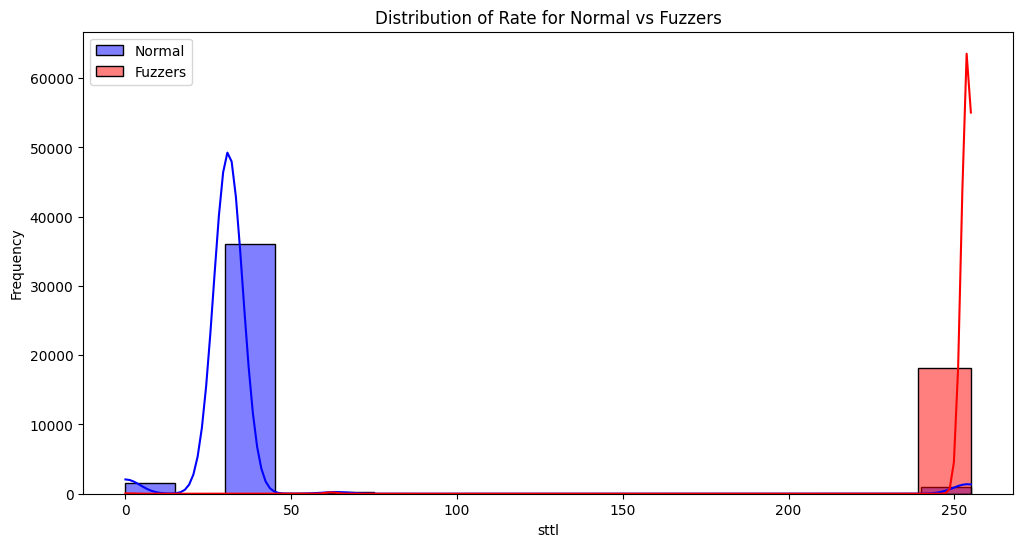

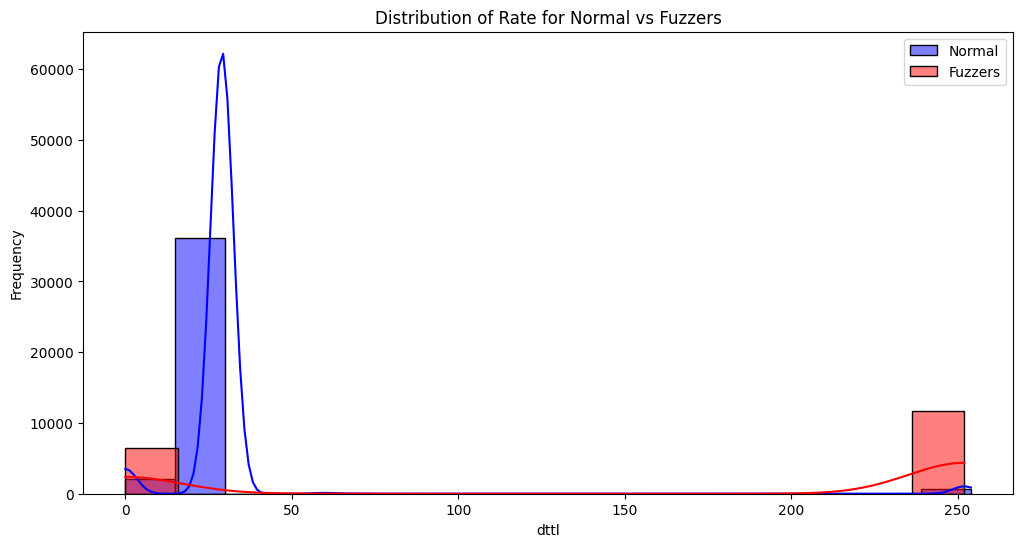

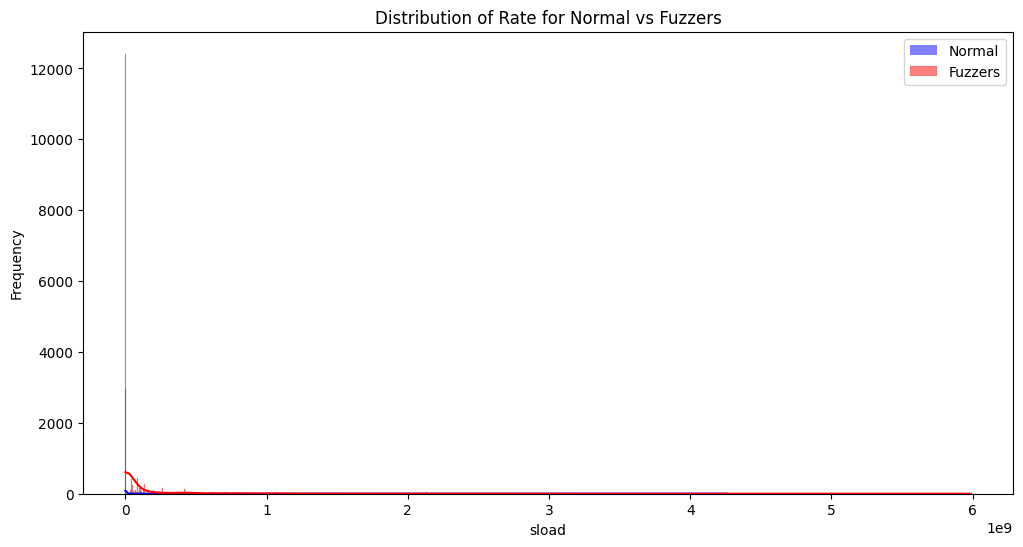

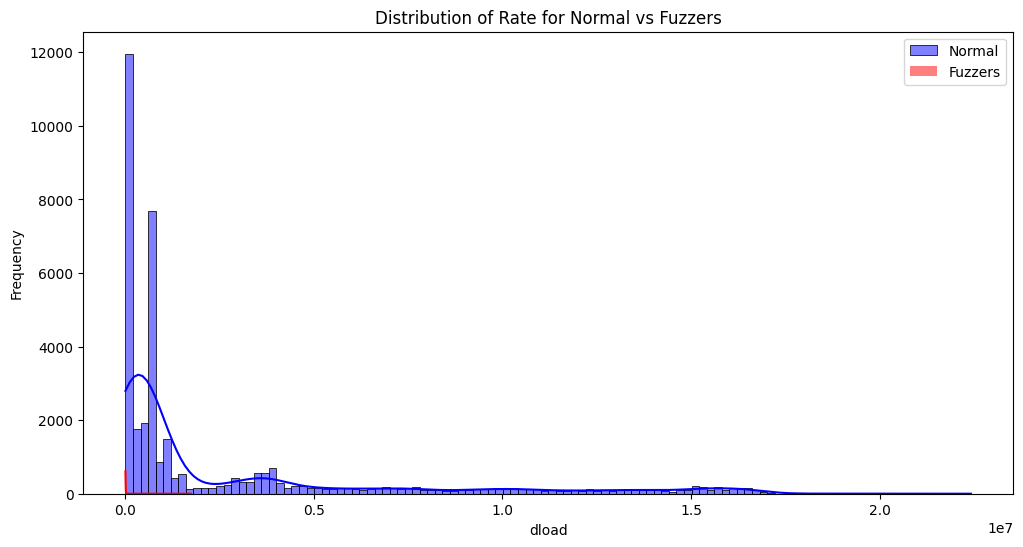

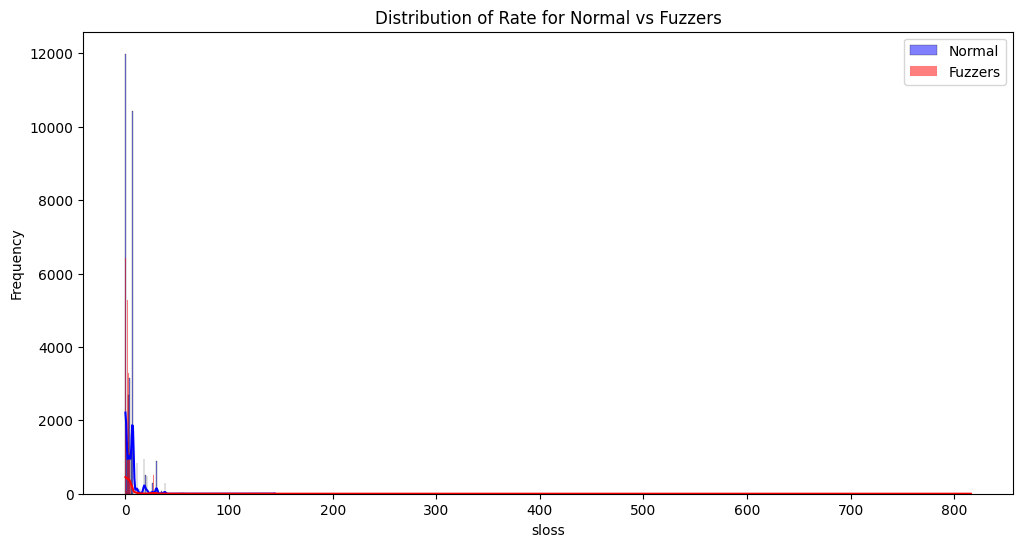

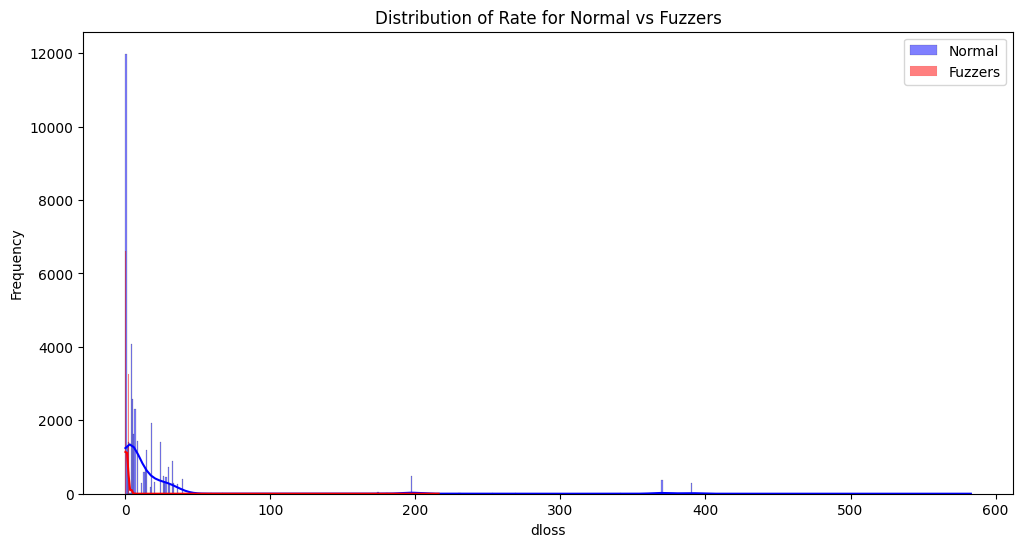

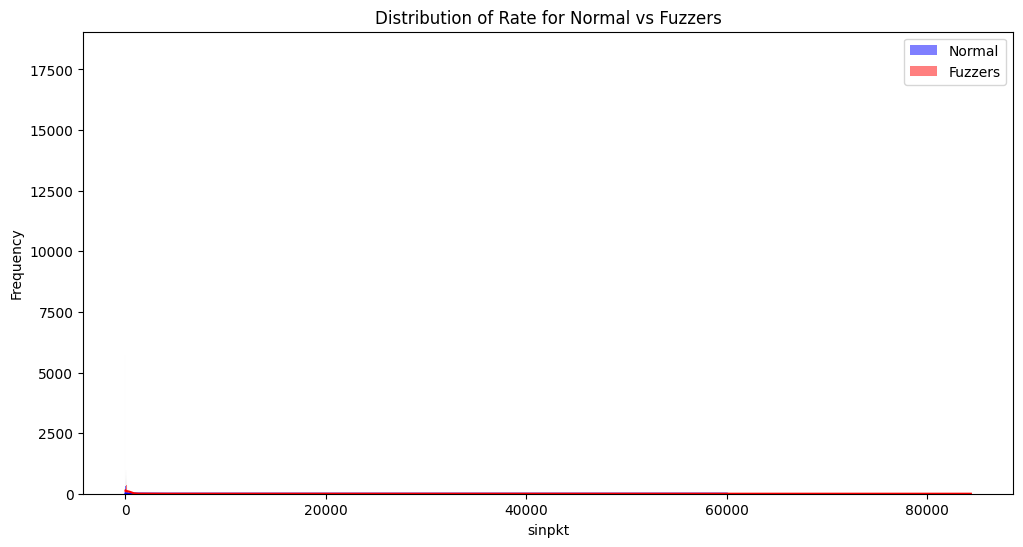

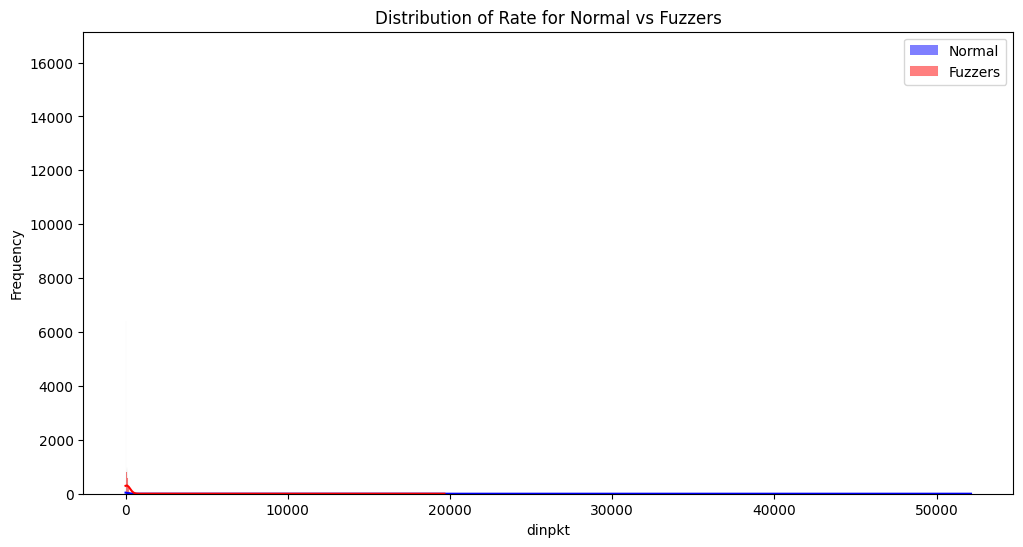

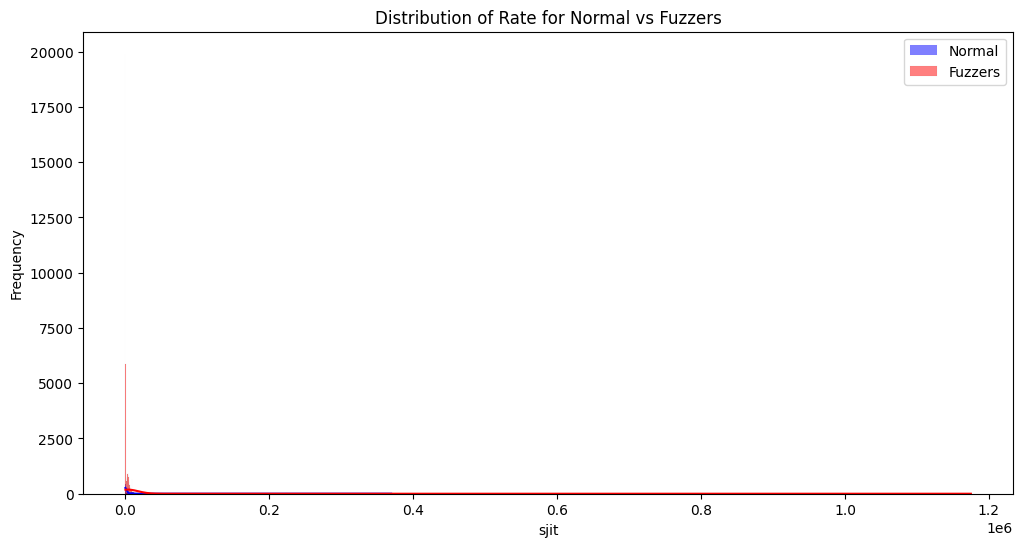

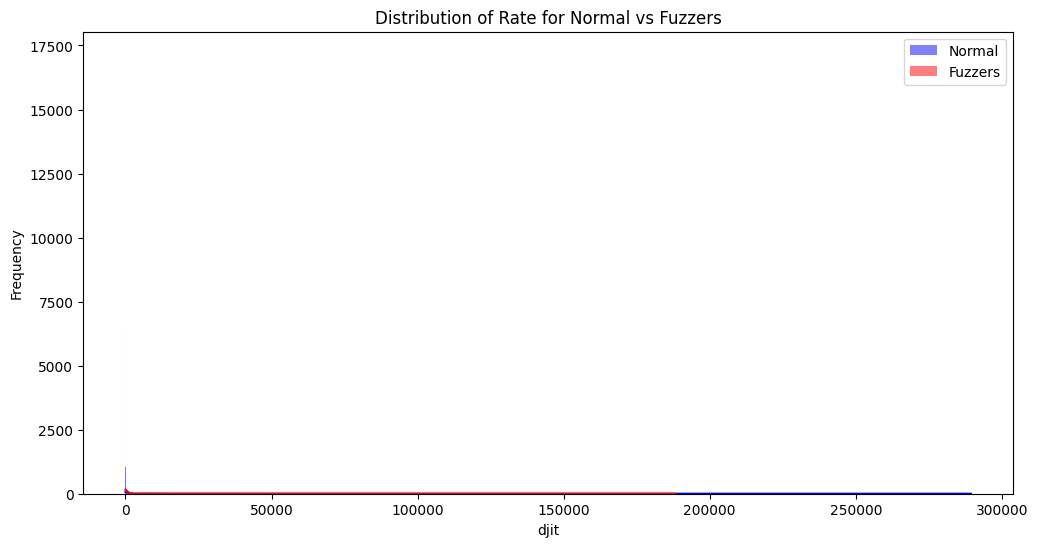

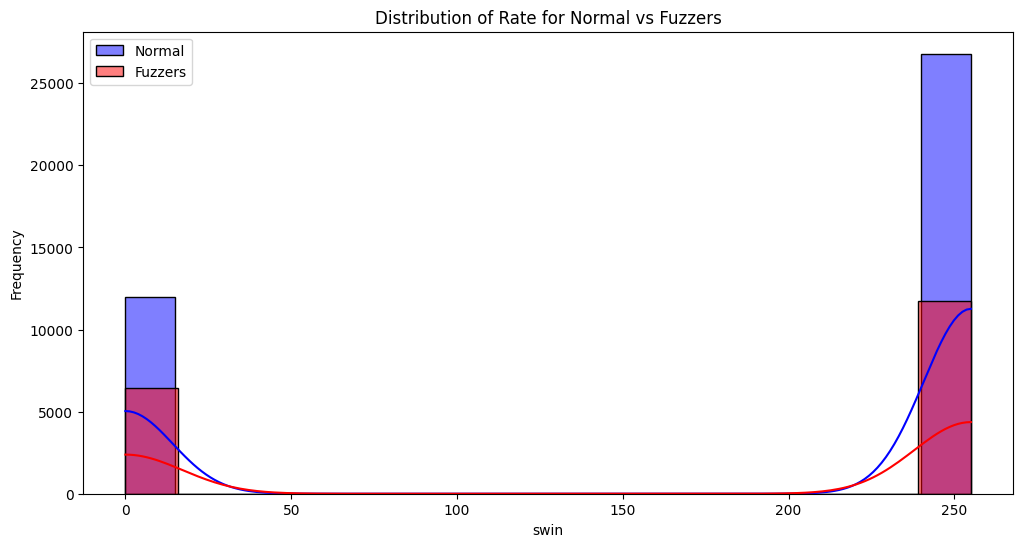

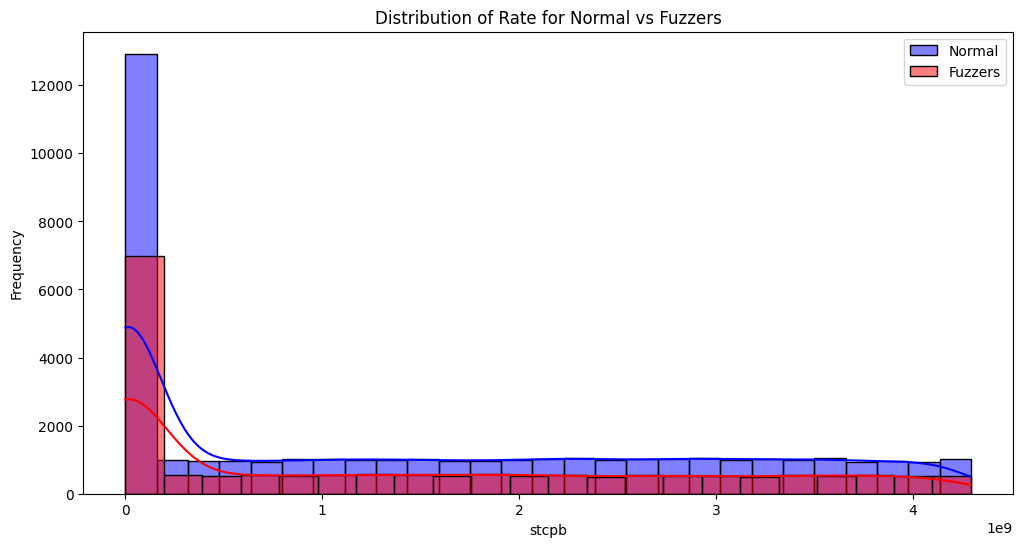

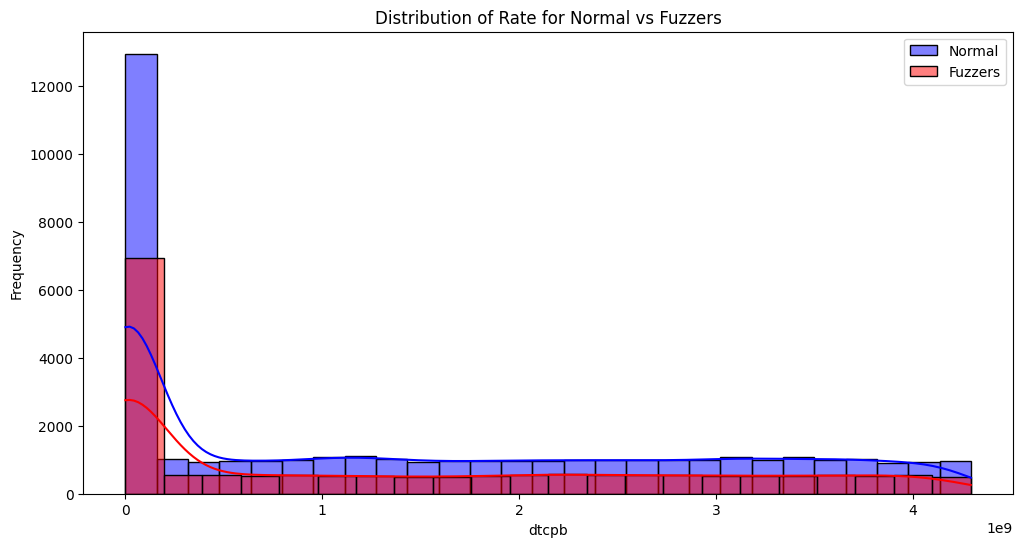

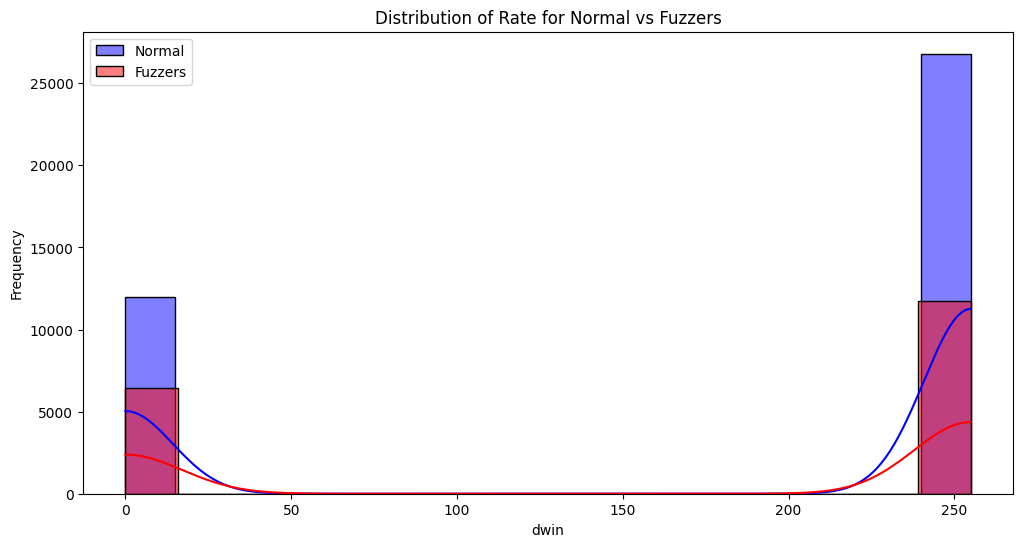

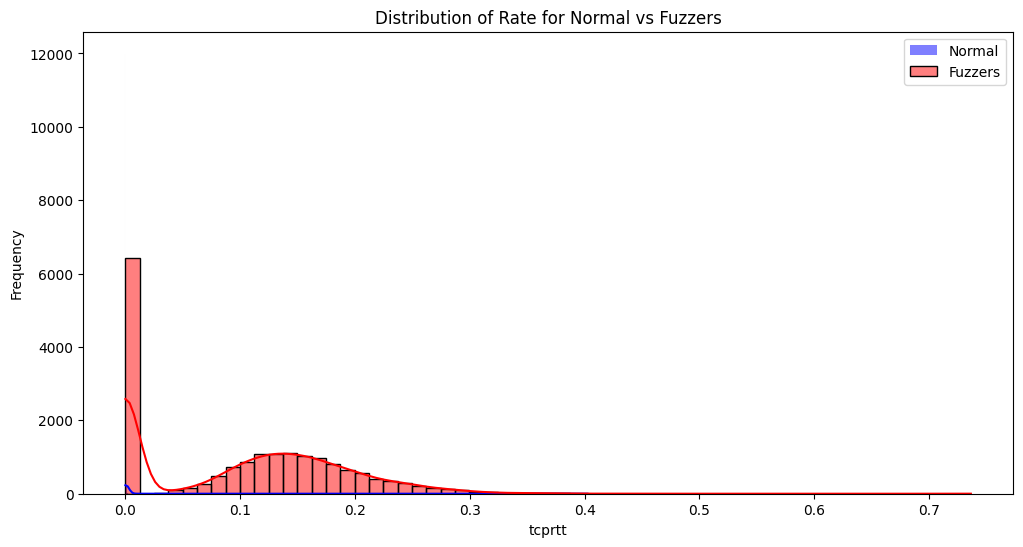

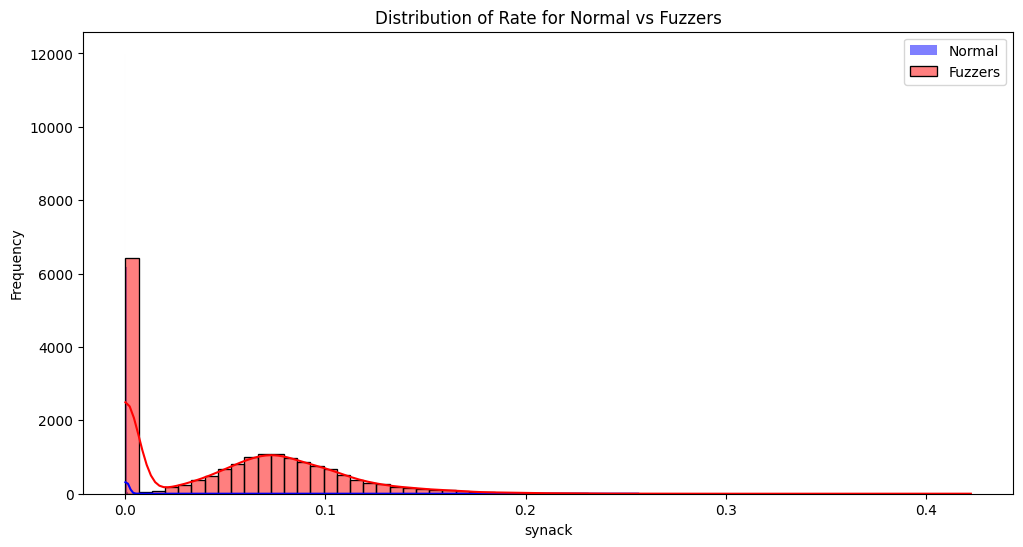

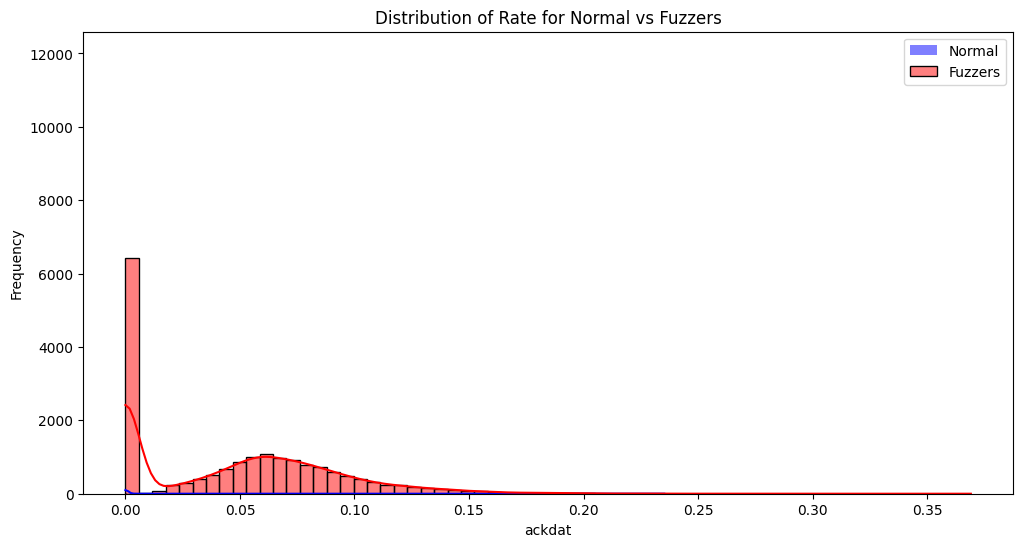

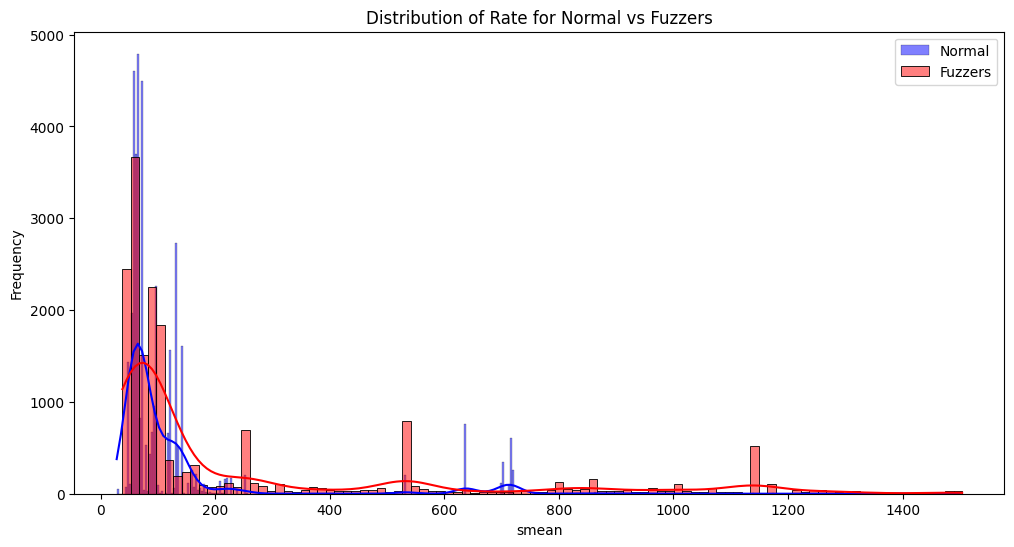

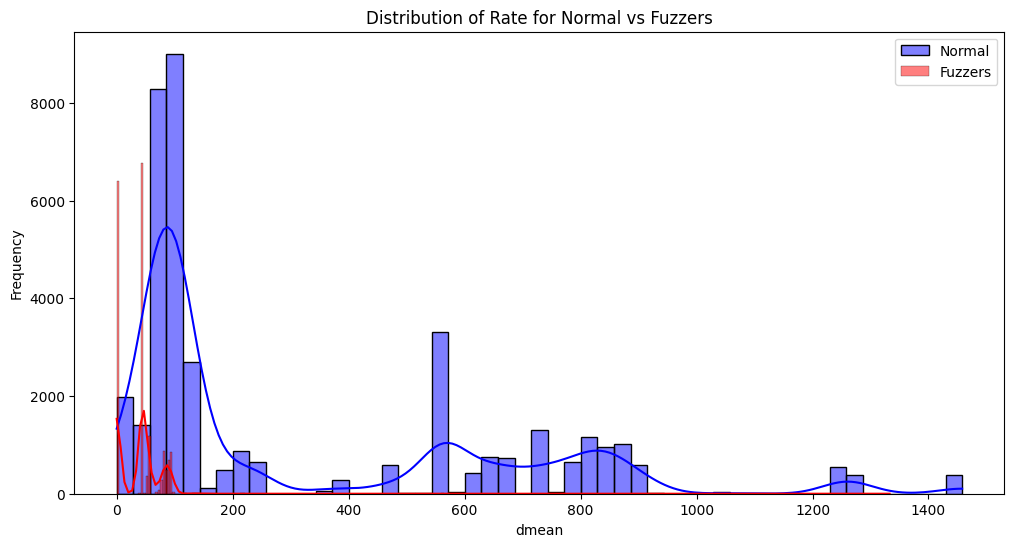

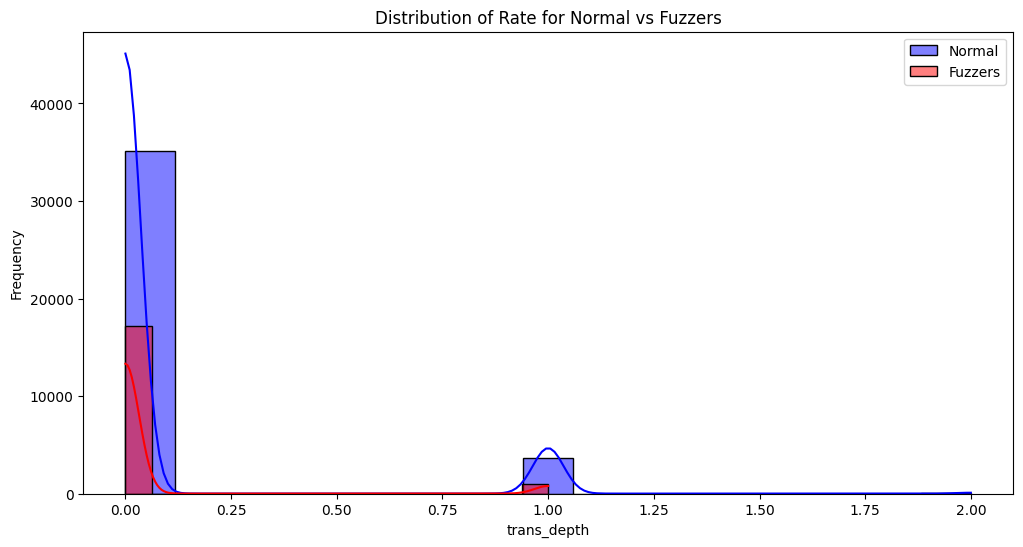

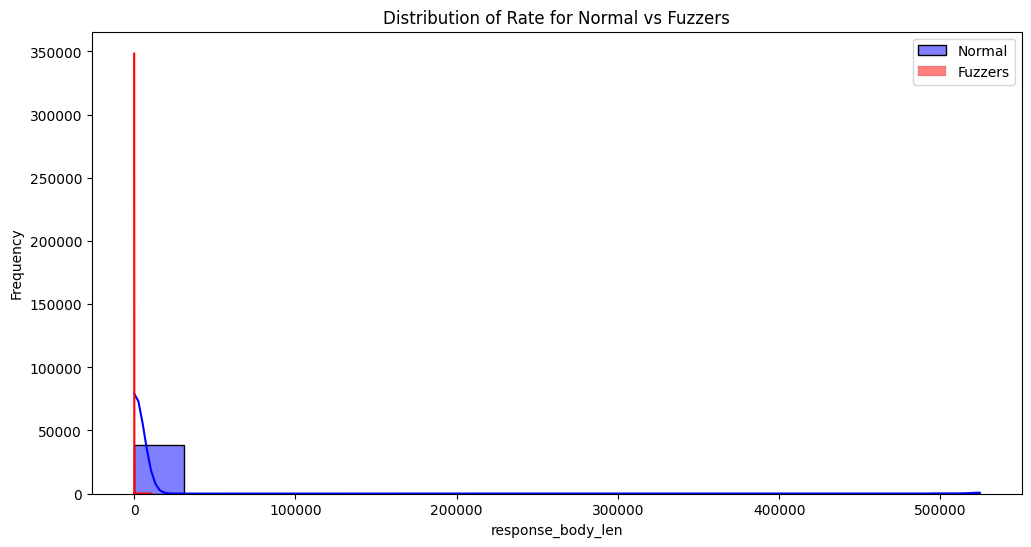

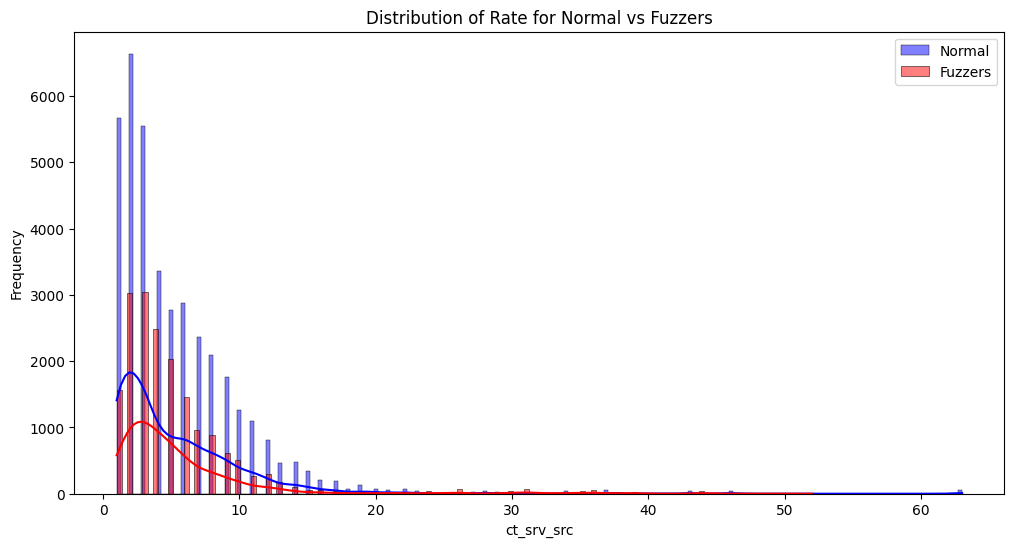

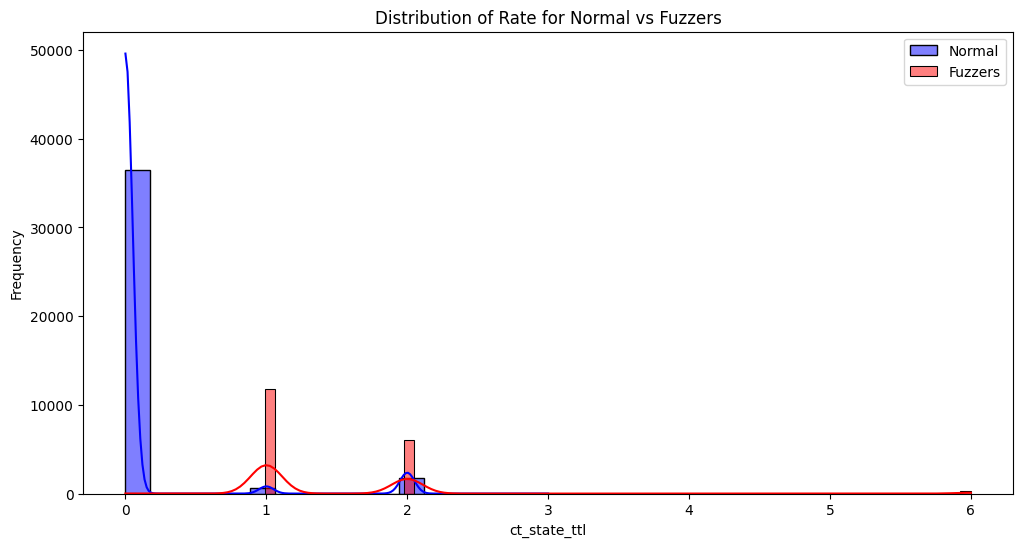

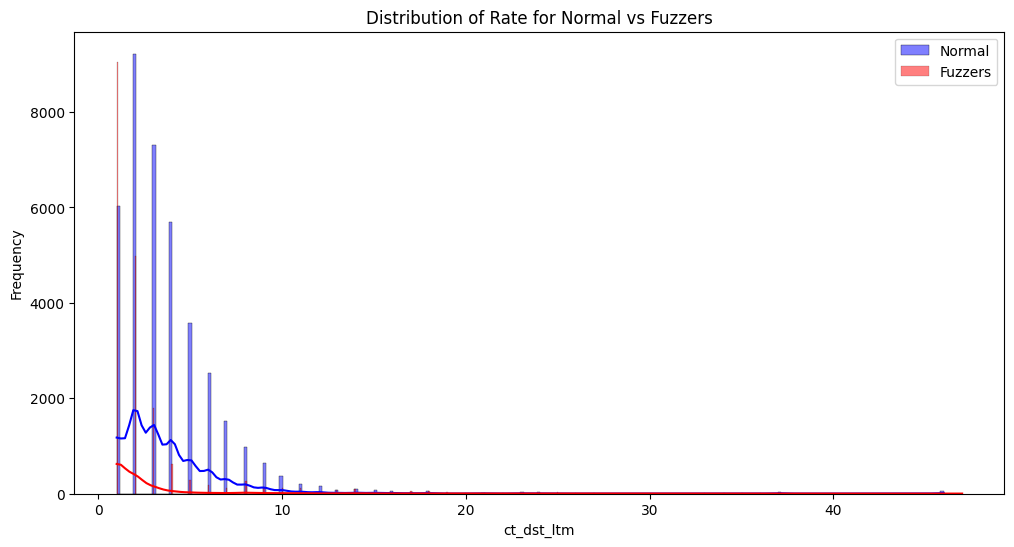

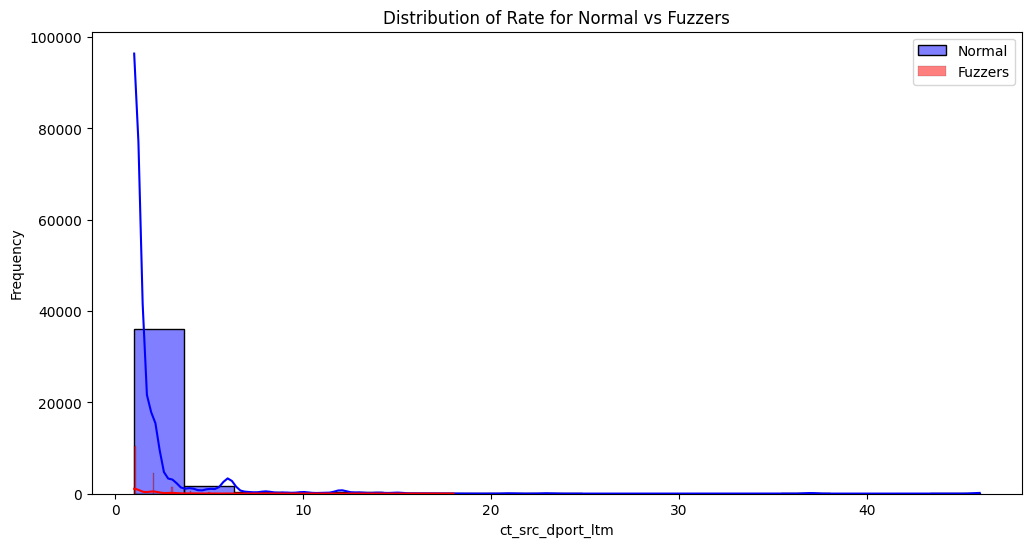

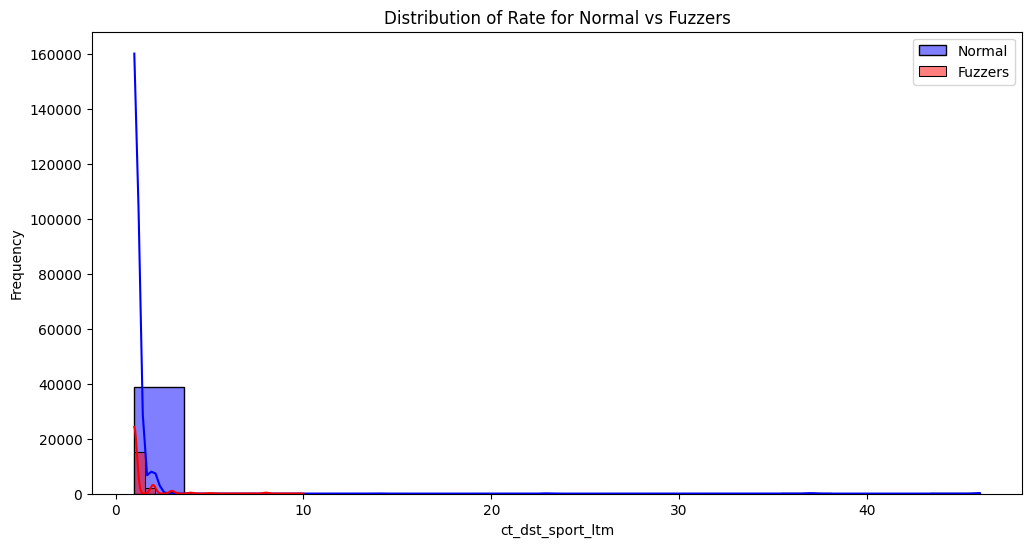

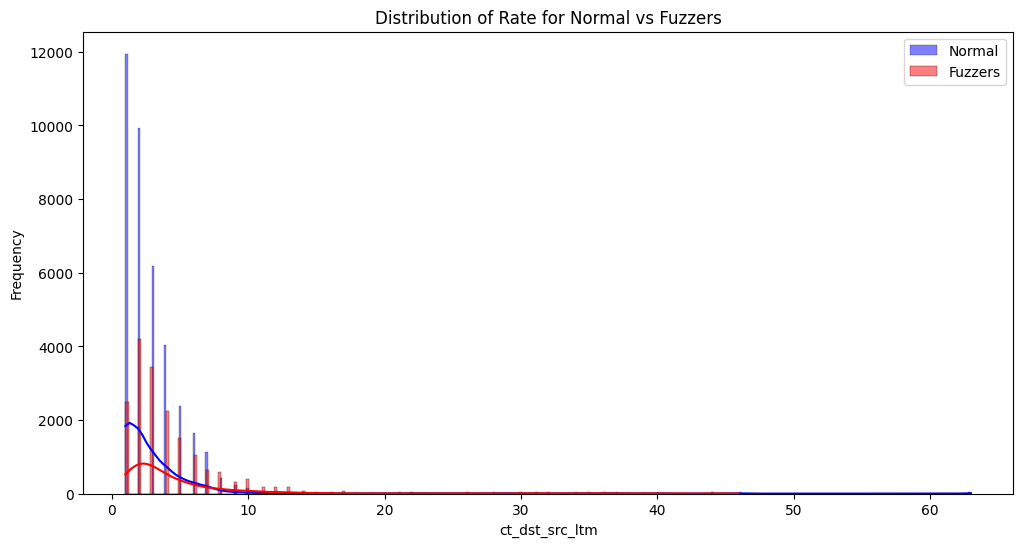

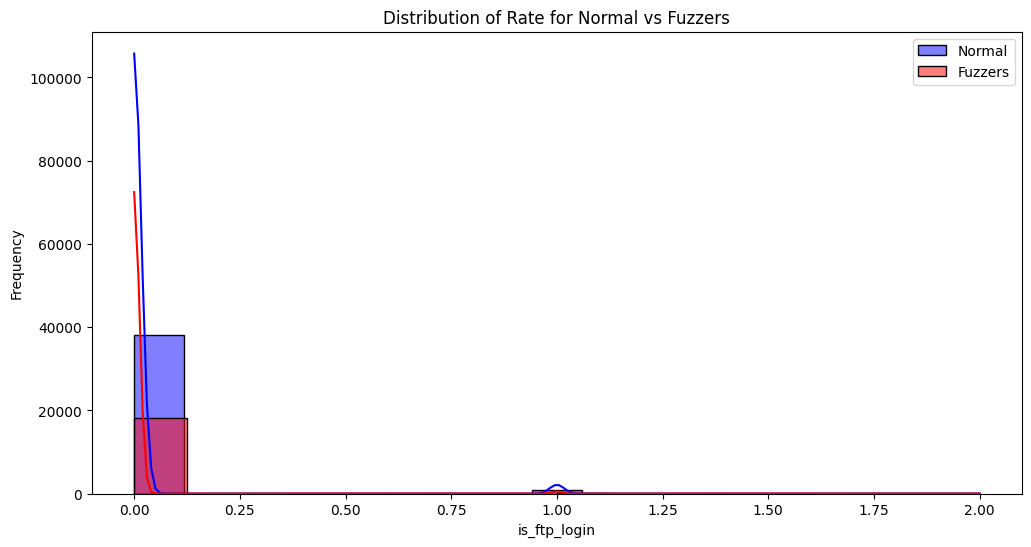

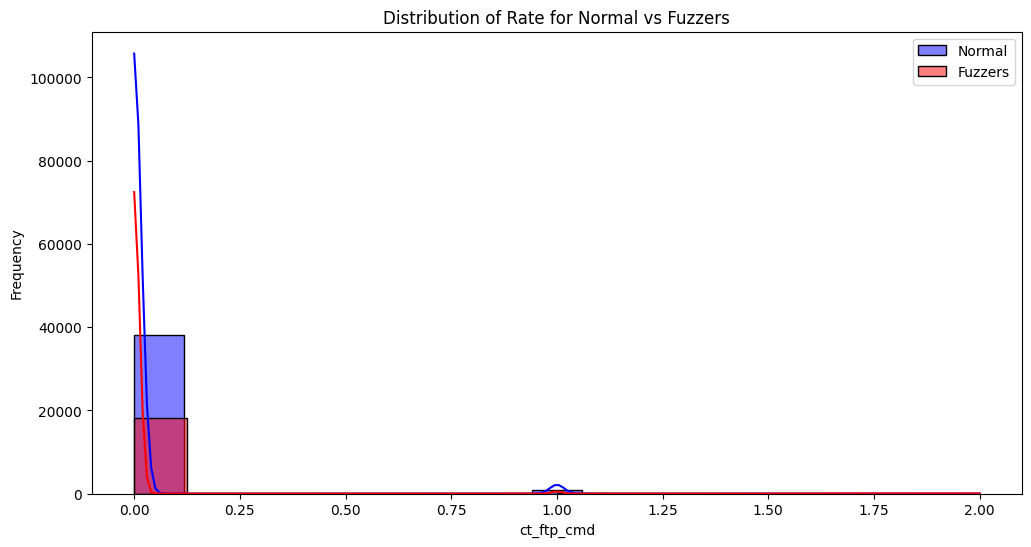

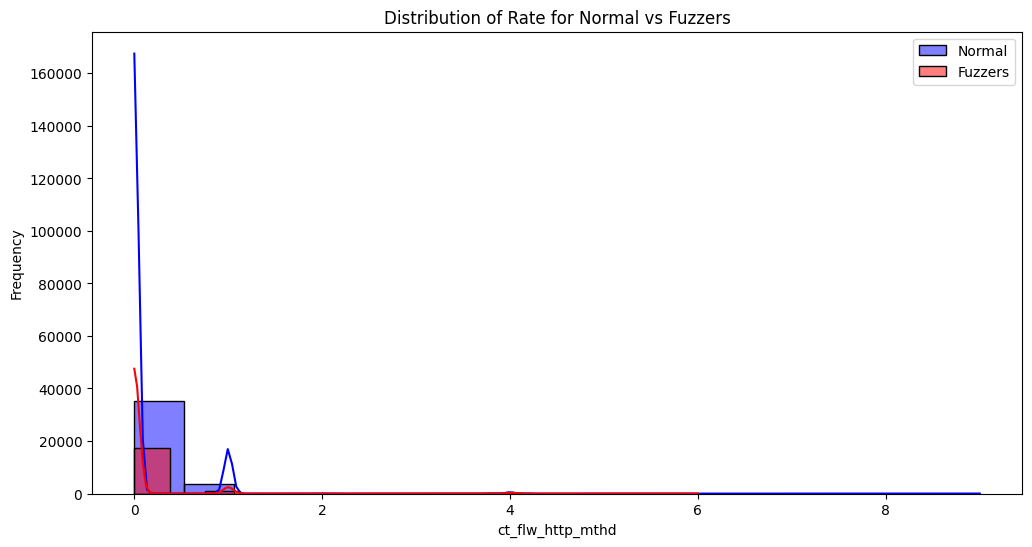

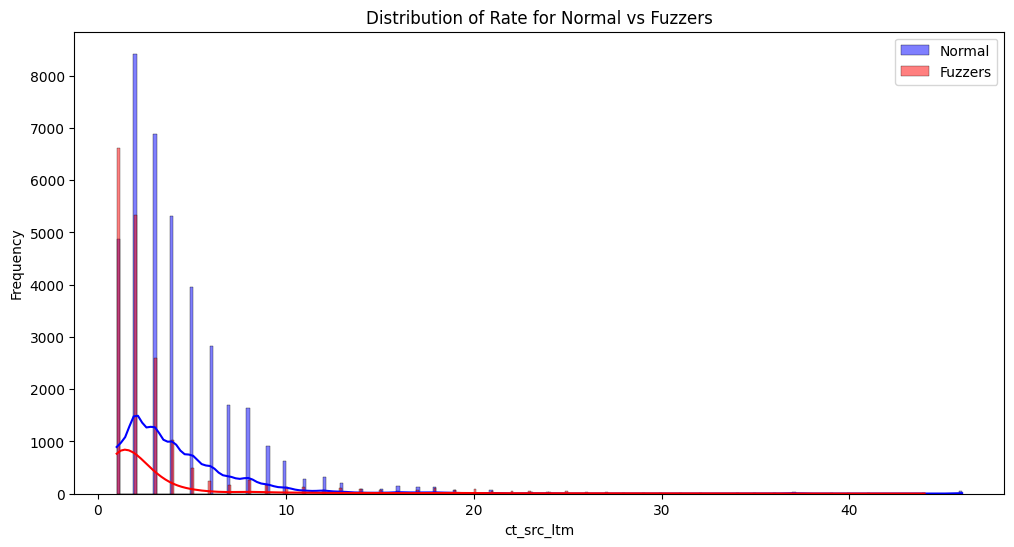

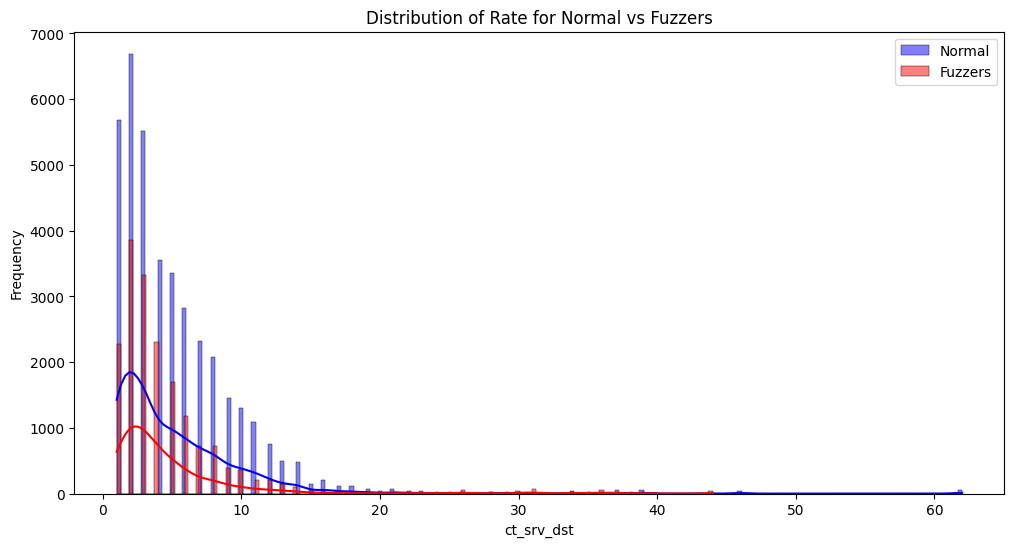

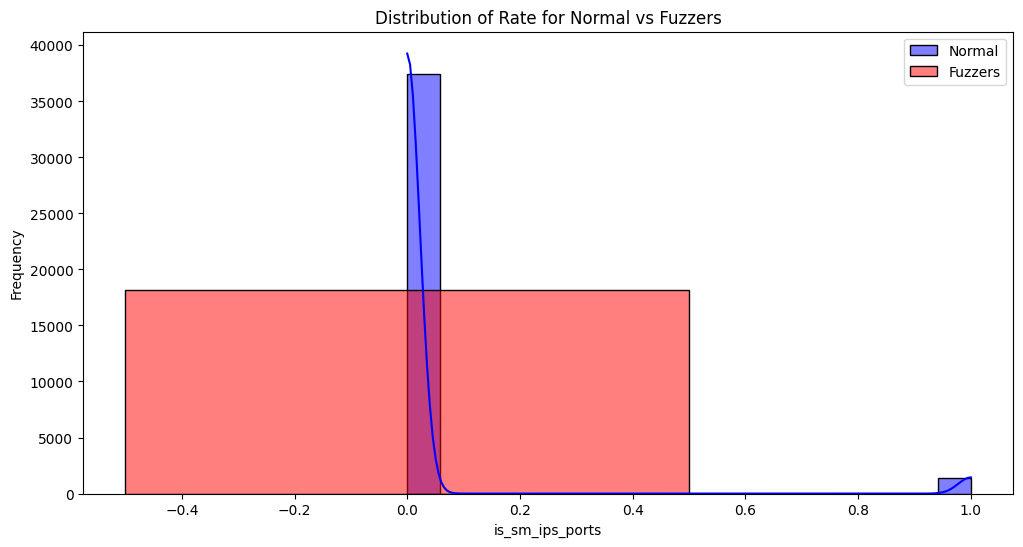

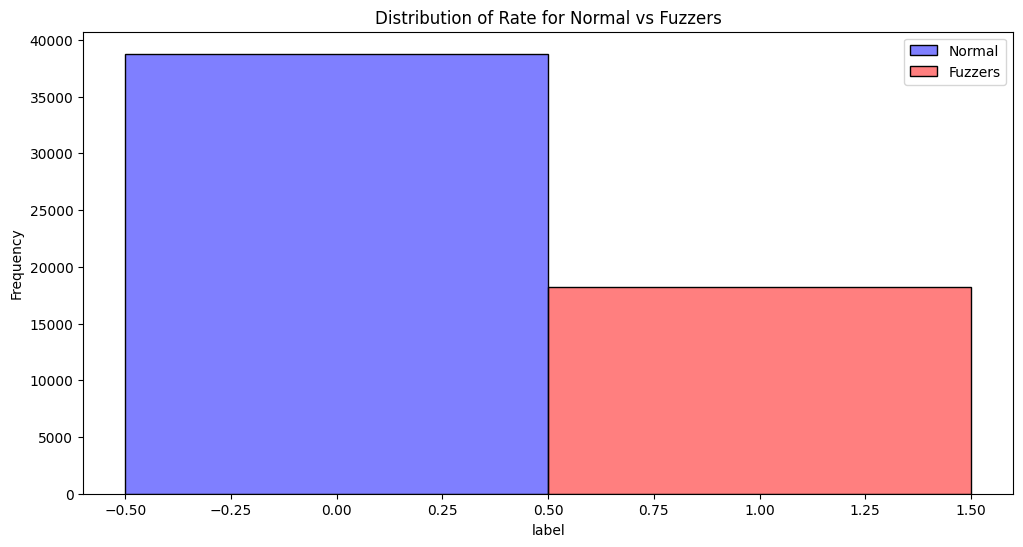

In [3]:
dfF = pd.read_excel('Assignment-2024-training-data-set.xlsx')
normal_df = dfF[dfF['attack_cat'] == 'Normal']
fuzzers_df = dfF[dfF['attack_cat'] == 'Fuzzers']

for i in dfF.select_dtypes(include="number").columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(normal_df[i], color='blue', label='Normal', kde=True)
    sns.histplot(fuzzers_df[i], color='red', label='Fuzzers', kde=True)
    plt.title(f'Distribution of {i} for Normal vs Fuzzers')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()